## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [39]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 26)

In [40]:
caly_df.head()

Województwo Data urodzenia  PI-PROD  PI-POKR  Prc  Psm  Pnr   Pw  \
0       WIELKOPOLSKIE           2020      137      127  121  113  106  128   
1  KUJAWSKO-POMORSKIE           2018      126      123  109  113  103  128   
2           POMORSKIE           2020      126      120  110  107  102  124   
3  KUJAWSKO-POMORSKIE           2020      133      111  104  110   99  114   
4  ZACHODNIOPOMORSKIE           2020      125      115   91   95  101  124   

   PI-PLOD  CRj  ...  kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr  \
0      109  107  ...   1370    577     2    452     1  115.0  114.0  109.0   
1      114  114  ...   1209    358   -16    354    -4  115.0  113.0  104.0   
2      113  112  ...    982    368    -4    350     4  104.0  103.0  102.0   
3      114  113  ...   1080    546    12    410     7  106.0  106.0  101.0   
4      134  129  ...    516    501    36    289    15  102.0  102.0  118.0   

       w     og  
0  127.0  123.0  
1  123.0  123.0  
2  122.0  117.0  
3  112.0  112.0  
4  123.0  109.0  

[5 rows x 26 columns]

In [41]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [42]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [43]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [44]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [45]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [46]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [47]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [48]:
caly_df.shape

(1875, 26)

## 4. Zakodowuje zmienne kategoryczne

In [49]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([  2.,   0.,   2.,   9.,  11.,  12.,  29.,  25.,  22.,  71., 121.,
         61., 166., 174., 106., 234., 190.,  98., 148., 122.,  53.,  78.,
         58.,  20.,  33.,  13.,   9.,   5.,   1.,   2.]),
 array([ 82.        ,  83.66666667,  85.33333333,  87.        ,
         88.66666667,  90.33333333,  92.        ,  93.66666667,
         95.33333333,  97.        ,  98.66666667, 100.33333333,
        102.        , 103.66666667, 105.33333333, 107.        ,
        108.66666667, 110.33333333, 112.        , 113.66666667,
        115.33333333, 117.        , 118.66666667, 120.33333333,
        122.        , 123.66666667, 125.33333333, 127.        ,
        128.66666667, 130.33333333, 132.        ]),
 <BarContainer object of 30 artists>)

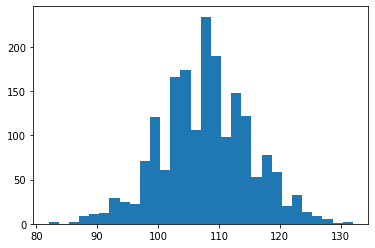

In [50]:
plt.hist(caly_df["OMC"],bins=30)

In [51]:
caly_df["OMC"].describe()

count    1875.000000
mean      107.665067
std         7.413236
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

In [52]:
caly_df.loc[(caly_df["OMC"]<=103), "Klasa"] = "Małe"
caly_df.loc[(103<caly_df["OMC"]) & (caly_df["OMC"]<=107), "Klasa"] = "Średnie"
caly_df.loc[(107<caly_df["OMC"]) & (caly_df["OMC"]<=112), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["OMC"]>112, "Klasa"] = "Ekstrimum"

(array([415.,   0.,   0., 531.,   0.,   0., 465.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

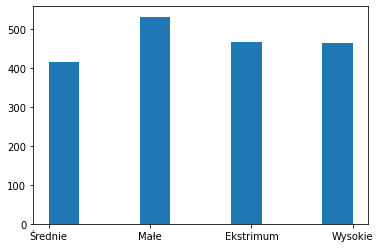

In [53]:
plt.hist(caly_df["Klasa"])

In [54]:
caly_df["Klasa"].value_counts()

Małe         531
Ekstrimum    465
Wysokie      464
Średnie      415
Name: Klasa, dtype: int64

In [55]:
list(caly_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [56]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['OMC']
test_label=test_df['OMC']
#val_label=val_df['IE']

del train_df['OMC']
del test_df['OMC']
#del val_df['IE']


In [57]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [58]:
len(list(train_df))

46

## 1.2 Standaryzacja

In [59]:
train_df.iloc[:,:23]

PI-PROD  PI-POKR  Prc  Psm  Pnr   Pw  PI-PLOD  CRj  CRk   PP  ...  \
1119      133      115  105  107  111  113      104  105  103   96  ...   
1093      125      117  115  104   98  123      120  118  120   99  ...   
613       123      119  101  108  103  124      116  114  116  102  ...   
3         131      113   98  100  103  117      115  113  116  102  ...   
816       121      112  105   94  103  116      120  117  122   99  ...   
...       ...      ...  ...  ...  ...  ...      ...  ...  ...  ...  ...   
110       129      113   90  100  100  121      120  116  121  105  ...   
608       126      118  108  108  110  116      113  107  113  117  ...   
273       125      111   96  108  107  111      109  108  107  104  ...   
1478      128      109  108  111  104  106      115  114  119   93  ...   
1250      126      109   88   98  102  114      111  111  111   99  ...   

      kg ml  kg tł  % tł  kg bi  % bi     rc     sm     nr      w     og  
1119   1325    474    -8    429     0  107.0  109.0  117.0  111.0  114.0  
1093    478    523    41    288    16  106.0  101.0  106.0  120.0  111.0  
613    1091    418    -3    287    -8  107.0  107.0  112.0  125.0  118.0  
3       902    516    17    378    10  105.0  103.0  110.0  118.0  109.0  
816    1040    379    -5    270    -8   90.0   93.0  100.0  117.0  107.0  
...     ...    ...   ...    ...   ...    ...    ...    ...    ...    ...  
110     843    602    30    316     5  101.0  100.0  114.0  121.0  111.0  
608     783    374     6    348    11  108.0  107.0  117.0  115.0  113.0  
273     983    398     0    321     0  107.0  106.0  116.0  115.0  111.0  
1478    888    491    15    339     6  108.0  108.0  105.0  108.0  111.0  
1250   1369    314   -28    380    -7   99.0   98.0  113.0  115.0  105.0  

[1500 rows x 23 columns]

In [60]:
scaler = StandardScaler()
train_df.iloc[:,:23]=scaler.fit_transform(train_df.iloc[:,:23])
test_df.iloc[:,:23]=scaler.fit_transform(test_df.iloc[:,:23])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [61]:
train_df.iloc[:,20:23]

nr         w        og
1119  0.680709 -1.138843 -0.140075
1093 -0.819652  0.104636 -0.584915
613  -0.001273  0.795458  0.453044
3    -0.274066 -0.171692 -0.881474
816  -1.638030 -0.309857 -1.178034
...        ...       ...       ...
110   0.271520  0.242801 -0.584915
608   0.680709 -0.586185 -0.288355
273   0.544313 -0.586185 -0.584915
1478 -0.956048 -1.553336 -0.584915
1250  0.135123 -0.586185 -1.474594

[1500 rows x 3 columns]

In [62]:
train_df.shape

(1500, 46)

In [63]:
test_df.shape

(375, 46)

In [64]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [65]:
train_df

array([[ 0.93447873, -0.3516274 , -0.26760885, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31999546, -0.07017537,  0.99231982, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63361401,  0.21127666, -0.77158032, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31999546, -0.91453145, -1.40154465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15043236, -1.19598348,  0.11036975, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16318618, -1.19598348, -2.40948759, ...,  0.        ,
         1.        ,  0.        ]])

In [66]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [67]:
train_label

array([ 97, 104, 103, ..., 104, 101, 102], dtype=int64)

In [68]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [69]:
p = {'first_neuron':[160], #
     'hidden_neuron':[25],#
     'hidden_layers':[1],  #1 must
     'batch_size': [64], # 64
     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],# do zrobienia potem
     'kernel_initializer': ['ones'], # ones 
     'epochs': [20000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['selu'], # selu
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     
#     
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [70]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=5,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [71]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja OMC')


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'rmsprop'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 308us/sample - loss: 18297.8273 - val_loss: 16256.0968
Epoch 2/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16876.7232 - val_loss: 15051.1126
Epoch 3/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 15653.9096 - val_loss: 13946.7952
Epoch 4/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 14500.5217 - val_loss: 12896.3279
Epoch 5/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 13414.1091 - val_loss: 11901.0558
Epoch 6/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 12380.8238 - val_loss: 

Epoch 71/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 24.1428 - val_loss: 21.2706
Epoch 72/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 21.5874 - val_loss: 19.1708
Epoch 73/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 19.5321 - val_loss: 17.3955
Epoch 74/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 17.6919 - val_loss: 15.7645
Epoch 75/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 16.2719 - val_loss: 14.3734
Epoch 76/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 14.8224 - val_loss: 13.1387
Epoch 77/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 13.5543 - val_loss: 11.9203
Epoch 78/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12.3632 - val_loss: 10.8527
Epoch 79/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11.2165 - val_loss: 9.9716
Ep

1500/1500 [==============================] - 0s 23us/sample - loss: 1.6476 - val_loss: 2.1181
Epoch 220/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.6316 - val_loss: 1.8755
Epoch 221/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.6944 - val_loss: 2.1069
Epoch 222/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.6920 - val_loss: 2.5474
Epoch 223/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.6432 - val_loss: 2.3787
Epoch 224/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.6326 - val_loss: 2.2477
Epoch 225/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.6028 - val_loss: 2.0320
Epoch 226/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.7034 - val_loss: 2.4029
Epoch 227/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.6065 - val_loss: 2.0143
Epoch 228/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.5607 - val_loss: 1.9538
Epoch 368/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.5585 - val_loss: 1.5784
Epoch 369/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4648 - val_loss: 2.3980
Epoch 370/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.5516 - val_loss: 1.6352
Epoch 371/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5011 - val_loss: 1.7645
Epoch 372/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5942 - val_loss: 1.5603
Epoch 373/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.5182 - val_loss: 1.8386
Epoch 374/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.5198 - val_loss: 2.1346
Epoch 375/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4697 - val_loss: 1.6508
Epoch 376/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.3933 - val_loss: 1.4795
Epoch 516/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4582 - val_loss: 2.4390
Epoch 517/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4411 - val_loss: 1.3358
Epoch 518/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4733 - val_loss: 1.9972
Epoch 519/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.5560 - val_loss: 1.5647
Epoch 520/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4945 - val_loss: 1.5131
Epoch 521/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4902 - val_loss: 1.6204
Epoch 522/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4320 - val_loss: 1.7520
Epoch 523/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4539 - val_loss: 1.7531
Epoch 524/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.4185 - val_loss: 1.8984
Epoch 664/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4611 - val_loss: 1.5069
Epoch 665/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4306 - val_loss: 1.2771
Epoch 666/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3475 - val_loss: 2.0706
Epoch 667/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.5054 - val_loss: 1.4971
Epoch 668/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4632 - val_loss: 1.4739
Epoch 669/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4660 - val_loss: 1.4002
Epoch 670/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4537 - val_loss: 1.9578
Epoch 671/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4908 - val_loss: 1.3120
Epoch 672/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 1.4202 - val_loss: 1.3753
Epoch 812/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4428 - val_loss: 2.0327
Epoch 813/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4666 - val_loss: 1.2376
Epoch 814/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3615 - val_loss: 1.5990
Epoch 815/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4652 - val_loss: 1.3898
Epoch 816/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3890 - val_loss: 2.1901
Epoch 817/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4678 - val_loss: 1.5944
Epoch 818/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4145 - val_loss: 1.1369
Epoch 819/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4125 - val_loss: 1.4148
Epoch 820/20000
1500/1500 

1500/1500 [==============================] - 0s 29us/sample - loss: 1.3544 - val_loss: 1.7010
Epoch 960/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4567 - val_loss: 1.6854
Epoch 961/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.4661 - val_loss: 1.3449
Epoch 962/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4156 - val_loss: 1.6482
Epoch 963/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3929 - val_loss: 2.2043
Epoch 964/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4520 - val_loss: 1.5711
Epoch 965/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3320 - val_loss: 1.2993
Epoch 966/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4317 - val_loss: 1.6743
Epoch 967/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3693 - val_loss: 2.2992
Epoch 968/20000
1500/1500 

Epoch 1107/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4292 - val_loss: 1.7374
Epoch 1108/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4109 - val_loss: 1.1797
Epoch 1109/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4502 - val_loss: 1.6477
Epoch 1110/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3860 - val_loss: 1.2620
Epoch 1111/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4793 - val_loss: 1.4476
Epoch 1112/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4142 - val_loss: 1.6369
Epoch 1113/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4314 - val_loss: 1.3953
Epoch 1114/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3601 - val_loss: 1.4047
Epoch 1115/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4653 - val_loss: 1.5145
E

Epoch 1181/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3965 - val_loss: 1.5108
Epoch 1182/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4149 - val_loss: 1.3062
Epoch 1183/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4028 - val_loss: 2.0554
Epoch 1184/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4172 - val_loss: 1.6074
Epoch 1185/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4374 - val_loss: 1.3868
Epoch 1186/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4373 - val_loss: 1.5771
Epoch 1187/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4217 - val_loss: 1.1806
Epoch 1188/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3733 - val_loss: 1.4627
Epoch 1189/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4270 - val_loss: 1.1729
E

Epoch 1255/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4829 - val_loss: 1.3349
Epoch 1256/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3687 - val_loss: 1.5395
Epoch 1257/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4462 - val_loss: 1.4971
Epoch 1258/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3811 - val_loss: 1.2697
Epoch 1259/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4052 - val_loss: 1.3504
Epoch 1260/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3795 - val_loss: 1.9302
Epoch 1261/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4334 - val_loss: 1.7094
Epoch 1262/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4206 - val_loss: 1.7034
Epoch 1263/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3846 - val_loss: 1.5765
E

Epoch 1329/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4673 - val_loss: 1.3232
Epoch 1330/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3502 - val_loss: 1.2892
Epoch 1331/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4040 - val_loss: 2.8042
Epoch 1332/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4563 - val_loss: 1.4633
Epoch 1333/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3743 - val_loss: 1.3513
Epoch 1334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4224 - val_loss: 1.3073
Epoch 1335/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4573 - val_loss: 2.0725
Epoch 1336/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4303 - val_loss: 1.9609
Epoch 1337/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4055 - val_loss: 1.7122
E

Epoch 1403/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4796 - val_loss: 1.3289
Epoch 1404/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3949 - val_loss: 1.6229
Epoch 1405/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3949 - val_loss: 1.4854
Epoch 1406/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4348 - val_loss: 1.2071
Epoch 1407/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4060 - val_loss: 1.6665
Epoch 1408/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4066 - val_loss: 1.4872
Epoch 1409/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3974 - val_loss: 1.2887
Epoch 1410/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3675 - val_loss: 1.4837
Epoch 1411/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4790 - val_loss: 1.7650
E

Epoch 1477/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3652 - val_loss: 1.9381
Epoch 1478/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4499 - val_loss: 1.5689
Epoch 1479/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4670 - val_loss: 1.4978
Epoch 1480/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4158 - val_loss: 1.7998
Epoch 1481/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4156 - val_loss: 2.0876
Epoch 1482/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4307 - val_loss: 2.2792
Epoch 1483/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4153 - val_loss: 1.4966
Epoch 1484/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4334 - val_loss: 1.3905
Epoch 1485/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4320 - val_loss: 1.5739
E

Epoch 1551/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4096 - val_loss: 1.2177
Epoch 1552/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4111 - val_loss: 1.8713
Epoch 1553/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4244 - val_loss: 1.4278
Epoch 1554/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4047 - val_loss: 1.3790
Epoch 1555/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4530 - val_loss: 1.2694
Epoch 1556/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3977 - val_loss: 1.6309
Epoch 1557/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4561 - val_loss: 1.4461
Epoch 1558/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3595 - val_loss: 1.8253
Epoch 1559/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4410 - val_loss: 1.2657
E

Epoch 1625/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3990 - val_loss: 1.5560
Epoch 1626/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4210 - val_loss: 1.1856
Epoch 1627/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3938 - val_loss: 1.2702
Epoch 1628/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4250 - val_loss: 1.4344
Epoch 1629/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4143 - val_loss: 1.2425
Epoch 1630/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3969 - val_loss: 1.5888
Epoch 1631/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3919 - val_loss: 1.6146
Epoch 1632/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4042 - val_loss: 1.1458
Epoch 1633/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4554 - val_loss: 1.2280
E

Epoch 1699/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3986 - val_loss: 1.8670
Epoch 1700/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3849 - val_loss: 1.1955
Epoch 1701/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.3973 - val_loss: 1.8612
Epoch 1702/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4042 - val_loss: 1.7628
Epoch 1703/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3390 - val_loss: 1.2666
Epoch 1704/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4417 - val_loss: 1.2981
Epoch 1705/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4477 - val_loss: 2.1253
Epoch 1706/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3536 - val_loss: 1.3591
Epoch 1707/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4669 - val_loss: 1.5694
E

Epoch 1773/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3655 - val_loss: 1.3514
Epoch 1774/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4310 - val_loss: 1.5154
Epoch 1775/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.4001 - val_loss: 2.3252
Epoch 1776/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4605 - val_loss: 1.7888
Epoch 1777/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4014 - val_loss: 1.5719
Epoch 1778/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4251 - val_loss: 1.8392
Epoch 1779/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.4435 - val_loss: 1.7096
Epoch 1780/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3933 - val_loss: 2.6110
Epoch 1781/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3999 - val_loss: 1.8531
E

Epoch 1847/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4449 - val_loss: 2.0060
Epoch 1848/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3730 - val_loss: 2.2111
Epoch 1849/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3899 - val_loss: 1.8188
Epoch 1850/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4802 - val_loss: 1.6784
Epoch 1851/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4199 - val_loss: 1.8018
Epoch 1852/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3882 - val_loss: 1.8241
Epoch 1853/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4380 - val_loss: 1.3408
Epoch 1854/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.4266 - val_loss: 1.3960
Epoch 1855/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3511 - val_loss: 1.8045
E

Epoch 1921/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3959 - val_loss: 2.0440
Epoch 1922/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.4446 - val_loss: 1.6700
Epoch 1923/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3736 - val_loss: 1.7992
Epoch 1924/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4109 - val_loss: 1.3583
Epoch 1925/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4702 - val_loss: 1.4064
Epoch 1926/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3975 - val_loss: 1.4476
Epoch 1927/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.3379 - val_loss: 1.2875
Epoch 1928/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.4017 - val_loss: 1.4363
Epoch 1929/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4392 - val_loss: 2.2019
E

Epoch 1995/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.3844 - val_loss: 1.3635
Epoch 1996/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4123 - val_loss: 1.3848
Epoch 1997/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3978 - val_loss: 1.9958
Epoch 1998/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4503 - val_loss: 1.5321
Epoch 1999/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3788 - val_loss: 1.3183
Epoch 2000/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3937 - val_loss: 1.4946
Epoch 2001/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4321 - val_loss: 1.1966
Epoch 2002/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4288 - val_loss: 1.7398
Epoch 2003/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4284 - val_loss: 1.3169
E

Epoch 2069/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4365 - val_loss: 1.2417
Epoch 2070/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4268 - val_loss: 1.4429
Epoch 2071/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3867 - val_loss: 1.6893
Epoch 2072/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4840 - val_loss: 1.4760
Epoch 2073/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3481 - val_loss: 1.4001
Epoch 2074/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3754 - val_loss: 1.4993
Epoch 2075/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.4044 - val_loss: 1.7781
Epoch 2076/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3718 - val_loss: 1.8364
Epoch 2077/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4617 - val_loss: 1.3014
E

Epoch 2143/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3676 - val_loss: 1.7127
Epoch 2144/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4037 - val_loss: 1.3493
Epoch 2145/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3973 - val_loss: 1.7243
Epoch 2146/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3751 - val_loss: 1.8201
Epoch 2147/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4613 - val_loss: 1.3729
Epoch 2148/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.4753 - val_loss: 1.5430
Epoch 2149/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3411 - val_loss: 2.2125
Epoch 2150/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3867 - val_loss: 1.4325
Epoch 2151/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4305 - val_loss: 1.6238
E

Epoch 2217/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3479 - val_loss: 1.5370
Epoch 2218/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4406 - val_loss: 1.4065
Epoch 2219/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3422 - val_loss: 1.2344
Epoch 2220/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4263 - val_loss: 1.2793
Epoch 2221/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3884 - val_loss: 1.1693
Epoch 2222/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4512 - val_loss: 1.4972
Epoch 2223/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.3670 - val_loss: 1.3019
Epoch 2224/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.4530 - val_loss: 1.9583
Epoch 2225/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3511 - val_loss: 1.7801
E

Epoch 2291/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3794 - val_loss: 1.2195
Epoch 2292/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4343 - val_loss: 1.3644
Epoch 2293/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3568 - val_loss: 1.4008
Epoch 2294/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.4253 - val_loss: 1.3812
Epoch 2295/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.4301 - val_loss: 1.6385
Epoch 2296/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4009 - val_loss: 1.8643
Epoch 2297/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4653 - val_loss: 2.0922
Epoch 2298/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3513 - val_loss: 1.2148
Epoch 2299/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4097 - val_loss: 1.6198
E

Epoch 2365/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3433 - val_loss: 1.5156
Epoch 2366/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4738 - val_loss: 1.2915
Epoch 2367/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.3819 - val_loss: 1.2162
Epoch 2368/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4167 - val_loss: 1.5991
Epoch 2369/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3966 - val_loss: 1.3840
Epoch 2370/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3742 - val_loss: 1.3846
Epoch 2371/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4112 - val_loss: 2.2082
Epoch 2372/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4074 - val_loss: 1.2612
Epoch 2373/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3730 - val_loss: 1.2112
E

Epoch 2439/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4326 - val_loss: 1.3688
Epoch 2440/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4496 - val_loss: 1.4931
Epoch 2441/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4217 - val_loss: 1.6110
Epoch 2442/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4319 - val_loss: 1.8830
Epoch 2443/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3778 - val_loss: 1.5167
Epoch 2444/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3875 - val_loss: 1.1707
Epoch 2445/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4057 - val_loss: 1.7768
Epoch 2446/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3596 - val_loss: 1.2615
Epoch 2447/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4336 - val_loss: 1.4153
E

Epoch 2513/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3453 - val_loss: 2.6658
Epoch 2514/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4125 - val_loss: 1.2514
Epoch 2515/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3621 - val_loss: 1.7769
Epoch 2516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4417 - val_loss: 1.5672
Epoch 2517/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.5015 - val_loss: 2.1563
Epoch 2518/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3872 - val_loss: 1.2389
Epoch 2519/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4016 - val_loss: 1.9483
Epoch 2520/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3943 - val_loss: 1.9793
Epoch 2521/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4391 - val_loss: 2.0386
E

Epoch 2587/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3829 - val_loss: 1.7025
Epoch 2588/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3633 - val_loss: 1.2817
Epoch 2589/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3683 - val_loss: 1.2423
Epoch 2590/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4190 - val_loss: 1.8036
Epoch 2591/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4049 - val_loss: 1.6114
Epoch 2592/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3819 - val_loss: 2.0362
Epoch 2593/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4079 - val_loss: 2.0747
Epoch 2594/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4043 - val_loss: 1.2552
Epoch 2595/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4087 - val_loss: 1.2839
E

Epoch 2661/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3481 - val_loss: 1.5587
Epoch 2662/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4109 - val_loss: 1.1802
Epoch 2663/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3854 - val_loss: 1.5528
Epoch 2664/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4007 - val_loss: 1.2492
Epoch 2665/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4152 - val_loss: 1.6004
Epoch 2666/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4493 - val_loss: 1.7585
Epoch 2667/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4156 - val_loss: 1.6355
Epoch 2668/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3815 - val_loss: 2.1140
Epoch 2669/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4077 - val_loss: 1.4435
E

Epoch 2735/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.3407 - val_loss: 1.2641
Epoch 2736/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.4468 - val_loss: 1.6248
Epoch 2737/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4717 - val_loss: 1.2064
Epoch 2738/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3451 - val_loss: 1.3390
Epoch 2739/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.4406 - val_loss: 1.7211
Epoch 2740/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.3559 - val_loss: 1.6479
Epoch 2741/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3634 - val_loss: 1.4142
Epoch 2742/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.4363 - val_loss: 1.7246
Epoch 2743/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3751 - val_loss: 1.3195
E

Epoch 2809/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3873 - val_loss: 1.4873
Epoch 2810/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.3377 - val_loss: 1.7185
Epoch 2811/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.4449 - val_loss: 1.9180
Epoch 2812/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3662 - val_loss: 2.5374
Epoch 2813/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4281 - val_loss: 1.1550
Epoch 2814/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4037 - val_loss: 1.3766
Epoch 2815/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4047 - val_loss: 1.6370
Epoch 2816/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3705 - val_loss: 1.6466
Epoch 2817/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4376 - val_loss: 1.2729
E

Epoch 2883/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4656 - val_loss: 1.5981
Epoch 2884/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3904 - val_loss: 1.2548
Epoch 2885/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3853 - val_loss: 1.3890
Epoch 2886/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4436 - val_loss: 1.8744
Epoch 2887/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3753 - val_loss: 1.8495
Epoch 2888/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3754 - val_loss: 1.4962
Epoch 2889/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3512 - val_loss: 1.2098
Epoch 2890/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4565 - val_loss: 1.3460
Epoch 2891/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3360 - val_loss: 1.9651
E

Epoch 2957/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4640 - val_loss: 1.3307
Epoch 2958/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4234 - val_loss: 1.7841
Epoch 2959/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3550 - val_loss: 1.3998
Epoch 2960/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4161 - val_loss: 1.4398
Epoch 2961/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3677 - val_loss: 1.3571
Epoch 2962/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4395 - val_loss: 1.2781
Epoch 2963/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.4476 - val_loss: 1.6640
Epoch 2964/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.3821 - val_loss: 1.2220
Epoch 2965/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.3574 - val_loss: 1.6311
E

Epoch 3031/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.4219 - val_loss: 1.8898
Epoch 3032/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4007 - val_loss: 1.1370
Epoch 3033/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3163 - val_loss: 2.8298
Epoch 3034/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5007 - val_loss: 2.2971
Epoch 3035/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3526 - val_loss: 1.3059
Epoch 3036/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4288 - val_loss: 1.4030
Epoch 3037/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3972 - val_loss: 1.3303
Epoch 3038/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4327 - val_loss: 1.3382
Epoch 3039/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3633 - val_loss: 1.4279
E

Epoch 3105/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3919 - val_loss: 1.8714
Epoch 3106/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4155 - val_loss: 1.2734
Epoch 3107/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3959 - val_loss: 1.7546
Epoch 3108/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3871 - val_loss: 1.4029
Epoch 3109/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3955 - val_loss: 1.5033
Epoch 3110/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3295 - val_loss: 1.4543
Epoch 3111/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.3908 - val_loss: 1.2354
Epoch 3112/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.4313 - val_loss: 2.4748
Epoch 3113/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4437 - val_loss: 1.5119
E

Epoch 3179/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3255 - val_loss: 1.8543
Epoch 3180/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4667 - val_loss: 1.2850
Epoch 3181/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4314 - val_loss: 1.5981
Epoch 3182/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3700 - val_loss: 1.5256
Epoch 3183/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4093 - val_loss: 1.3114
Epoch 3184/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4080 - val_loss: 1.2493
Epoch 3185/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3996 - val_loss: 1.3575
Epoch 3186/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4503 - val_loss: 1.2885
Epoch 3187/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3475 - val_loss: 1.3641
E


 17%|█████████████▊                                                                     | 1/6 [02:04<10:21, 124.38s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 306us/sample - loss: 18641.3638 - val_loss: 16668.1341
Epoch 2/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 17318.3939 - val_loss: 15491.9828
Epoch 3/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 16100.8065 - val_loss: 14369.2797
Epoch 4/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 14953.4693 - val_loss: 13348.6825
Epoch 5/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 13905.2777 - val_loss: 12389.0453
Epoch 6/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12923.1006 - val_loss: 115

Epoch 70/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 217.8770 - val_loss: 188.8931
Epoch 71/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 208.0583 - val_loss: 180.6529
Epoch 72/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 198.6762 - val_loss: 173.0827
Epoch 73/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 190.0274 - val_loss: 166.0372
Epoch 74/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 181.8168 - val_loss: 159.7464
Epoch 75/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 174.3916 - val_loss: 153.6249
Epoch 76/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 167.2471 - val_loss: 147.7488
Epoch 77/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 160.5504 - val_loss: 142.3156
Epoch 78/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 154.2762 - va

1500/1500 [==============================] - 0s 27us/sample - loss: 80.6088 - val_loss: 84.1514
Epoch 144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.5274 - val_loss: 84.0711
Epoch 145/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.4387 - val_loss: 84.0071
Epoch 146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.3522 - val_loss: 83.9342
Epoch 147/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.2697 - val_loss: 83.8562
Epoch 148/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.1854 - val_loss: 83.7882
Epoch 149/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.0980 - val_loss: 83.6953
Epoch 150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.0164 - val_loss: 83.6278
Epoch 151/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 79.9300 - val_loss: 83.5341
Epoch 15

1500/1500 [==============================] - 0s 25us/sample - loss: 8.9571 - val_loss: 8.1435
Epoch 290/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 7.6152 - val_loss: 6.9241
Epoch 291/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 6.4144 - val_loss: 5.9769
Epoch 292/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5.3363 - val_loss: 5.0300
Epoch 293/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 4.4162 - val_loss: 4.3015
Epoch 294/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 3.6061 - val_loss: 3.7919
Epoch 295/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 2.9442 - val_loss: 3.4076
Epoch 296/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 2.4699 - val_loss: 3.0804
Epoch 297/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 2.1984 - val_loss: 3.0821
Epoch 298/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 1.3819 - val_loss: 1.8345
Epoch 438/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3875 - val_loss: 1.8618
Epoch 439/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3785 - val_loss: 2.1363
Epoch 440/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.5017 - val_loss: 1.8918
Epoch 441/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.4356 - val_loss: 1.9020
Epoch 442/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3569 - val_loss: 2.1716
Epoch 443/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.4291 - val_loss: 1.8212
Epoch 444/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3749 - val_loss: 1.9615
Epoch 445/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3696 - val_loss: 1.8442
Epoch 446/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.2428 - val_loss: 1.4639
Epoch 586/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2259 - val_loss: 1.3700
Epoch 587/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2291 - val_loss: 1.4175
Epoch 588/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.2778 - val_loss: 1.4502
Epoch 589/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1998 - val_loss: 1.5107
Epoch 590/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1930 - val_loss: 1.4349
Epoch 591/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2112 - val_loss: 1.3683
Epoch 592/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2008 - val_loss: 1.5061
Epoch 593/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2055 - val_loss: 1.4561
Epoch 594/20000
1500/1500 

1500/1500 [==============================] - 0s 26us/sample - loss: 1.2420 - val_loss: 1.3273
Epoch 734/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2094 - val_loss: 1.2613
Epoch 735/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2553 - val_loss: 1.6428
Epoch 736/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2589 - val_loss: 1.3292
Epoch 737/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2567 - val_loss: 1.3372
Epoch 738/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1997 - val_loss: 1.2683
Epoch 739/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.2322 - val_loss: 1.4268
Epoch 740/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1720 - val_loss: 1.2518
Epoch 741/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2027 - val_loss: 1.4663
Epoch 742/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.1472 - val_loss: 1.3039
Epoch 882/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1327 - val_loss: 1.2902
Epoch 883/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1529 - val_loss: 1.1972
Epoch 884/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1647 - val_loss: 1.5218
Epoch 885/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1672 - val_loss: 1.3866
Epoch 886/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1558 - val_loss: 1.1972
Epoch 887/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1378 - val_loss: 1.2080
Epoch 888/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1702 - val_loss: 1.4115
Epoch 889/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1752 - val_loss: 1.3568
Epoch 890/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.2013 - val_loss: 1.4874
Epoch 1030/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1867 - val_loss: 1.2496
Epoch 1031/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1483 - val_loss: 1.1735
Epoch 1032/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1604 - val_loss: 1.3079
Epoch 1033/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1615 - val_loss: 1.3057
Epoch 1034/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1885 - val_loss: 1.2514
Epoch 1035/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1426 - val_loss: 1.2235
Epoch 1036/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1079 - val_loss: 1.2191
Epoch 1037/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1348 - val_loss: 1.1684
Epoch 1038/20000
1

Epoch 1176/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1274 - val_loss: 1.1804
Epoch 1177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1319 - val_loss: 1.2116
Epoch 1178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1640 - val_loss: 1.1858
Epoch 1179/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1304 - val_loss: 1.1817
Epoch 1180/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1416 - val_loss: 1.2081
Epoch 1181/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2424 - val_loss: 1.2495
Epoch 1182/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1398 - val_loss: 1.1522
Epoch 1183/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1376 - val_loss: 1.2265
Epoch 1184/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1350 - val_loss: 1.2672
E

Epoch 1250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1590 - val_loss: 1.2815
Epoch 1251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1553 - val_loss: 1.1518
Epoch 1252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1236 - val_loss: 1.3212
Epoch 1253/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1359 - val_loss: 1.1666
Epoch 1254/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1490 - val_loss: 1.2474
Epoch 1255/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1305 - val_loss: 1.2245
Epoch 1256/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1427 - val_loss: 1.2621
Epoch 1257/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1485 - val_loss: 1.2430
Epoch 1258/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1358 - val_loss: 1.2243
E

Epoch 1397/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1244 - val_loss: 1.1573
Epoch 1398/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1467 - val_loss: 1.2649
Epoch 1399/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1429 - val_loss: 1.2155
Epoch 1400/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1322 - val_loss: 1.3920
Epoch 1401/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2260 - val_loss: 1.2533
Epoch 1402/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1871 - val_loss: 1.2035
Epoch 1403/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1660 - val_loss: 1.2422
Epoch 1404/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1615 - val_loss: 1.1968
Epoch 1405/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1431 - val_loss: 1.2302
E

Epoch 1471/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1280 - val_loss: 1.2852
Epoch 1472/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1416 - val_loss: 1.2057
Epoch 1473/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1410 - val_loss: 1.1750
Epoch 1474/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1632 - val_loss: 1.4427
Epoch 1475/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1416 - val_loss: 1.1863
Epoch 1476/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1784 - val_loss: 1.2250
Epoch 1477/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1377 - val_loss: 1.2782
Epoch 1478/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1498 - val_loss: 1.1714
Epoch 1479/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1839 - val_loss: 1.1695
E

Epoch 1545/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1374 - val_loss: 1.2523
Epoch 1546/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1867 - val_loss: 1.1956
Epoch 1547/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2044 - val_loss: 1.2057
Epoch 1548/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1546 - val_loss: 1.1745
Epoch 1549/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1452 - val_loss: 1.2652
Epoch 1550/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1418 - val_loss: 1.2166
Epoch 1551/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1345 - val_loss: 1.2138
Epoch 1552/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2137 - val_loss: 1.2803
Epoch 1553/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2194 - val_loss: 1.4200
E

Epoch 1619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1338 - val_loss: 1.1452
Epoch 1620/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1859 - val_loss: 1.4143
Epoch 1621/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1706 - val_loss: 1.1464
Epoch 1622/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1490 - val_loss: 1.2028
Epoch 1623/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1529 - val_loss: 1.3330
Epoch 1624/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1570 - val_loss: 1.2418
Epoch 1625/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1665 - val_loss: 1.1817
Epoch 1626/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1551 - val_loss: 1.2274
Epoch 1627/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1869 - val_loss: 1.1399
E

Epoch 1693/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1387 - val_loss: 1.3554
Epoch 1694/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1528 - val_loss: 1.1506
Epoch 1695/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1616 - val_loss: 1.2268
Epoch 1696/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1296 - val_loss: 1.2310
Epoch 1697/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1509 - val_loss: 1.2031
Epoch 1698/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1662 - val_loss: 1.1918
Epoch 1699/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1649 - val_loss: 1.1959
Epoch 1700/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1591 - val_loss: 1.3381
Epoch 1701/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1550 - val_loss: 1.4107
E

Epoch 1767/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1502 - val_loss: 1.1970
Epoch 1768/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1484 - val_loss: 1.3788
Epoch 1769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1816 - val_loss: 1.2740
Epoch 1770/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2122 - val_loss: 1.2845
Epoch 1771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1484 - val_loss: 1.2393
Epoch 1772/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1460 - val_loss: 1.2167
Epoch 1773/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1500 - val_loss: 1.3415
Epoch 1774/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1460 - val_loss: 1.2107
Epoch 1775/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1447 - val_loss: 1.1652
E

Epoch 1841/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1511 - val_loss: 1.1648
Epoch 1842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1271 - val_loss: 1.2308
Epoch 1843/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1696 - val_loss: 1.1859
Epoch 1844/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1465 - val_loss: 1.2378
Epoch 1845/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1333 - val_loss: 1.1797
Epoch 1846/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1375 - val_loss: 1.2742
Epoch 1847/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1398 - val_loss: 1.1821
Epoch 1848/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1293 - val_loss: 1.1627
Epoch 1849/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1757 - val_loss: 1.2118
E

Epoch 1988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1656 - val_loss: 1.2676
Epoch 1989/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1501 - val_loss: 1.2138
Epoch 1990/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1473 - val_loss: 1.1920
Epoch 1991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1576 - val_loss: 1.2378
Epoch 1992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1437 - val_loss: 1.3211
Epoch 1993/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1778 - val_loss: 1.1531
Epoch 1994/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2012 - val_loss: 1.2052
Epoch 1995/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2037 - val_loss: 1.2727
Epoch 1996/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1356 - val_loss: 1.1876
E

Epoch 2062/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1545 - val_loss: 1.1565
Epoch 2063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1411 - val_loss: 1.2745
Epoch 2064/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1497 - val_loss: 1.2098
Epoch 2065/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1487 - val_loss: 1.1597
Epoch 2066/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1715 - val_loss: 1.1347
Epoch 2067/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1411 - val_loss: 1.3271
Epoch 2068/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1950 - val_loss: 1.3802
Epoch 2069/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1313 - val_loss: 1.1820
Epoch 2070/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1598 - val_loss: 1.1287
E

Epoch 2136/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1507 - val_loss: 1.1809
Epoch 2137/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1230 - val_loss: 1.1314
Epoch 2138/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1333 - val_loss: 1.1840
Epoch 2139/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1811 - val_loss: 1.1564
Epoch 2140/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1442 - val_loss: 1.1934
Epoch 2141/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1920 - val_loss: 1.1745
Epoch 2142/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2087 - val_loss: 1.3265
Epoch 2143/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1697 - val_loss: 1.1868
Epoch 2144/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1462 - val_loss: 1.1347
E

Epoch 2210/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1735 - val_loss: 1.3013
Epoch 2211/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1492 - val_loss: 1.1569
Epoch 2212/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1775 - val_loss: 1.3606
Epoch 2213/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1418 - val_loss: 1.2307
Epoch 2214/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1335 - val_loss: 1.2087
Epoch 2215/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1600 - val_loss: 1.2507
Epoch 2216/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2167 - val_loss: 1.4384
Epoch 2217/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1949 - val_loss: 1.2169
Epoch 2218/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1877 - val_loss: 1.3364
E

Epoch 2284/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1314 - val_loss: 1.1985
Epoch 2285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1524 - val_loss: 1.3555
Epoch 2286/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1660 - val_loss: 1.1620
Epoch 2287/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1776 - val_loss: 1.1589
Epoch 2288/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1687 - val_loss: 1.2010
Epoch 2289/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1492 - val_loss: 1.3779
Epoch 2290/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1809 - val_loss: 1.2161
Epoch 2291/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1378 - val_loss: 1.4143
Epoch 2292/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1411 - val_loss: 1.2415
E

Epoch 2358/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1276 - val_loss: 1.1900
Epoch 2359/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1330 - val_loss: 1.2873
Epoch 2360/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1579 - val_loss: 1.1934
Epoch 2361/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1321 - val_loss: 1.1711
Epoch 2362/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1459 - val_loss: 1.1821
Epoch 2363/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1465 - val_loss: 1.1831
Epoch 2364/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1534 - val_loss: 1.1670
Epoch 2365/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2267 - val_loss: 1.5332
Epoch 2366/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2285 - val_loss: 1.1711
E

Epoch 2432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1762 - val_loss: 1.4935
Epoch 2433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1484 - val_loss: 1.1809
Epoch 2434/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1578 - val_loss: 1.2224
Epoch 2435/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1624 - val_loss: 1.2507
Epoch 2436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1204 - val_loss: 1.3190
Epoch 2437/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1356 - val_loss: 1.3655
Epoch 2438/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1622 - val_loss: 1.2178
Epoch 2439/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1440 - val_loss: 1.1659
Epoch 2440/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1233 - val_loss: 1.2475
E

Epoch 2506/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1309 - val_loss: 1.2122
Epoch 2507/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1359 - val_loss: 1.3040
Epoch 2508/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1739 - val_loss: 1.1232
Epoch 2509/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1539 - val_loss: 1.1331
Epoch 2510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1365 - val_loss: 1.1486
Epoch 2511/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1531 - val_loss: 1.2480
Epoch 2512/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1252 - val_loss: 1.1379
Epoch 2513/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2035 - val_loss: 1.2503
Epoch 2514/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1441 - val_loss: 1.1744
E

Epoch 2580/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1987 - val_loss: 1.2250
Epoch 2581/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2090 - val_loss: 1.3067
Epoch 2582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1728 - val_loss: 1.3175
Epoch 2583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1626 - val_loss: 1.2732
Epoch 2584/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1341 - val_loss: 1.2578
Epoch 2585/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1295 - val_loss: 1.2961
Epoch 2586/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1510 - val_loss: 1.1664
Epoch 2587/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1806 - val_loss: 1.5896
Epoch 2588/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2499 - val_loss: 1.1897
E

Epoch 2727/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1511 - val_loss: 1.1819
Epoch 2728/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1411 - val_loss: 1.1741
Epoch 2729/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1185 - val_loss: 1.2792
Epoch 2730/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1130 - val_loss: 1.2831
Epoch 2731/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1339 - val_loss: 1.1748
Epoch 2732/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1424 - val_loss: 1.4138
Epoch 2733/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1462 - val_loss: 1.2192
Epoch 2734/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1615 - val_loss: 1.5708
Epoch 2735/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2170 - val_loss: 1.4655
E

Epoch 2801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1300 - val_loss: 1.4617
Epoch 2802/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1497 - val_loss: 1.1515
Epoch 2803/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1459 - val_loss: 1.1956
Epoch 2804/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1766 - val_loss: 1.1415
Epoch 2805/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1340 - val_loss: 1.2051
Epoch 2806/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1601 - val_loss: 1.2817
Epoch 2807/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1271 - val_loss: 1.2299
Epoch 2808/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1315 - val_loss: 1.3848
Epoch 2809/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1371 - val_loss: 1.1286
E

Epoch 2875/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1920 - val_loss: 1.1787
Epoch 2876/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2346 - val_loss: 1.3111
Epoch 2877/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2417 - val_loss: 1.7529
Epoch 2878/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1967 - val_loss: 1.1974
Epoch 2879/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1387 - val_loss: 1.2246
Epoch 2880/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1168 - val_loss: 1.2864
Epoch 2881/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1455 - val_loss: 1.1869
Epoch 2882/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1499 - val_loss: 1.2580
Epoch 2883/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1555 - val_loss: 1.1671
E

Epoch 2949/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1286 - val_loss: 1.2809
Epoch 2950/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1622 - val_loss: 1.2764
Epoch 2951/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2089 - val_loss: 1.3024
Epoch 2952/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1860 - val_loss: 1.3582
Epoch 2953/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.2069 - val_loss: 1.1915
Epoch 2954/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1513 - val_loss: 1.1933
Epoch 2955/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1353 - val_loss: 1.1937
Epoch 2956/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1672 - val_loss: 1.1590
Epoch 2957/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1379 - val_loss: 1.3550
E

Epoch 3023/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1522 - val_loss: 1.1537
Epoch 3024/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1360 - val_loss: 1.1589
Epoch 3025/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1605 - val_loss: 1.1543
Epoch 3026/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1575 - val_loss: 1.2354
Epoch 3027/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1391 - val_loss: 1.2009
Epoch 3028/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1280 - val_loss: 1.2601
Epoch 3029/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1350 - val_loss: 1.2941
Epoch 3030/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1378 - val_loss: 1.1564
Epoch 3031/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1224 - val_loss: 1.2107
E

Epoch 3097/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2806 - val_loss: 1.3666
Epoch 3098/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2055 - val_loss: 1.1202
Epoch 3099/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1348 - val_loss: 1.1290
Epoch 3100/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1217 - val_loss: 1.2498
Epoch 3101/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1581 - val_loss: 1.3227
Epoch 3102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1396 - val_loss: 1.1453
Epoch 3103/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1457 - val_loss: 1.2225
Epoch 3104/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.1346 - val_loss: 1.1668
Epoch 3105/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1663 - val_loss: 1.1749
E

Epoch 3171/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2079 - val_loss: 1.2517
Epoch 3172/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1517 - val_loss: 1.1767
Epoch 3173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1349 - val_loss: 1.1756
Epoch 3174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1647 - val_loss: 1.3130
Epoch 3175/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1917 - val_loss: 1.2797
Epoch 3176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1497 - val_loss: 1.1743
Epoch 3177/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1278 - val_loss: 1.2630
Epoch 3178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1471 - val_loss: 1.2865
Epoch 3179/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2115 - val_loss: 1.3759
E

Epoch 3245/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2116 - val_loss: 1.1913
Epoch 3246/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1358 - val_loss: 1.2038
Epoch 3247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1634 - val_loss: 1.5218
Epoch 3248/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1717 - val_loss: 1.1431
Epoch 3249/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1397 - val_loss: 1.2073
Epoch 3250/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1090 - val_loss: 1.2928
Epoch 3251/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1480 - val_loss: 1.1746
Epoch 3252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1517 - val_loss: 1.3819
Epoch 3253/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1626 - val_loss: 1.1804
E

Epoch 3319/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1728 - val_loss: 1.2072
Epoch 3320/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1449 - val_loss: 1.2057
Epoch 3321/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1351 - val_loss: 1.1658
Epoch 3322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1526 - val_loss: 1.1791
Epoch 3323/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1490 - val_loss: 1.2095
Epoch 3324/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1465 - val_loss: 1.3822
Epoch 3325/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1232 - val_loss: 1.1714
Epoch 3326/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1288 - val_loss: 1.2363
Epoch 3327/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1530 - val_loss: 1.2340
E

Epoch 3393/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1362 - val_loss: 1.3184
Epoch 3394/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1422 - val_loss: 1.1772
Epoch 3395/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1888 - val_loss: 1.3846
Epoch 3396/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1891 - val_loss: 1.4294
Epoch 3397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1560 - val_loss: 1.3234
Epoch 3398/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1306 - val_loss: 1.2359
Epoch 3399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1609 - val_loss: 1.1600
Epoch 3400/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1458 - val_loss: 1.2950
Epoch 3401/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2239 - val_loss: 1.2368
E

Epoch 3467/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1218 - val_loss: 1.1667
Epoch 3468/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1606 - val_loss: 1.1633
Epoch 3469/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2095 - val_loss: 1.2086
Epoch 3470/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1865 - val_loss: 1.2298
Epoch 3471/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1189 - val_loss: 1.2008
Epoch 3472/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1291 - val_loss: 1.1572
Epoch 3473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1604 - val_loss: 1.3459
Epoch 3474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1386 - val_loss: 1.2738
Epoch 3475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1564 - val_loss: 1.2426
E

Epoch 3541/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1490 - val_loss: 1.1995
Epoch 3542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1595 - val_loss: 1.5674
Epoch 3543/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2756 - val_loss: 1.2242
Epoch 3544/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1992 - val_loss: 1.2485
Epoch 3545/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1253 - val_loss: 1.2716
Epoch 3546/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1466 - val_loss: 1.3260
Epoch 3547/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1153 - val_loss: 1.3272
Epoch 3548/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1751 - val_loss: 1.2704
Epoch 3549/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1979 - val_loss: 1.2452
E

Epoch 3615/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1584 - val_loss: 1.2484
Epoch 3616/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1758 - val_loss: 1.2192
Epoch 3617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1795 - val_loss: 1.2766
Epoch 3618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1536 - val_loss: 1.2314
Epoch 3619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1597 - val_loss: 1.3431
Epoch 3620/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2021 - val_loss: 1.2742
Epoch 3621/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1910 - val_loss: 1.2028
Epoch 3622/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1454 - val_loss: 1.3680
Epoch 3623/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1926 - val_loss: 1.2638
E

Epoch 3689/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1491 - val_loss: 1.2206
Epoch 3690/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1545 - val_loss: 1.2119
Epoch 3691/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1100 - val_loss: 1.1528
Epoch 3692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1754 - val_loss: 1.3063
Epoch 3693/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1124 - val_loss: 1.1879
Epoch 3694/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1363 - val_loss: 1.1812
Epoch 3695/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1373 - val_loss: 1.2283
Epoch 3696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1570 - val_loss: 1.2291
Epoch 3697/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1265 - val_loss: 1.1443
E

Epoch 3763/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1338 - val_loss: 1.2163
Epoch 3764/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1182 - val_loss: 1.1744
Epoch 3765/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1357 - val_loss: 1.2148
Epoch 3766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1391 - val_loss: 1.2012
Epoch 3767/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1822 - val_loss: 1.1495
Epoch 3768/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1336 - val_loss: 1.2801
Epoch 3769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1086 - val_loss: 1.3599
Epoch 3770/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1632 - val_loss: 1.2089
Epoch 3771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1702 - val_loss: 1.1646
E

Epoch 3910/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1197 - val_loss: 1.3756
Epoch 3911/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1386 - val_loss: 1.4997
Epoch 3912/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1479 - val_loss: 1.2439
Epoch 3913/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1339 - val_loss: 1.2102
Epoch 3914/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1474 - val_loss: 1.3938
Epoch 3915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1496 - val_loss: 1.1637
Epoch 3916/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1851 - val_loss: 1.2282
Epoch 3917/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1683 - val_loss: 1.2681
Epoch 3918/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1618 - val_loss: 1.2767
E

Epoch 3984/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2432 - val_loss: 1.2702
Epoch 3985/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1391 - val_loss: 1.2666
Epoch 3986/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1641 - val_loss: 1.2013
Epoch 3987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1101 - val_loss: 1.1570
Epoch 3988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1899 - val_loss: 1.1740
Epoch 3989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1445 - val_loss: 1.3825
Epoch 3990/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1577 - val_loss: 1.1686
Epoch 3991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1200 - val_loss: 1.1875
Epoch 3992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1337 - val_loss: 1.2293
E

Epoch 4058/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1371 - val_loss: 1.1436
Epoch 4059/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1506 - val_loss: 1.3049
Epoch 4060/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1753 - val_loss: 1.2079
Epoch 4061/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1482 - val_loss: 1.1975
Epoch 4062/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1979 - val_loss: 1.1721
Epoch 4063/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1286 - val_loss: 1.2682
Epoch 4064/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1888 - val_loss: 1.2114
Epoch 4065/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1621 - val_loss: 1.1709
Epoch 4066/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1336 - val_loss: 1.1547
E

Epoch 4132/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1761 - val_loss: 1.1603
Epoch 4133/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1462 - val_loss: 1.1555
Epoch 4134/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1233 - val_loss: 1.1537
Epoch 4135/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1373 - val_loss: 1.2707
Epoch 4136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1262 - val_loss: 1.2914
Epoch 4137/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1617 - val_loss: 1.3712
Epoch 4138/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1717 - val_loss: 1.1689
Epoch 4139/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1664 - val_loss: 1.1541
Epoch 4140/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1575 - val_loss: 1.1833
E

Epoch 4206/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1470 - val_loss: 1.1836
Epoch 4207/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1372 - val_loss: 1.4263
Epoch 4208/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1413 - val_loss: 1.1977
Epoch 4209/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1614 - val_loss: 1.2251
Epoch 4210/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1439 - val_loss: 1.2227
Epoch 4211/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1577 - val_loss: 1.1776
Epoch 4212/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1394 - val_loss: 1.2266
Epoch 4213/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1320 - val_loss: 1.2060
Epoch 4214/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1444 - val_loss: 1.2662
E

Epoch 4280/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1339 - val_loss: 1.2179
Epoch 4281/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1576 - val_loss: 1.1824
Epoch 4282/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1786 - val_loss: 1.1671
Epoch 4283/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1441 - val_loss: 1.2781
Epoch 4284/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1591 - val_loss: 1.2235
Epoch 4285/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1507 - val_loss: 1.1576
Epoch 4286/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1364 - val_loss: 1.1444
Epoch 4287/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1886 - val_loss: 1.3821
Epoch 4288/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1323 - val_loss: 1.1774
E

Epoch 4354/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1421 - val_loss: 1.2967
Epoch 4355/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1367 - val_loss: 1.1507
Epoch 4356/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1230 - val_loss: 1.1583
Epoch 4357/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1222 - val_loss: 1.1975
Epoch 4358/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1281 - val_loss: 1.2284
Epoch 4359/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1345 - val_loss: 1.1980
Epoch 4360/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1797 - val_loss: 1.2957
Epoch 4361/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1498 - val_loss: 1.3399
Epoch 4362/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1283 - val_loss: 1.1774
E

Epoch 4428/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1649 - val_loss: 1.1937
Epoch 4429/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1966 - val_loss: 1.1622
Epoch 4430/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1377 - val_loss: 1.3500
Epoch 4431/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1611 - val_loss: 1.1647
Epoch 4432/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1516 - val_loss: 1.5393
Epoch 4433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1925 - val_loss: 1.1464
Epoch 4434/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1588 - val_loss: 1.2245
Epoch 4435/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1296 - val_loss: 1.2211
Epoch 4436/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1470 - val_loss: 1.3895
E

Epoch 4502/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1358 - val_loss: 1.2461
Epoch 4503/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1143 - val_loss: 1.2901
Epoch 4504/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1600 - val_loss: 1.4003
Epoch 4505/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1712 - val_loss: 1.1421
Epoch 4506/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1474 - val_loss: 1.3929
Epoch 4507/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1497 - val_loss: 1.2239
Epoch 4508/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1495 - val_loss: 1.3043
Epoch 4509/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1190 - val_loss: 1.2619
Epoch 4510/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1552 - val_loss: 1.6267
E

Epoch 4576/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1327 - val_loss: 1.1528
Epoch 4577/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1680 - val_loss: 1.2100
Epoch 4578/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1179 - val_loss: 1.1981
Epoch 4579/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1692 - val_loss: 1.3214
Epoch 4580/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1300 - val_loss: 1.1901
Epoch 4581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1484 - val_loss: 1.1625
Epoch 4582/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1358 - val_loss: 1.1805
Epoch 4583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1508 - val_loss: 1.2900
Epoch 4584/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1745 - val_loss: 1.3298
E

Epoch 4650/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1500 - val_loss: 1.2157
Epoch 4651/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1276 - val_loss: 1.2261
Epoch 4652/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1536 - val_loss: 1.1508
Epoch 4653/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1458 - val_loss: 1.1520
Epoch 4654/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1267 - val_loss: 1.2212
Epoch 4655/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1301 - val_loss: 1.1554
Epoch 4656/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1436 - val_loss: 1.5404
Epoch 4657/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1877 - val_loss: 1.2502
Epoch 4658/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1295 - val_loss: 1.1654
E

Epoch 4724/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1380 - val_loss: 1.1536
Epoch 4725/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1587 - val_loss: 1.1852
Epoch 4726/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1849 - val_loss: 1.2037
Epoch 4727/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1464 - val_loss: 1.1604
Epoch 4728/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1413 - val_loss: 1.3721
Epoch 4729/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1538 - val_loss: 1.2185
Epoch 4730/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1412 - val_loss: 1.2107
Epoch 4731/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1555 - val_loss: 1.1982
Epoch 4732/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1439 - val_loss: 1.1423
E

Epoch 4798/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1687 - val_loss: 1.1799
Epoch 4799/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1291 - val_loss: 1.4225
Epoch 4800/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2151 - val_loss: 1.1647
Epoch 4801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1494 - val_loss: 1.1945
Epoch 4802/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1476 - val_loss: 1.3016
Epoch 4803/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1444 - val_loss: 1.3644
Epoch 4804/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1925 - val_loss: 1.2725
Epoch 4805/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1172 - val_loss: 1.1679
Epoch 4806/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1263 - val_loss: 1.1993
E

Epoch 4872/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1365 - val_loss: 1.3532
Epoch 4873/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1362 - val_loss: 1.2871
Epoch 4874/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1483 - val_loss: 1.1590
Epoch 4875/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1789 - val_loss: 1.2259
Epoch 4876/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2121 - val_loss: 1.4133
Epoch 4877/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1624 - val_loss: 1.1708
Epoch 4878/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1584 - val_loss: 1.4309
Epoch 4879/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1371 - val_loss: 1.2162
Epoch 4880/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1258 - val_loss: 1.1670
E

Epoch 4946/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1461 - val_loss: 1.2020
Epoch 4947/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1394 - val_loss: 1.1551
Epoch 4948/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1532 - val_loss: 1.1894
Epoch 4949/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1471 - val_loss: 1.2068
Epoch 4950/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1610 - val_loss: 1.1407
Epoch 4951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1533 - val_loss: 1.1996
Epoch 4952/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1449 - val_loss: 1.3606
Epoch 4953/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1761 - val_loss: 1.2653
Epoch 4954/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1485 - val_loss: 1.1479
E

Epoch 5020/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1285 - val_loss: 1.1836
Epoch 5021/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1263 - val_loss: 1.1973
Epoch 5022/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1671 - val_loss: 1.3703
Epoch 5023/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1702 - val_loss: 1.1740
Epoch 5024/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1390 - val_loss: 1.3182
Epoch 5025/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1939 - val_loss: 1.3072
Epoch 5026/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1594 - val_loss: 1.2087
Epoch 5027/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1344 - val_loss: 1.2651
Epoch 5028/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1421 - val_loss: 1.1659
E

Epoch 5094/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1878 - val_loss: 1.2668
Epoch 5095/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1232 - val_loss: 1.1862
Epoch 5096/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1284 - val_loss: 1.1620
Epoch 5097/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1295 - val_loss: 1.1553
Epoch 5098/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1282 - val_loss: 1.3002
Epoch 5099/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1343 - val_loss: 1.2875
Epoch 5100/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1187 - val_loss: 1.2456
Epoch 5101/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1565 - val_loss: 1.1785
Epoch 5102/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1959 - val_loss: 1.2550
E

Epoch 5168/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1349 - val_loss: 1.1734
Epoch 5169/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1238 - val_loss: 1.2118
Epoch 5170/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1719 - val_loss: 1.1713
Epoch 5171/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1495 - val_loss: 1.2637
Epoch 5172/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1166 - val_loss: 1.2876
Epoch 5173/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1929 - val_loss: 1.2002
Epoch 5174/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1509 - val_loss: 1.1165
Epoch 5175/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1678 - val_loss: 1.1722
Epoch 5176/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1198 - val_loss: 1.1631
E

Epoch 5242/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1809 - val_loss: 1.4415
Epoch 5243/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1536 - val_loss: 1.1803
Epoch 5244/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1318 - val_loss: 1.1390
Epoch 5245/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1294 - val_loss: 1.2231
Epoch 5246/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1863 - val_loss: 1.2027
Epoch 5247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2008 - val_loss: 1.3154
Epoch 5248/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1189 - val_loss: 1.1601
Epoch 5249/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1539 - val_loss: 1.4955
Epoch 5250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1729 - val_loss: 1.1432
E

Epoch 5316/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1594 - val_loss: 1.1685
Epoch 5317/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1392 - val_loss: 1.4370
Epoch 5318/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1807 - val_loss: 1.1936
Epoch 5319/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1326 - val_loss: 1.1339
Epoch 5320/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1965 - val_loss: 1.4770
Epoch 5321/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2933 - val_loss: 1.2148
Epoch 5322/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1627 - val_loss: 1.2144
Epoch 5323/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1687 - val_loss: 1.1562
Epoch 5324/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1592 - val_loss: 1.2130
E

Epoch 5390/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1498 - val_loss: 1.2310
Epoch 5391/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1492 - val_loss: 1.2914
Epoch 5392/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1686 - val_loss: 1.1934
Epoch 5393/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1559 - val_loss: 1.3718
Epoch 5394/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1293 - val_loss: 1.3189
Epoch 5395/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1553 - val_loss: 1.2319
Epoch 5396/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1554 - val_loss: 1.1735
Epoch 5397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1395 - val_loss: 1.4021
Epoch 5398/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1748 - val_loss: 1.1795
E

Epoch 5464/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.2187 - val_loss: 1.1712
Epoch 5465/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1746 - val_loss: 1.4016
Epoch 5466/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1302 - val_loss: 1.1654
Epoch 5467/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1488 - val_loss: 1.1592
Epoch 5468/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1512 - val_loss: 1.3035
Epoch 5469/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1232 - val_loss: 1.1853
Epoch 5470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1248 - val_loss: 1.1826
Epoch 5471/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1279 - val_loss: 1.1657
Epoch 5472/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1240 - val_loss: 1.2277
E

Epoch 5538/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1462 - val_loss: 1.2053
Epoch 5539/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1556 - val_loss: 1.1883
Epoch 5540/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1581 - val_loss: 1.2385
Epoch 5541/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1440 - val_loss: 1.1841
Epoch 5542/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1521 - val_loss: 1.3202
Epoch 5543/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1116 - val_loss: 1.2396
Epoch 5544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1141 - val_loss: 1.2898
Epoch 5545/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1907 - val_loss: 1.1955
Epoch 5546/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1838 - val_loss: 1.1677
E

Epoch 5612/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2157 - val_loss: 1.1674
Epoch 5613/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1546 - val_loss: 1.2428
Epoch 5614/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1263 - val_loss: 1.1873
Epoch 5615/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1212 - val_loss: 1.2133
Epoch 5616/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1291 - val_loss: 1.3594
Epoch 5617/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1824 - val_loss: 1.1601
Epoch 5618/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2093 - val_loss: 1.4373
Epoch 5619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1495 - val_loss: 1.1837
Epoch 5620/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1468 - val_loss: 1.2169
E

Epoch 5686/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1224 - val_loss: 1.1566
Epoch 5687/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1543 - val_loss: 1.1727
Epoch 5688/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1399 - val_loss: 1.1790
Epoch 5689/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1433 - val_loss: 1.3281
Epoch 5690/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2063 - val_loss: 1.3756
Epoch 5691/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2043 - val_loss: 1.2079
Epoch 5692/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1627 - val_loss: 1.1513
Epoch 5693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1597 - val_loss: 1.1747
Epoch 5694/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1642 - val_loss: 1.2388
E

Epoch 5760/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1756 - val_loss: 1.5111
Epoch 5761/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1958 - val_loss: 1.2234
Epoch 5762/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1581 - val_loss: 1.1605
Epoch 5763/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2108 - val_loss: 1.2627
Epoch 5764/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1753 - val_loss: 1.1758
Epoch 5765/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1425 - val_loss: 1.2607
Epoch 5766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1283 - val_loss: 1.1706
Epoch 5767/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1580 - val_loss: 1.2815
Epoch 5768/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1250 - val_loss: 1.2423
E

Epoch 5834/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1802 - val_loss: 1.4259
Epoch 5835/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1446 - val_loss: 1.1670
Epoch 5836/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1899 - val_loss: 1.2452
Epoch 5837/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1840 - val_loss: 1.2538
Epoch 5838/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1584 - val_loss: 1.1766
Epoch 5839/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1427 - val_loss: 1.2469
Epoch 5840/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1466 - val_loss: 1.1612
Epoch 5841/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1628 - val_loss: 1.2338
Epoch 5842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1788 - val_loss: 1.3343
E

Epoch 5908/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1384 - val_loss: 1.2983
Epoch 5909/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1492 - val_loss: 1.2476
Epoch 5910/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1439 - val_loss: 1.2290
Epoch 5911/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1166 - val_loss: 1.3543
Epoch 5912/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1797 - val_loss: 1.4552
Epoch 5913/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1495 - val_loss: 1.2127
Epoch 5914/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1421 - val_loss: 1.2154
Epoch 5915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1334 - val_loss: 1.2227
Epoch 5916/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1277 - val_loss: 1.3474
E

Epoch 5982/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1772 - val_loss: 1.1793
Epoch 5983/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2173 - val_loss: 1.1691
Epoch 5984/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1680 - val_loss: 1.2399
Epoch 5985/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1231 - val_loss: 1.2089
Epoch 5986/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1453 - val_loss: 1.3327
Epoch 5987/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2254 - val_loss: 1.2866
Epoch 5988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1563 - val_loss: 1.1288
Epoch 5989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1256 - val_loss: 1.1919
Epoch 5990/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1489 - val_loss: 1.1161
E

Epoch 6056/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1524 - val_loss: 1.2094
Epoch 6057/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2023 - val_loss: 1.1786
Epoch 6058/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1214 - val_loss: 1.2601
Epoch 6059/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1281 - val_loss: 1.1498
Epoch 6060/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1145 - val_loss: 1.2120
Epoch 6061/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1303 - val_loss: 1.2946
Epoch 6062/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1567 - val_loss: 1.2180
Epoch 6063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1363 - val_loss: 1.2973
Epoch 6064/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1450 - val_loss: 1.1577
E

Epoch 6130/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1453 - val_loss: 1.2347
Epoch 6131/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1533 - val_loss: 1.3892
Epoch 6132/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1635 - val_loss: 1.1921
Epoch 6133/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1639 - val_loss: 1.1304
Epoch 6134/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1605 - val_loss: 1.4164
Epoch 6135/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1766 - val_loss: 1.2863
Epoch 6136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2081 - val_loss: 1.2679
Epoch 6137/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1436 - val_loss: 1.1366
Epoch 6138/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1236 - val_loss: 1.4405
E

Epoch 6204/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1416 - val_loss: 1.1738
Epoch 6205/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1347 - val_loss: 1.2553
Epoch 6206/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1201 - val_loss: 1.1898
Epoch 6207/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1639 - val_loss: 1.3429
Epoch 6208/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1757 - val_loss: 1.1774
Epoch 6209/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1442 - val_loss: 1.1565
Epoch 6210/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1263 - val_loss: 1.2382
Epoch 6211/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1229 - val_loss: 1.1905
Epoch 6212/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1347 - val_loss: 1.1699
E

Epoch 6278/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1385 - val_loss: 1.1964
Epoch 6279/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1242 - val_loss: 1.2206
Epoch 6280/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1757 - val_loss: 1.5149
Epoch 6281/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2562 - val_loss: 1.2529
Epoch 6282/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1388 - val_loss: 1.1853
Epoch 6283/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1510 - val_loss: 1.3548
Epoch 6284/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1166 - val_loss: 1.2995
Epoch 6285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1311 - val_loss: 1.1929
Epoch 6286/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1296 - val_loss: 1.2519
E

Epoch 6352/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2003 - val_loss: 1.2905
Epoch 6353/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2820 - val_loss: 1.4545
Epoch 6354/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1792 - val_loss: 1.3736
Epoch 6355/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1611 - val_loss: 1.2643
Epoch 6356/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1311 - val_loss: 1.2343
Epoch 6357/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1337 - val_loss: 1.1591
Epoch 6358/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2232 - val_loss: 1.2594
Epoch 6359/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1829 - val_loss: 1.2394
Epoch 6360/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1721 - val_loss: 1.1930
E

Epoch 6426/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1762 - val_loss: 1.1725
Epoch 6427/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1472 - val_loss: 1.1856
Epoch 6428/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1753 - val_loss: 1.1720
Epoch 6429/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1252 - val_loss: 1.3295
Epoch 6430/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1591 - val_loss: 1.1666
Epoch 6431/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1555 - val_loss: 1.1683
Epoch 6432/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1531 - val_loss: 1.2227
Epoch 6433/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1236 - val_loss: 1.1939
Epoch 6434/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1514 - val_loss: 1.1705
E

Epoch 6500/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1520 - val_loss: 1.2003
Epoch 6501/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1202 - val_loss: 1.1802
Epoch 6502/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1353 - val_loss: 1.2570
Epoch 6503/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1699 - val_loss: 1.2083
Epoch 6504/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1276 - val_loss: 1.3758
Epoch 6505/20000
1500/1500 [==============================] - 0s 34us/sample - loss: 1.1692 - val_loss: 1.2861
Epoch 6506/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1543 - val_loss: 1.1573
Epoch 6507/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1832 - val_loss: 1.1756
Epoch 6508/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1222 - val_loss: 1.4180
E

Epoch 6574/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1678 - val_loss: 1.2754
Epoch 6575/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1437 - val_loss: 1.3351
Epoch 6576/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1247 - val_loss: 1.2639
Epoch 6577/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1273 - val_loss: 1.1890
Epoch 6578/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1262 - val_loss: 1.3091
Epoch 6579/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1306 - val_loss: 1.2266
Epoch 6580/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1358 - val_loss: 1.1671
Epoch 6581/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1437 - val_loss: 1.1482
Epoch 6582/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1296 - val_loss: 1.2468
E

Epoch 6648/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1407 - val_loss: 1.1887
Epoch 6649/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1481 - val_loss: 1.3301
Epoch 6650/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1501 - val_loss: 1.2110
Epoch 6651/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1635 - val_loss: 1.1627
Epoch 6652/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.1561 - val_loss: 1.2458
Epoch 6653/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1484 - val_loss: 1.2701
Epoch 6654/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1793 - val_loss: 1.6283
Epoch 6655/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1891 - val_loss: 1.1514
Epoch 6656/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1495 - val_loss: 1.2692
E

Epoch 6722/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2135 - val_loss: 1.5987
Epoch 6723/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2444 - val_loss: 1.1548
Epoch 6724/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1381 - val_loss: 1.4307
Epoch 6725/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1831 - val_loss: 1.2340
Epoch 6726/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1859 - val_loss: 1.2970
Epoch 6727/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1672 - val_loss: 1.2384
Epoch 6728/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1399 - val_loss: 1.3913
Epoch 6729/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1428 - val_loss: 1.1680
Epoch 6730/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1436 - val_loss: 1.2866
E

Epoch 6796/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1752 - val_loss: 1.3143
Epoch 6797/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1781 - val_loss: 1.1886
Epoch 6798/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1683 - val_loss: 1.1745
Epoch 6799/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1736 - val_loss: 1.1933
Epoch 6800/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2305 - val_loss: 1.2821
Epoch 6801/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1622 - val_loss: 1.1390
Epoch 6802/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1941 - val_loss: 1.2206
Epoch 6803/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1323 - val_loss: 1.1883
Epoch 6804/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1240 - val_loss: 1.4606
E

Epoch 6870/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1262 - val_loss: 1.2294
Epoch 6871/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1999 - val_loss: 1.4414
Epoch 6872/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1560 - val_loss: 1.2329
Epoch 6873/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1433 - val_loss: 1.1671
Epoch 6874/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1578 - val_loss: 1.2094
Epoch 6875/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1995 - val_loss: 1.2575
Epoch 6876/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1296 - val_loss: 1.3092
Epoch 6877/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1453 - val_loss: 1.1521
Epoch 6878/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1158 - val_loss: 1.1811
E

Epoch 6944/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1444 - val_loss: 1.1971
Epoch 6945/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1990 - val_loss: 1.1909
Epoch 6946/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2021 - val_loss: 1.2289
Epoch 6947/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1366 - val_loss: 1.2353
Epoch 6948/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1748 - val_loss: 1.2026
Epoch 6949/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1416 - val_loss: 1.1872
Epoch 6950/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1203 - val_loss: 1.2253
Epoch 6951/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1280 - val_loss: 1.3174
Epoch 6952/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1874 - val_loss: 1.2205
E


 33%|███████████████████████████▋                                                       | 2/6 [06:44<14:24, 216.05s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adadelta'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 227us/sample - loss: 19260.9320 - val_loss: 17923.6640
Epoch 2/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 19258.9262 - val_loss: 17921.7551
Epoch 3/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 19256.8733 - val_loss: 17919.8105
Epoch 4/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 19254.7812 - val_loss: 17917.8099
Epoch 5/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 19252.6332 - val_loss: 17915.7574
Epoch 6/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 19250.4386 - val_loss:

Epoch 138/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 18782.4643 - val_loss: 17471.6858
Epoch 139/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 18778.0625 - val_loss: 17467.6051
Epoch 140/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 18773.7330 - val_loss: 17463.5118
Epoch 141/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 18769.3906 - val_loss: 17459.4299
Epoch 142/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 18765.0479 - val_loss: 17455.3206
Epoch 143/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 18760.6910 - val_loss: 17451.2208
Epoch 144/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 18756.3319 - val_loss: 17447.1449
Epoch 145/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 18751.9946 - val_loss: 17443.0156
Epoch 146/20000
1500/1500 [=============================

1500/1500 [==============================] - 0s 27us/sample - loss: 18142.1784 - val_loss: 16868.3216
Epoch 277/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 18137.3539 - val_loss: 16863.7497
Epoch 278/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 18132.4952 - val_loss: 16859.2066
Epoch 279/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 18127.6632 - val_loss: 16854.6009
Epoch 280/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 18122.7798 - val_loss: 16850.0121
Epoch 281/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 18117.9085 - val_loss: 16845.4184
Epoch 282/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 18113.0293 - val_loss: 16840.8530
Epoch 283/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 18108.1795 - val_loss: 16836.2438
Epoch 284/20000
1500/1500 [==============================] - 0s 23us/sam

1500/1500 [==============================] - 0s 27us/sample - loss: 17456.9928 - val_loss: 16223.3859
Epoch 415/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 17451.9739 - val_loss: 16218.6804
Epoch 416/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 17446.9726 - val_loss: 16213.9563
Epoch 417/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 17441.9571 - val_loss: 16209.2675
Epoch 418/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 17436.9744 - val_loss: 16204.5513
Epoch 419/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 17431.9659 - val_loss: 16199.8673
Epoch 420/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 17426.9873 - val_loss: 16195.1635
Epoch 421/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 17421.9966 - val_loss: 16190.4830
Epoch 422/20000
1500/1500 [==============================] - 0s 27us/sam

1500/1500 [==============================] - 0s 22us/sample - loss: 16769.2773 - val_loss: 15576.1162
Epoch 553/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16764.3040 - val_loss: 15571.4477
Epoch 554/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 16759.3383 - val_loss: 15566.7588
Epoch 555/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16754.3560 - val_loss: 15562.0486
Epoch 556/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 16749.3520 - val_loss: 15557.3550
Epoch 557/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 16744.3609 - val_loss: 15552.6668
Epoch 558/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16739.3770 - val_loss: 15548.0023
Epoch 559/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 16734.4200 - val_loss: 15543.3186
Epoch 560/20000
1500/1500 [==============================] - 0s 22us/sam

1500/1500 [==============================] - 0s 22us/sample - loss: 16085.4275 - val_loss: 14932.7319
Epoch 691/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16080.5056 - val_loss: 14928.0903
Epoch 692/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 16075.5748 - val_loss: 14923.4604
Epoch 693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 16070.6512 - val_loss: 14918.8359
Epoch 694/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 16065.7387 - val_loss: 14914.2076
Epoch 695/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16060.8266 - val_loss: 14909.5683
Epoch 696/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 16055.8971 - val_loss: 14904.9245
Epoch 697/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 16050.9626 - val_loss: 14900.3353
Epoch 698/20000
1500/1500 [==============================] - 0s 24us/sam

1500/1500 [==============================] - 0s 26us/sample - loss: 15416.9187 - val_loss: 14303.8006
Epoch 829/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 15412.1175 - val_loss: 14299.3102
Epoch 830/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 15407.3481 - val_loss: 14294.7904
Epoch 831/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 15402.5463 - val_loss: 14290.2788
Epoch 832/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 15397.7643 - val_loss: 14285.7769
Epoch 833/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 15392.9775 - val_loss: 14281.3032
Epoch 834/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 15388.2220 - val_loss: 14276.7866
Epoch 835/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 15383.4284 - val_loss: 14272.3147
Epoch 836/20000
1500/1500 [==============================] - 0s 23us/sam

1500/1500 [==============================] - 0s 22us/sample - loss: 14763.5070 - val_loss: 13688.8572
Epoch 967/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 14758.8233 - val_loss: 13684.4678
Epoch 968/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 14754.1579 - val_loss: 13680.0931
Epoch 969/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 14749.5141 - val_loss: 13675.7025
Epoch 970/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 14744.8493 - val_loss: 13671.3257
Epoch 971/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 14740.1914 - val_loss: 13666.9186
Epoch 972/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 14735.5131 - val_loss: 13662.5395
Epoch 973/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 14730.8624 - val_loss: 13658.1575
Epoch 974/20000
1500/1500 [==============================] - 0s 27us/sam

Epoch 1104/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 14130.1779 - val_loss: 13093.0413
Epoch 1105/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 14125.6764 - val_loss: 13088.7689
Epoch 1106/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 14121.1355 - val_loss: 13084.4959
Epoch 1107/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 14116.5984 - val_loss: 13080.2432
Epoch 1108/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 14112.0817 - val_loss: 13075.9594
Epoch 1109/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 14107.5162 - val_loss: 13071.6665
Epoch 1110/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 14102.9573 - val_loss: 13067.3930
Epoch 1111/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 14098.4103 - val_loss: 13063.0819
Epoch 1112/20000
1500/1500 [====================

Epoch 1173/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 13819.9612 - val_loss: 12801.2663
Epoch 1174/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 13815.5456 - val_loss: 12797.0829
Epoch 1175/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13811.0972 - val_loss: 12792.9068
Epoch 1176/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 13806.6574 - val_loss: 12788.7190
Epoch 1177/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 13802.2066 - val_loss: 12784.5346
Epoch 1178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 13797.7536 - val_loss: 12780.3144
Epoch 1179/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 13793.2653 - val_loss: 12776.1245
Epoch 1180/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13788.8123 - val_loss: 12771.9286
Epoch 1181/20000
1500/1500 [====================

Epoch 1242/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 13514.3166 - val_loss: 12513.7945
Epoch 1243/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13509.8840 - val_loss: 12509.6463
Epoch 1244/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13505.4675 - val_loss: 12505.4909
Epoch 1245/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 13501.0528 - val_loss: 12501.3400
Epoch 1246/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 13496.6276 - val_loss: 12497.1780
Epoch 1247/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 13492.2160 - val_loss: 12493.0657
Epoch 1248/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 13487.8409 - val_loss: 12488.8859
Epoch 1249/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13483.3887 - val_loss: 12484.7248
Epoch 1250/20000
1500/1500 [====================

Epoch 1311/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 13212.7444 - val_loss: 12230.2475
Epoch 1312/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13208.4372 - val_loss: 12226.1727
Epoch 1313/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 13204.1024 - val_loss: 12222.0876
Epoch 1314/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13199.7640 - val_loss: 12218.0587
Epoch 1315/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13195.4772 - val_loss: 12214.0107
Epoch 1316/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13191.1738 - val_loss: 12209.9335
Epoch 1317/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 13186.8341 - val_loss: 12205.8583
Epoch 1318/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 13182.5068 - val_loss: 12201.8489
Epoch 1319/20000
1500/1500 [====================

Epoch 1380/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12918.3564 - val_loss: 11953.3378
Epoch 1381/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12914.1284 - val_loss: 11949.3748
Epoch 1382/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12909.9145 - val_loss: 11945.4192
Epoch 1383/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 12905.7083 - val_loss: 11941.4513
Epoch 1384/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 12901.4848 - val_loss: 11937.4556
Epoch 1385/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12897.2386 - val_loss: 11933.4576
Epoch 1386/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12892.9915 - val_loss: 11929.4927
Epoch 1387/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12888.7704 - val_loss: 11925.5307
Epoch 1388/20000
1500/1500 [====================

Epoch 1449/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 12628.7380 - val_loss: 11680.8628
Epoch 1450/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 12624.5933 - val_loss: 11676.9360
Epoch 1451/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12620.4234 - val_loss: 11673.0507
Epoch 1452/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12616.3017 - val_loss: 11669.1461
Epoch 1453/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12612.1527 - val_loss: 11665.2265
Epoch 1454/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12607.9853 - val_loss: 11661.3372
Epoch 1455/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12603.8567 - val_loss: 11657.4360
Epoch 1456/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12599.7136 - val_loss: 11653.5579
Epoch 1457/20000
1500/1500 [====================

Epoch 1518/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 12344.0706 - val_loss: 11413.1848
Epoch 1519/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12340.0267 - val_loss: 11409.3292
Epoch 1520/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 12335.9275 - val_loss: 11405.4890
Epoch 1521/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12331.8345 - val_loss: 11401.6642
Epoch 1522/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12327.7622 - val_loss: 11397.8499
Epoch 1523/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 12323.7045 - val_loss: 11394.0515
Epoch 1524/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12319.6575 - val_loss: 11390.2368
Epoch 1525/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12315.5956 - val_loss: 11386.4172
Epoch 1526/20000
1500/1500 [====================

Epoch 1587/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 12063.3215 - val_loss: 11149.3978
Epoch 1588/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 12059.2135 - val_loss: 11145.5881
Epoch 1589/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12055.1574 - val_loss: 11141.7958
Epoch 1590/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 12051.1228 - val_loss: 11137.9832
Epoch 1591/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 12047.0622 - val_loss: 11134.1560
Epoch 1592/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 12042.9915 - val_loss: 11130.3819
Epoch 1593/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 12038.9749 - val_loss: 11126.5790
Epoch 1594/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 12034.9271 - val_loss: 11122.8115
Epoch 1595/20000
1500/1500 [====================

Epoch 1656/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 11785.9852 - val_loss: 10889.0298
Epoch 1657/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11781.9957 - val_loss: 10885.2623
Epoch 1658/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11777.9843 - val_loss: 10881.5058
Epoch 1659/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11773.9762 - val_loss: 10877.7631
Epoch 1660/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 11769.9911 - val_loss: 10874.0095
Epoch 1661/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 11766.0025 - val_loss: 10870.2726
Epoch 1662/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 11762.0206 - val_loss: 10866.5364
Epoch 1663/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 11758.0356 - val_loss: 10862.7922
Epoch 1664/20000
1500/1500 [====================

Epoch 1725/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 11511.7592 - val_loss: 10631.5601
Epoch 1726/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 11507.8356 - val_loss: 10627.8782
Epoch 1727/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 11503.9056 - val_loss: 10624.1821
Epoch 1728/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 11499.9748 - val_loss: 10620.4897
Epoch 1729/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 11496.0408 - val_loss: 10616.7733
Epoch 1730/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 11492.0822 - val_loss: 10613.0587
Epoch 1731/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 11488.1280 - val_loss: 10609.3778
Epoch 1732/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11484.2105 - val_loss: 10605.6912
Epoch 1733/20000
1500/1500 [====================

Epoch 1794/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 11241.8198 - val_loss: 10378.1328
Epoch 1795/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 11237.9436 - val_loss: 10374.4918
Epoch 1796/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 11234.0683 - val_loss: 10370.8313
Epoch 1797/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11230.1672 - val_loss: 10367.2125
Epoch 1798/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 11226.3208 - val_loss: 10363.5900
Epoch 1799/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11222.4558 - val_loss: 10359.9299
Epoch 1800/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 11218.5568 - val_loss: 10356.3183
Epoch 1801/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 11214.7167 - val_loss: 10352.6998
Epoch 1802/20000
1500/1500 [====================

Epoch 1863/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 10978.9715 - val_loss: 10131.3576
Epoch 1864/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10975.1656 - val_loss: 10127.7899
Epoch 1865/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10971.3716 - val_loss: 10124.2595
Epoch 1866/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10967.6065 - val_loss: 10120.7208
Epoch 1867/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 10963.8417 - val_loss: 10117.1862
Epoch 1868/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 10960.0706 - val_loss: 10113.6318
Epoch 1869/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 10956.2833 - val_loss: 10110.1041
Epoch 1870/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 10952.5289 - val_loss: 10106.6048
Epoch 1871/20000
1500/1500 [====================

1500/1500 [==============================] - 0s 23us/sample - loss: 10719.7834 - val_loss: 9888.1531
Epoch 1933/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10716.0535 - val_loss: 9884.6360
Epoch 1934/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 10712.3054 - val_loss: 9881.1413
Epoch 1935/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10708.5787 - val_loss: 9877.6543
Epoch 1936/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10704.8552 - val_loss: 9874.1668
Epoch 1937/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 10701.1348 - val_loss: 9870.6780
Epoch 1938/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10697.4190 - val_loss: 9867.1882
Epoch 1939/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10693.7000 - val_loss: 9863.6858
Epoch 1940/20000
1500/1500 [==============================] - 0s 24us/sam

1500/1500 [==============================] - 0s 25us/sample - loss: 10214.5680 - val_loss: 9414.3618
Epoch 2071/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 10210.9780 - val_loss: 9411.0166
Epoch 2072/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 10207.4100 - val_loss: 9407.6537
Epoch 2073/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10203.8210 - val_loss: 9404.2945
Epoch 2074/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 10200.2412 - val_loss: 9400.9291
Epoch 2075/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10196.6555 - val_loss: 9397.5963
Epoch 2076/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10193.1008 - val_loss: 9394.2474
Epoch 2077/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 10189.5268 - val_loss: 9390.9033
Epoch 2078/20000
1500/1500 [==============================] - 0s 24us/sam

1500/1500 [==============================] - 0s 20us/sample - loss: 9723.3615 - val_loss: 8954.6556
Epoch 2210/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 9719.9142 - val_loss: 8951.4022
Epoch 2211/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 9716.4380 - val_loss: 8948.1559
Epoch 2212/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 9712.9648 - val_loss: 8944.9040
Epoch 2213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9709.4828 - val_loss: 8941.6205
Epoch 2214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 9705.9772 - val_loss: 8938.3998
Epoch 2215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 9702.5349 - val_loss: 8935.1734
Epoch 2216/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 9699.0829 - val_loss: 8931.9401
Epoch 2217/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 23us/sample - loss: 9246.4812 - val_loss: 8508.7053
Epoch 2350/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 9243.1573 - val_loss: 8505.6004
Epoch 2351/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 9239.8347 - val_loss: 8502.4624
Epoch 2352/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 9236.4831 - val_loss: 8499.3518
Epoch 2353/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 9233.1584 - val_loss: 8496.2168
Epoch 2354/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 9229.8073 - val_loss: 8493.0735
Epoch 2355/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 9226.4477 - val_loss: 8489.9640
Epoch 2356/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 9223.1233 - val_loss: 8486.8485
Epoch 2357/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 23us/sample - loss: 8783.6590 - val_loss: 8075.8395
Epoch 2490/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8780.3987 - val_loss: 8072.7901
Epoch 2491/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 8777.1397 - val_loss: 8069.7560
Epoch 2492/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8773.8932 - val_loss: 8066.6930
Epoch 2493/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8770.6223 - val_loss: 8063.6595
Epoch 2494/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 8767.3754 - val_loss: 8060.6106
Epoch 2495/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8764.1202 - val_loss: 8057.5628
Epoch 2496/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8760.8550 - val_loss: 8054.4948
Epoch 2497/20000
1500/1500 [==============================] - 0s 23us/sample - lo

1500/1500 [==============================] - 0s 23us/sample - loss: 8334.8509 - val_loss: 7656.6225
Epoch 2630/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8331.7143 - val_loss: 7653.6970
Epoch 2631/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8328.5713 - val_loss: 7650.7402
Epoch 2632/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 8325.4128 - val_loss: 7647.8389
Epoch 2633/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8322.3050 - val_loss: 7644.9064
Epoch 2634/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8319.1631 - val_loss: 7641.9889
Epoch 2635/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8316.0476 - val_loss: 7639.1084
Epoch 2636/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 8312.9638 - val_loss: 7636.2079
Epoch 2637/20000
1500/1500 [==============================] - 0s 25us/sample - lo

1500/1500 [==============================] - 0s 21us/sample - loss: 7909.3148 - val_loss: 7259.9099
Epoch 2770/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 7906.3516 - val_loss: 7257.1350
Epoch 2771/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 7903.3701 - val_loss: 7254.3374
Epoch 2772/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7900.3675 - val_loss: 7251.5665
Epoch 2773/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7897.3910 - val_loss: 7248.8101
Epoch 2774/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 7894.4314 - val_loss: 7246.0386
Epoch 2775/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 7891.4578 - val_loss: 7243.2659
Epoch 2776/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7888.4738 - val_loss: 7240.5022
Epoch 2777/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 7497.5257 - val_loss: 6876.6196
Epoch 2910/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 7494.6494 - val_loss: 6873.9502
Epoch 2911/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7491.7769 - val_loss: 6871.2647
Epoch 2912/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 7488.8991 - val_loss: 6868.5787
Epoch 2913/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 7486.0143 - val_loss: 6865.8752
Epoch 2914/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 7483.1126 - val_loss: 6863.1653
Epoch 2915/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 7480.2111 - val_loss: 6860.5049
Epoch 2916/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 7477.3489 - val_loss: 6857.8117
Epoch 2917/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 21us/sample - loss: 7098.9930 - val_loss: 6505.5651
Epoch 3050/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7096.2481 - val_loss: 6502.9783
Epoch 3051/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7093.4725 - val_loss: 6500.4172
Epoch 3052/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7090.7154 - val_loss: 6497.8374
Epoch 3053/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 7087.9426 - val_loss: 6495.2483
Epoch 3054/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 7085.1626 - val_loss: 6492.6805
Epoch 3055/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7082.4050 - val_loss: 6490.1074
Epoch 3056/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 7079.6447 - val_loss: 6487.5337
Epoch 3057/20000
1500/1500 [==============================] - 0s 25us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 6715.2072 - val_loss: 6148.8175
Epoch 3190/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 6712.5302 - val_loss: 6146.3124
Epoch 3191/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 6709.8344 - val_loss: 6143.8332
Epoch 3192/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6707.1610 - val_loss: 6141.3352
Epoch 3193/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6704.4693 - val_loss: 6138.8191
Epoch 3194/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 6701.7605 - val_loss: 6136.3106
Epoch 3195/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 6699.0630 - val_loss: 6133.8333
Epoch 3196/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 6696.3911 - val_loss: 6131.3053
Epoch 3197/20000
1500/1500 [==============================] - 0s 23us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 6344.2260 - val_loss: 5804.2418
Epoch 3330/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6341.6359 - val_loss: 5801.8240
Epoch 3331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6339.0326 - val_loss: 5799.4207
Epoch 3332/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6336.4461 - val_loss: 5797.0077
Epoch 3333/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 6333.8456 - val_loss: 5794.5782
Epoch 3334/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 6331.2343 - val_loss: 5792.1866
Epoch 3335/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6328.6638 - val_loss: 5789.7974
Epoch 3336/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6326.0880 - val_loss: 5787.3699
Epoch 3337/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 5986.0971 - val_loss: 5471.6767
Epoch 3470/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5983.5718 - val_loss: 5469.3384
Epoch 3471/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5981.0555 - val_loss: 5467.0233
Epoch 3472/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 5978.5595 - val_loss: 5464.6847
Epoch 3473/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 5976.0397 - val_loss: 5462.3552
Epoch 3474/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5973.5299 - val_loss: 5460.0285
Epoch 3475/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 5971.0203 - val_loss: 5457.7054
Epoch 3476/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5968.5198 - val_loss: 5455.3790
Epoch 3477/20000
1500/1500 [==============================] - 0s 21us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 5644.4918 - val_loss: 5154.8061
Epoch 3610/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5642.1099 - val_loss: 5152.6062
Epoch 3611/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 5639.7408 - val_loss: 5150.3969
Epoch 3612/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 5637.3596 - val_loss: 5148.1893
Epoch 3613/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5634.9815 - val_loss: 5145.9810
Epoch 3614/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 5632.6030 - val_loss: 5143.7684
Epoch 3615/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 5630.2179 - val_loss: 5141.5566
Epoch 3616/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 5627.8356 - val_loss: 5139.3417
Epoch 3617/20000
1500/1500 [==============================] - 0s 22us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 5317.2574 - val_loss: 4851.9559
Epoch 3750/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5314.9582 - val_loss: 4849.8194
Epoch 3751/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 5312.6546 - val_loss: 4847.7261
Epoch 3752/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 5310.3929 - val_loss: 4845.6386
Epoch 3753/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5308.1390 - val_loss: 4843.5498
Epoch 3754/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5305.8812 - val_loss: 4841.4691
Epoch 3755/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5303.6380 - val_loss: 4839.3937
Epoch 3756/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5301.3926 - val_loss: 4837.3097
Epoch 3757/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 5003.0223 - val_loss: 4561.2309
Epoch 3890/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5000.7907 - val_loss: 4559.1987
Epoch 3891/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4998.5923 - val_loss: 4557.1561
Epoch 3892/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4996.3778 - val_loss: 4555.1066
Epoch 3893/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 4994.1610 - val_loss: 4553.0633
Epoch 3894/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4991.9494 - val_loss: 4551.0177
Epoch 3895/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4989.7375 - val_loss: 4548.9768
Epoch 3896/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 4987.5311 - val_loss: 4546.9409
Epoch 3897/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 4699.6005 - val_loss: 4281.1971
Epoch 4030/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4697.4715 - val_loss: 4279.2263
Epoch 4031/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 4695.3415 - val_loss: 4277.2896
Epoch 4032/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4693.2410 - val_loss: 4275.3323
Epoch 4033/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4691.1228 - val_loss: 4273.3764
Epoch 4034/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4689.0033 - val_loss: 4271.4309
Epoch 4035/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 4686.8939 - val_loss: 4269.4724
Epoch 4036/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4684.7743 - val_loss: 4267.5368
Epoch 4037/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 4408.3316 - val_loss: 4012.2728
Epoch 4170/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 4406.3033 - val_loss: 4010.3864
Epoch 4171/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 4404.2642 - val_loss: 4008.5147
Epoch 4172/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 4402.2369 - val_loss: 4006.6344
Epoch 4173/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4400.2004 - val_loss: 4004.7474
Epoch 4174/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4398.1567 - val_loss: 4002.8721
Epoch 4175/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4396.1242 - val_loss: 4000.9924
Epoch 4176/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4394.0907 - val_loss: 3999.1021
Epoch 4177/20000
1500/1500 [==============================] - 0s 21us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 4128.8833 - val_loss: 3754.1925
Epoch 4310/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4126.9496 - val_loss: 3752.4125
Epoch 4311/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 4125.0221 - val_loss: 3750.6121
Epoch 4312/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 4123.0729 - val_loss: 3748.8099
Epoch 4313/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 4121.1217 - val_loss: 3747.0055
Epoch 4314/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 4119.1663 - val_loss: 3745.2156
Epoch 4315/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4117.2330 - val_loss: 3743.4314
Epoch 4316/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 4115.3007 - val_loss: 3741.6427
Epoch 4317/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 3864.6795 - val_loss: 3510.2856
Epoch 4450/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3862.8474 - val_loss: 3508.5824
Epoch 4451/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3861.0019 - val_loss: 3506.8771
Epoch 4452/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3859.1577 - val_loss: 3505.1767
Epoch 4453/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3857.3154 - val_loss: 3503.4795
Epoch 4454/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3855.4763 - val_loss: 3501.7911
Epoch 4455/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 3853.6487 - val_loss: 3500.0979
Epoch 4456/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 3851.8140 - val_loss: 3498.4033
Epoch 4457/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 3613.1612 - val_loss: 3278.6067
Epoch 4590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3611.4279 - val_loss: 3277.0052
Epoch 4591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3609.6891 - val_loss: 3275.4002
Epoch 4592/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 3607.9457 - val_loss: 3273.7957
Epoch 4593/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3606.2032 - val_loss: 3272.1818
Epoch 4594/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3604.4496 - val_loss: 3270.5705
Epoch 4595/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 3602.6967 - val_loss: 3268.9461
Epoch 4596/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3600.9346 - val_loss: 3267.3378
Epoch 4597/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 23us/sample - loss: 3371.9582 - val_loss: 3056.7992
Epoch 4730/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3370.2600 - val_loss: 3055.2353
Epoch 4731/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3368.5585 - val_loss: 3053.6759
Epoch 4732/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3366.8621 - val_loss: 3052.1216
Epoch 4733/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3365.1705 - val_loss: 3050.5658
Epoch 4734/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3363.4790 - val_loss: 3049.0127
Epoch 4735/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 3361.7862 - val_loss: 3047.4701
Epoch 4736/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3360.1107 - val_loss: 3045.9111
Epoch 4737/20000
1500/1500 [==============================] - 0s 23us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 3138.7893 - val_loss: 2842.7723
Epoch 4870/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3137.1744 - val_loss: 2841.2782
Epoch 4871/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3135.5458 - val_loss: 2839.7884
Epoch 4872/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3133.9210 - val_loss: 2838.2849
Epoch 4873/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 3132.2854 - val_loss: 2836.7950
Epoch 4874/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3130.6614 - val_loss: 2835.2970
Epoch 4875/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3129.0276 - val_loss: 2833.8201
Epoch 4876/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3127.4176 - val_loss: 2832.3304
Epoch 4877/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 2917.1868 - val_loss: 2639.7224
Epoch 5010/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2915.6422 - val_loss: 2638.3049
Epoch 5011/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2914.0930 - val_loss: 2636.8901
Epoch 5012/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2912.5515 - val_loss: 2635.4670
Epoch 5013/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2910.9999 - val_loss: 2634.0524
Epoch 5014/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2909.4553 - val_loss: 2632.6305
Epoch 5015/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2907.9048 - val_loss: 2631.2241
Epoch 5016/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2906.3715 - val_loss: 2629.8159
Epoch 5017/20000
1500/1500 [==============================] - 0s 23us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 2707.3920 - val_loss: 2447.3242
Epoch 5150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2705.9382 - val_loss: 2446.0004
Epoch 5151/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2704.4958 - val_loss: 2444.6606
Epoch 5152/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2703.0345 - val_loss: 2443.3407
Epoch 5153/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2701.5978 - val_loss: 2442.0292
Epoch 5154/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2700.1676 - val_loss: 2440.6992
Epoch 5155/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2698.7198 - val_loss: 2439.3720
Epoch 5156/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2697.2730 - val_loss: 2438.0486
Epoch 5157/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 2510.3505 - val_loss: 2266.6285
Epoch 5290/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2508.9915 - val_loss: 2265.3800
Epoch 5291/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2507.6343 - val_loss: 2264.1375
Epoch 5292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2506.2778 - val_loss: 2262.8885
Epoch 5293/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2504.9162 - val_loss: 2261.6476
Epoch 5294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2503.5641 - val_loss: 2260.3998
Epoch 5295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2502.2049 - val_loss: 2259.1637
Epoch 5296/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2500.8599 - val_loss: 2257.9239
Epoch 5297/20000
1500/1500 [==============================] - 0s 21us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 2324.6264 - val_loss: 2096.4528
Epoch 5430/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2323.3352 - val_loss: 2095.2825
Epoch 5431/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2322.0552 - val_loss: 2094.1070
Epoch 5432/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2320.7706 - val_loss: 2092.9324
Epoch 5433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 2319.4887 - val_loss: 2091.7616
Epoch 5434/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 2318.2101 - val_loss: 2090.5817
Epoch 5435/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 2316.9221 - val_loss: 2089.4008
Epoch 5436/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2315.6313 - val_loss: 2088.2167
Epoch 5437/20000
1500/1500 [==============================] - 0s 21us/sample - lo

1500/1500 [==============================] - 0s 23us/sample - loss: 2148.9202 - val_loss: 1935.6832
Epoch 5570/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2147.6795 - val_loss: 1934.5626
Epoch 5571/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2146.4529 - val_loss: 1933.4370
Epoch 5572/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2145.2257 - val_loss: 1932.3131
Epoch 5573/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2143.9965 - val_loss: 1931.1876
Epoch 5574/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2142.7682 - val_loss: 1930.0634
Epoch 5575/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2141.5392 - val_loss: 1928.9391
Epoch 5576/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2140.3123 - val_loss: 1927.8168
Epoch 5577/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 1980.8475 - val_loss: 1781.9996
Epoch 5710/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1979.6806 - val_loss: 1780.9209
Epoch 5711/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1978.5020 - val_loss: 1779.8630
Epoch 5712/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1977.3431 - val_loss: 1778.8037
Epoch 5713/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1976.1836 - val_loss: 1777.7430
Epoch 5714/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1975.0227 - val_loss: 1776.6784
Epoch 5715/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1973.8565 - val_loss: 1775.6119
Epoch 5716/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1972.6896 - val_loss: 1774.5549
Epoch 5717/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 1821.9920 - val_loss: 1637.2129
Epoch 5850/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1820.8806 - val_loss: 1636.2079
Epoch 5851/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1819.7744 - val_loss: 1635.2025
Epoch 5852/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1818.6675 - val_loss: 1634.1814
Epoch 5853/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1817.5460 - val_loss: 1633.1724
Epoch 5854/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1816.4353 - val_loss: 1632.1703
Epoch 5855/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1815.3341 - val_loss: 1631.1636
Epoch 5856/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1814.2257 - val_loss: 1630.1516
Epoch 5857/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 21us/sample - loss: 1671.0662 - val_loss: 1500.0423
Epoch 5990/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1670.0243 - val_loss: 1499.0956
Epoch 5991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1668.9827 - val_loss: 1498.1393
Epoch 5992/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1667.9305 - val_loss: 1497.1871
Epoch 5993/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1666.8811 - val_loss: 1496.2335
Epoch 5994/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1665.8335 - val_loss: 1495.2821
Epoch 5995/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1664.7871 - val_loss: 1494.3381
Epoch 5996/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1663.7477 - val_loss: 1493.3912
Epoch 5997/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 21us/sample - loss: 1527.7236 - val_loss: 1370.0197
Epoch 6130/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1526.7253 - val_loss: 1369.1062
Epoch 6131/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1525.7162 - val_loss: 1368.2039
Epoch 6132/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1524.7190 - val_loss: 1367.3126
Epoch 6133/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1523.7319 - val_loss: 1366.4094
Epoch 6134/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1522.7342 - val_loss: 1365.5181
Epoch 6135/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1521.7475 - val_loss: 1364.6223
Epoch 6136/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1520.7566 - val_loss: 1363.7181
Epoch 6137/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 1393.8612 - val_loss: 1248.9846
Epoch 6270/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1392.9299 - val_loss: 1248.1437
Epoch 6271/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1391.9991 - val_loss: 1247.3019
Epoch 6272/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1391.0681 - val_loss: 1246.4560
Epoch 6273/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1390.1333 - val_loss: 1245.6175
Epoch 6274/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1389.2058 - val_loss: 1244.7817
Epoch 6275/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1388.2809 - val_loss: 1243.9473
Epoch 6276/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1387.3571 - val_loss: 1243.1074
Epoch 6277/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 21us/sample - loss: 1268.0810 - val_loss: 1135.4559
Epoch 6410/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1267.2134 - val_loss: 1134.6628
Epoch 6411/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1266.3345 - val_loss: 1133.8663
Epoch 6412/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1265.4513 - val_loss: 1133.0775
Epoch 6413/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1264.5767 - val_loss: 1132.2900
Epoch 6414/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1263.7035 - val_loss: 1131.4978
Epoch 6415/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1262.8261 - val_loss: 1130.7073
Epoch 6416/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1261.9481 - val_loss: 1129.9171
Epoch 6417/20000
1500/1500 [==============================] - 0s 20us/sample - lo

1500/1500 [==============================] - 0s 20us/sample - loss: 1149.4508 - val_loss: 1028.7078
Epoch 6550/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1148.6235 - val_loss: 1027.9694
Epoch 6551/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1147.8021 - val_loss: 1027.2379
Epoch 6552/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1146.9877 - val_loss: 1026.5041
Epoch 6553/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1146.1705 - val_loss: 1025.7743
Epoch 6554/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1145.3577 - val_loss: 1025.0412
Epoch 6555/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1144.5414 - val_loss: 1024.3096
Epoch 6556/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1143.7275 - val_loss: 1023.5715
Epoch 6557/20000
1500/1500 [==============================] - 0s 19us/sample - lo

Epoch 6690/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1038.0868 - val_loss: 928.8997
Epoch 6691/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1037.3284 - val_loss: 928.2217
Epoch 6692/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1036.5707 - val_loss: 927.5432
Epoch 6693/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1035.8128 - val_loss: 926.8566
Epoch 6694/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1035.0449 - val_loss: 926.1709
Epoch 6695/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1034.2804 - val_loss: 925.4999
Epoch 6696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1033.5300 - val_loss: 924.8241
Epoch 6697/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1032.7738 - val_loss: 924.1468
Epoch 6698/20000
1500/1500 [==============================] - 0s 23us/sa

Epoch 6761/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 985.4502 - val_loss: 881.8580
Epoch 6762/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 984.7240 - val_loss: 881.2063
Epoch 6763/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 983.9954 - val_loss: 880.5624
Epoch 6764/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 983.2762 - val_loss: 879.9175
Epoch 6765/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 982.5547 - val_loss: 879.2723
Epoch 6766/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 981.8320 - val_loss: 878.6218
Epoch 6767/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 981.1059 - val_loss: 877.9776
Epoch 6768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 980.3841 - val_loss: 877.3315
Epoch 6769/20000
1500/1500 [==============================] - 0s 19us/sample - l

1500/1500 [==============================] - 0s 23us/sample - loss: 885.4716 - val_loss: 792.5697
Epoch 6904/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 884.7856 - val_loss: 791.9647
Epoch 6905/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 884.1078 - val_loss: 791.3600
Epoch 6906/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 883.4294 - val_loss: 790.7506
Epoch 6907/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 882.7463 - val_loss: 790.1409
Epoch 6908/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 882.0639 - val_loss: 789.5313
Epoch 6909/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 881.3799 - val_loss: 788.9252
Epoch 6910/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 880.7006 - val_loss: 788.3140
Epoch 6911/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 880.0174 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 791.7227 - val_loss: 708.8283
Epoch 7046/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 791.0774 - val_loss: 708.2544
Epoch 7047/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 790.4364 - val_loss: 707.6810
Epoch 7048/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 789.7945 - val_loss: 707.1080
Epoch 7049/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 789.1543 - val_loss: 706.5381
Epoch 7050/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 788.5160 - val_loss: 705.9653
Epoch 7051/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 787.8754 - val_loss: 705.3970
Epoch 7052/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 787.2401 - val_loss: 704.8240
Epoch 7053/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 786.5988 - v

1500/1500 [==============================] - 0s 23us/sample - loss: 704.7433 - val_loss: 630.9045
Epoch 7188/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 704.1493 - val_loss: 630.3728
Epoch 7189/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 703.5570 - val_loss: 629.8496
Epoch 7190/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 702.9740 - val_loss: 629.3237
Epoch 7191/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 702.3885 - val_loss: 628.7998
Epoch 7192/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 701.8036 - val_loss: 628.2707
Epoch 7193/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 701.2144 - val_loss: 627.7455
Epoch 7194/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 700.6283 - val_loss: 627.2182
Epoch 7195/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 700.0396 - v

1500/1500 [==============================] - 0s 21us/sample - loss: 624.1815 - val_loss: 558.7274
Epoch 7330/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 623.6369 - val_loss: 558.2370
Epoch 7331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 623.0895 - val_loss: 557.7527
Epoch 7332/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 622.5490 - val_loss: 557.2677
Epoch 7333/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 622.0086 - val_loss: 556.7792
Epoch 7334/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 621.4624 - val_loss: 556.2872
Epoch 7335/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 620.9138 - val_loss: 555.7993
Epoch 7336/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 620.3686 - val_loss: 555.3110
Epoch 7337/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 619.8234 - v

1500/1500 [==============================] - 0s 18us/sample - loss: 549.9992 - val_loss: 492.4239
Epoch 7472/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 549.5025 - val_loss: 491.9815
Epoch 7473/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 549.0085 - val_loss: 491.5353
Epoch 7474/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 548.5094 - val_loss: 491.0895
Epoch 7475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 548.0115 - val_loss: 490.6488
Epoch 7476/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 547.5195 - val_loss: 490.2048
Epoch 7477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 547.0227 - val_loss: 489.7548
Epoch 7478/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 546.5203 - val_loss: 489.3114
Epoch 7479/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 546.0244 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 481.8292 - val_loss: 431.4549
Epoch 7614/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 481.3671 - val_loss: 431.0459
Epoch 7615/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 480.9104 - val_loss: 430.6353
Epoch 7616/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 480.4518 - val_loss: 430.2199
Epoch 7617/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 479.9880 - val_loss: 429.8037
Epoch 7618/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 479.5237 - val_loss: 429.3930
Epoch 7619/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 479.0654 - val_loss: 428.9831
Epoch 7620/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 478.6076 - val_loss: 428.5734
Epoch 7621/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 478.1502 - v

1500/1500 [==============================] - 0s 20us/sample - loss: 419.6759 - val_loss: 376.0336
Epoch 7756/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 419.2617 - val_loss: 375.6608
Epoch 7757/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 418.8445 - val_loss: 375.2927
Epoch 7758/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 418.4321 - val_loss: 374.9250
Epoch 7759/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 418.0204 - val_loss: 374.5572
Epoch 7760/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 417.6083 - val_loss: 374.1886
Epoch 7761/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 417.1953 - val_loss: 373.8151
Epoch 7762/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 416.7772 - val_loss: 373.4431
Epoch 7763/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 416.3609 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 363.5127 - val_loss: 326.1502
Epoch 7898/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 363.1389 - val_loss: 325.8245
Epoch 7899/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 362.7707 - val_loss: 325.4941
Epoch 7900/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 362.3977 - val_loss: 325.1666
Epoch 7901/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 362.0278 - val_loss: 324.8354
Epoch 7902/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 361.6548 - val_loss: 324.5073
Epoch 7903/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 361.2845 - val_loss: 324.1800
Epoch 7904/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 360.9149 - val_loss: 323.8513
Epoch 7905/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 360.5438 - v

1500/1500 [==============================] - 0s 21us/sample - loss: 313.1133 - val_loss: 281.6771
Epoch 8040/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 312.7757 - val_loss: 281.3826
Epoch 8041/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 312.4418 - val_loss: 281.0869
Epoch 8042/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 312.1063 - val_loss: 280.7926
Epoch 8043/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 311.7725 - val_loss: 280.5003
Epoch 8044/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 311.4408 - val_loss: 280.2051
Epoch 8045/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 311.1061 - val_loss: 279.9094
Epoch 8046/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 310.7704 - val_loss: 279.6174
Epoch 8047/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 310.4396 - v

1500/1500 [==============================] - 0s 20us/sample - loss: 267.8516 - val_loss: 242.0280
Epoch 8182/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 267.5541 - val_loss: 241.7666
Epoch 8183/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 267.2552 - val_loss: 241.5042
Epoch 8184/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 266.9553 - val_loss: 241.2395
Epoch 8185/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 266.6536 - val_loss: 240.9789
Epoch 8186/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 266.3556 - val_loss: 240.7175
Epoch 8187/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 266.0563 - val_loss: 240.4549
Epoch 8188/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 265.7565 - val_loss: 240.1942
Epoch 8189/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 265.4589 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 228.2077 - val_loss: 207.2526
Epoch 8324/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 227.9490 - val_loss: 207.0265
Epoch 8325/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 227.6922 - val_loss: 206.7998
Epoch 8326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 227.4343 - val_loss: 206.5741
Epoch 8327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 227.1779 - val_loss: 206.3470
Epoch 8328/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 226.9200 - val_loss: 206.1206
Epoch 8329/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 226.6629 - val_loss: 205.8899
Epoch 8330/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 226.4015 - val_loss: 205.6630
Epoch 8331/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 226.1444 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 193.9316 - val_loss: 177.2099
Epoch 8466/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 193.7047 - val_loss: 177.0130
Epoch 8467/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 193.4781 - val_loss: 176.8168
Epoch 8468/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 193.2520 - val_loss: 176.6215
Epoch 8469/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 193.0273 - val_loss: 176.4266
Epoch 8470/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 192.8025 - val_loss: 176.2286
Epoch 8471/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 192.5750 - val_loss: 176.0324
Epoch 8472/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 192.3494 - val_loss: 175.8371
Epoch 8473/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 192.1239 - v

1500/1500 [==============================] - 0s 22us/sample - loss: 164.2925 - val_loss: 151.6277
Epoch 8608/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 164.1013 - val_loss: 151.4656
Epoch 8609/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 163.9136 - val_loss: 151.3038
Epoch 8610/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 163.7256 - val_loss: 151.1444
Epoch 8611/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 163.5413 - val_loss: 150.9847
Epoch 8612/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 163.3563 - val_loss: 150.8215
Epoch 8613/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 163.1674 - val_loss: 150.6606
Epoch 8614/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 162.9812 - val_loss: 150.4988
Epoch 8615/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 162.7936 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 139.5975 - val_loss: 130.5680
Epoch 8750/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 139.4395 - val_loss: 130.4346
Epoch 8751/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 139.2810 - val_loss: 130.3008
Epoch 8752/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 139.1227 - val_loss: 130.1674
Epoch 8753/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 138.9642 - val_loss: 130.0329
Epoch 8754/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 138.8056 - val_loss: 129.8998
Epoch 8755/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 138.6486 - val_loss: 129.7666
Epoch 8756/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 138.4913 - val_loss: 129.6352
Epoch 8757/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 138.3360 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 119.8736 - val_loss: 113.5062
Epoch 8892/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 119.7516 - val_loss: 113.3979
Epoch 8893/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 119.6291 - val_loss: 113.2906
Epoch 8894/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 119.5082 - val_loss: 113.1821
Epoch 8895/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 119.3862 - val_loss: 113.0755
Epoch 8896/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 119.2649 - val_loss: 112.9688
Epoch 8897/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 119.1433 - val_loss: 112.8609
Epoch 8898/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 119.0210 - val_loss: 112.7559
Epoch 8899/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 118.9016 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 104.8487 - val_loss: 100.4230
Epoch 9034/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 104.7609 - val_loss: 100.3474
Epoch 9035/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 104.6735 - val_loss: 100.2720
Epoch 9036/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 104.5867 - val_loss: 100.1973
Epoch 9037/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 104.5003 - val_loss: 100.1213
Epoch 9038/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 104.4129 - val_loss: 100.0457
Epoch 9039/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 104.3262 - val_loss: 99.9712
Epoch 9040/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 104.2399 - val_loss: 99.8982
Epoch 9041/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 104.1540 - val

1500/1500 [==============================] - 0s 17us/sample - loss: 99.0329 - val_loss: 95.4525
Epoch 9106/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 98.9620 - val_loss: 95.3918
Epoch 9107/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 98.8916 - val_loss: 95.3319
Epoch 9108/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 98.8228 - val_loss: 95.2714
Epoch 9109/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 98.7535 - val_loss: 95.2116
Epoch 9110/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 98.6848 - val_loss: 95.1512
Epoch 9111/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 98.6156 - val_loss: 95.0914
Epoch 9112/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 98.5466 - val_loss: 95.0309
Epoch 9113/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 98.4772 - val_loss: 94.9704


1500/1500 [==============================] - 0s 17us/sample - loss: 90.8420 - val_loss: 88.8863
Epoch 9250/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 90.7967 - val_loss: 88.8533
Epoch 9251/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 90.7525 - val_loss: 88.8203
Epoch 9252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 90.7074 - val_loss: 88.7876
Epoch 9253/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 90.6629 - val_loss: 88.7557
Epoch 9254/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 90.6194 - val_loss: 88.7238
Epoch 9255/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 90.5759 - val_loss: 88.6926
Epoch 9256/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 90.5325 - val_loss: 88.6610
Epoch 9257/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 90.4886 - val_loss: 88.6300


1500/1500 [==============================] - 0s 19us/sample - loss: 85.6051 - val_loss: 85.7421
Epoch 9394/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 85.5799 - val_loss: 85.7299
Epoch 9395/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 85.5538 - val_loss: 85.7177
Epoch 9396/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 85.5276 - val_loss: 85.7055
Epoch 9397/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 85.5015 - val_loss: 85.6940
Epoch 9398/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 85.4749 - val_loss: 85.6829
Epoch 9399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 85.4484 - val_loss: 85.6722
Epoch 9400/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 85.4226 - val_loss: 85.6612
Epoch 9401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 85.3964 - val_loss: 85.6500


1500/1500 [==============================] - 0s 19us/sample - loss: 82.8653 - val_loss: 84.6406
Epoch 9538/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 82.8508 - val_loss: 84.6360
Epoch 9539/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 82.8368 - val_loss: 84.6315
Epoch 9540/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 82.8229 - val_loss: 84.6270
Epoch 9541/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 82.8090 - val_loss: 84.6224
Epoch 9542/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 82.7948 - val_loss: 84.6179
Epoch 9543/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 82.7807 - val_loss: 84.6133
Epoch 9544/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 82.7665 - val_loss: 84.6087
Epoch 9545/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 82.7524 - val_loss: 84.6042


1500/1500 [==============================] - 0s 21us/sample - loss: 81.4666 - val_loss: 84.2752
Epoch 9682/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 81.4610 - val_loss: 84.2742
Epoch 9683/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 81.4558 - val_loss: 84.2731
Epoch 9684/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 81.4502 - val_loss: 84.2721
Epoch 9685/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 81.4450 - val_loss: 84.2711
Epoch 9686/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 81.4399 - val_loss: 84.2700
Epoch 9687/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 81.4345 - val_loss: 84.2690
Epoch 9688/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 81.4291 - val_loss: 84.2679
Epoch 9689/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 81.4235 - val_loss: 84.2668


1500/1500 [==============================] - 0s 19us/sample - loss: 80.8991 - val_loss: 84.1613
Epoch 9826/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.8968 - val_loss: 84.1607
Epoch 9827/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.8944 - val_loss: 84.1602
Epoch 9828/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.8920 - val_loss: 84.1596
Epoch 9829/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.8895 - val_loss: 84.1591
Epoch 9830/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.8872 - val_loss: 84.1585
Epoch 9831/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.8849 - val_loss: 84.1580
Epoch 9832/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.8823 - val_loss: 84.1574
Epoch 9833/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.8799 - val_loss: 84.1569


1500/1500 [==============================] - 0s 20us/sample - loss: 80.6182 - val_loss: 84.1315
Epoch 9970/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.6167 - val_loss: 84.1315
Epoch 9971/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.6150 - val_loss: 84.1315
Epoch 9972/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.6135 - val_loss: 84.1314
Epoch 9973/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.6120 - val_loss: 84.1315
Epoch 9974/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.6104 - val_loss: 84.1314
Epoch 9975/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.6089 - val_loss: 84.1314
Epoch 9976/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.6073 - val_loss: 84.1313
Epoch 9977/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.6057 - val_loss: 84.1313


1500/1500 [==============================] - 0s 19us/sample - loss: 80.4179 - val_loss: 84.1467
Epoch 10114/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4168 - val_loss: 84.1470
Epoch 10115/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4157 - val_loss: 84.1471
Epoch 10116/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.4145 - val_loss: 84.1472
Epoch 10117/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4135 - val_loss: 84.1471
Epoch 10118/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4124 - val_loss: 84.1471
Epoch 10119/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4114 - val_loss: 84.1469
Epoch 10120/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4104 - val_loss: 84.1471
Epoch 10121/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.4093 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 80.3502 - val_loss: 84.1353
Epoch 10186/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3495 - val_loss: 84.1351
Epoch 10187/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3487 - val_loss: 84.1348
Epoch 10188/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3478 - val_loss: 84.1344
Epoch 10189/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3471 - val_loss: 84.1341
Epoch 10190/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.3461 - val_loss: 84.1337
Epoch 10191/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.3453 - val_loss: 84.1335
Epoch 10192/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3444 - val_loss: 84.1333
Epoch 10193/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.3436 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 80.2880 - val_loss: 84.1174
Epoch 10258/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2872 - val_loss: 84.1173
Epoch 10259/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.2862 - val_loss: 84.1171
Epoch 10260/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2853 - val_loss: 84.1171
Epoch 10261/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2845 - val_loss: 84.1169
Epoch 10262/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2836 - val_loss: 84.1166
Epoch 10263/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2828 - val_loss: 84.1161
Epoch 10264/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.2819 - val_loss: 84.1159
Epoch 10265/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2810 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 80.2274 - val_loss: 84.0987
Epoch 10330/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2266 - val_loss: 84.0982
Epoch 10331/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2258 - val_loss: 84.0979
Epoch 10332/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2250 - val_loss: 84.0975
Epoch 10333/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.2242 - val_loss: 84.0970
Epoch 10334/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2234 - val_loss: 84.0963
Epoch 10335/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2226 - val_loss: 84.0956
Epoch 10336/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2219 - val_loss: 84.0951
Epoch 10337/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.2212 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 80.1712 - val_loss: 84.0609
Epoch 10402/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.1703 - val_loss: 84.0602
Epoch 10403/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1696 - val_loss: 84.0596
Epoch 10404/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1688 - val_loss: 84.0592
Epoch 10405/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1680 - val_loss: 84.0589
Epoch 10406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.1672 - val_loss: 84.0584
Epoch 10407/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.1665 - val_loss: 84.0580
Epoch 10408/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1657 - val_loss: 84.0573
Epoch 10409/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1649 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 80.1161 - val_loss: 84.0201
Epoch 10474/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.1153 - val_loss: 84.0196
Epoch 10475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.1146 - val_loss: 84.0188
Epoch 10476/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1139 - val_loss: 84.0183
Epoch 10477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.1130 - val_loss: 84.0178
Epoch 10478/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1123 - val_loss: 84.0171
Epoch 10479/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1116 - val_loss: 84.0163
Epoch 10480/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1108 - val_loss: 84.0155
Epoch 10481/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.1102 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 80.0629 - val_loss: 83.9683
Epoch 10546/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.0621 - val_loss: 83.9674
Epoch 10547/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.0614 - val_loss: 83.9666
Epoch 10548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0606 - val_loss: 83.9656
Epoch 10549/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0599 - val_loss: 83.9650
Epoch 10550/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0592 - val_loss: 83.9639
Epoch 10551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0585 - val_loss: 83.9629
Epoch 10552/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0577 - val_loss: 83.9619
Epoch 10553/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0570 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 80.0101 - val_loss: 83.9135
Epoch 10618/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0094 - val_loss: 83.9129
Epoch 10619/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.0087 - val_loss: 83.9120
Epoch 10620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0079 - val_loss: 83.9111
Epoch 10621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0072 - val_loss: 83.9103
Epoch 10622/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.0065 - val_loss: 83.9097
Epoch 10623/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 80.0058 - val_loss: 83.9088
Epoch 10624/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 80.0050 - val_loss: 83.9080
Epoch 10625/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.0043 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.9575 - val_loss: 83.8604
Epoch 10690/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.9568 - val_loss: 83.8596
Epoch 10691/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9560 - val_loss: 83.8590
Epoch 10692/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9553 - val_loss: 83.8581
Epoch 10693/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.9546 - val_loss: 83.8573
Epoch 10694/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9539 - val_loss: 83.8563
Epoch 10695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9531 - val_loss: 83.8556
Epoch 10696/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.9524 - val_loss: 83.8548
Epoch 10697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9516 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.9046 - val_loss: 83.8058
Epoch 10762/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9039 - val_loss: 83.8047
Epoch 10763/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9031 - val_loss: 83.8038
Epoch 10764/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9023 - val_loss: 83.8031
Epoch 10765/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9016 - val_loss: 83.8023
Epoch 10766/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9009 - val_loss: 83.8019
Epoch 10767/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.9002 - val_loss: 83.8011
Epoch 10768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8994 - val_loss: 83.8005
Epoch 10769/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8986 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.8523 - val_loss: 83.7519
Epoch 10834/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8515 - val_loss: 83.7514
Epoch 10835/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8508 - val_loss: 83.7507
Epoch 10836/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8501 - val_loss: 83.7497
Epoch 10837/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8494 - val_loss: 83.7492
Epoch 10838/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8487 - val_loss: 83.7484
Epoch 10839/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.8480 - val_loss: 83.7477
Epoch 10840/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8472 - val_loss: 83.7469
Epoch 10841/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.8465 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.8001 - val_loss: 83.6959
Epoch 10906/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7994 - val_loss: 83.6951
Epoch 10907/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.7987 - val_loss: 83.6944
Epoch 10908/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7980 - val_loss: 83.6935
Epoch 10909/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7972 - val_loss: 83.6927
Epoch 10910/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7965 - val_loss: 83.6921
Epoch 10911/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7958 - val_loss: 83.6916
Epoch 10912/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7951 - val_loss: 83.6910
Epoch 10913/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7943 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.7478 - val_loss: 83.6437
Epoch 10978/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7472 - val_loss: 83.6427
Epoch 10979/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7464 - val_loss: 83.6421
Epoch 10980/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7457 - val_loss: 83.6411
Epoch 10981/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.7449 - val_loss: 83.6402
Epoch 10982/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7442 - val_loss: 83.6394
Epoch 10983/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7435 - val_loss: 83.6385
Epoch 10984/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7427 - val_loss: 83.6374
Epoch 10985/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.7420 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.6953 - val_loss: 83.5867
Epoch 11050/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6947 - val_loss: 83.5862
Epoch 11051/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6939 - val_loss: 83.5855
Epoch 11052/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6933 - val_loss: 83.5850
Epoch 11053/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6925 - val_loss: 83.5841
Epoch 11054/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6917 - val_loss: 83.5831
Epoch 11055/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.6911 - val_loss: 83.5825
Epoch 11056/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6904 - val_loss: 83.5816
Epoch 11057/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.6897 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.6442 - val_loss: 83.5323
Epoch 11122/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6435 - val_loss: 83.5318
Epoch 11123/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6428 - val_loss: 83.5311
Epoch 11124/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.6420 - val_loss: 83.5302
Epoch 11125/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6414 - val_loss: 83.5295
Epoch 11126/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6407 - val_loss: 83.5289
Epoch 11127/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.6399 - val_loss: 83.5283
Epoch 11128/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.6392 - val_loss: 83.5272
Epoch 11129/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.6385 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.5926 - val_loss: 83.4756
Epoch 11194/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.5919 - val_loss: 83.4750
Epoch 11195/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.5912 - val_loss: 83.4742
Epoch 11196/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5905 - val_loss: 83.4733
Epoch 11197/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.5897 - val_loss: 83.4725
Epoch 11198/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5890 - val_loss: 83.4717
Epoch 11199/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.5883 - val_loss: 83.4708
Epoch 11200/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.5876 - val_loss: 83.4699
Epoch 11201/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5868 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 79.5408 - val_loss: 83.4175
Epoch 11266/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.5400 - val_loss: 83.4166
Epoch 11267/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5394 - val_loss: 83.4158
Epoch 11268/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5386 - val_loss: 83.4148
Epoch 11269/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5379 - val_loss: 83.4140
Epoch 11270/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5373 - val_loss: 83.4131
Epoch 11271/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.5364 - val_loss: 83.4123
Epoch 11272/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5357 - val_loss: 83.4117
Epoch 11273/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.5350 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.4887 - val_loss: 83.3587
Epoch 11338/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4880 - val_loss: 83.3576
Epoch 11339/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.4872 - val_loss: 83.3567
Epoch 11340/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4866 - val_loss: 83.3557
Epoch 11341/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.4857 - val_loss: 83.3548
Epoch 11342/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.4850 - val_loss: 83.3539
Epoch 11343/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4842 - val_loss: 83.3531
Epoch 11344/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4836 - val_loss: 83.3523
Epoch 11345/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.4828 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 79.4358 - val_loss: 83.3002
Epoch 11410/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4350 - val_loss: 83.2997
Epoch 11411/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4342 - val_loss: 83.2987
Epoch 11412/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4335 - val_loss: 83.2979
Epoch 11413/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4327 - val_loss: 83.2971
Epoch 11414/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.4320 - val_loss: 83.2966
Epoch 11415/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.4313 - val_loss: 83.2958
Epoch 11416/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4306 - val_loss: 83.2952
Epoch 11417/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.4298 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 79.3835 - val_loss: 83.2465
Epoch 11482/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3828 - val_loss: 83.2457
Epoch 11483/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3821 - val_loss: 83.2448
Epoch 11484/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3813 - val_loss: 83.2438
Epoch 11485/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3806 - val_loss: 83.2430
Epoch 11486/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3799 - val_loss: 83.2422
Epoch 11487/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3791 - val_loss: 83.2414
Epoch 11488/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3784 - val_loss: 83.2406
Epoch 11489/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3777 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 79.3316 - val_loss: 83.1918
Epoch 11554/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3309 - val_loss: 83.1908
Epoch 11555/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3301 - val_loss: 83.1899
Epoch 11556/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.3295 - val_loss: 83.1889
Epoch 11557/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3287 - val_loss: 83.1884
Epoch 11558/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3281 - val_loss: 83.1877
Epoch 11559/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3273 - val_loss: 83.1869
Epoch 11560/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.3266 - val_loss: 83.1860
Epoch 11561/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.3259 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.2806 - val_loss: 83.1415
Epoch 11626/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2800 - val_loss: 83.1412
Epoch 11627/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2792 - val_loss: 83.1405
Epoch 11628/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.2785 - val_loss: 83.1399
Epoch 11629/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2778 - val_loss: 83.1393
Epoch 11630/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2771 - val_loss: 83.1385
Epoch 11631/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2764 - val_loss: 83.1380
Epoch 11632/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2757 - val_loss: 83.1371
Epoch 11633/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2750 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 79.2300 - val_loss: 83.0906
Epoch 11698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2293 - val_loss: 83.0896
Epoch 11699/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.2285 - val_loss: 83.0889
Epoch 11700/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.2279 - val_loss: 83.0881
Epoch 11701/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2272 - val_loss: 83.0875
Epoch 11702/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.2265 - val_loss: 83.0869
Epoch 11703/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2258 - val_loss: 83.0861
Epoch 11704/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.2251 - val_loss: 83.0852
Epoch 11705/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.2245 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.1799 - val_loss: 83.0376
Epoch 11770/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.1792 - val_loss: 83.0368
Epoch 11771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 79.1786 - val_loss: 83.0363
Epoch 11772/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 79.1778 - val_loss: 83.0356
Epoch 11773/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1771 - val_loss: 83.0349
Epoch 11774/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1764 - val_loss: 83.0344
Epoch 11775/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.1757 - val_loss: 83.0338
Epoch 11776/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.1750 - val_loss: 83.0328
Epoch 11777/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1743 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 79.1292 - val_loss: 82.9852
Epoch 11842/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1285 - val_loss: 82.9841
Epoch 11843/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1278 - val_loss: 82.9832
Epoch 11844/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1271 - val_loss: 82.9826
Epoch 11845/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.1264 - val_loss: 82.9816
Epoch 11846/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1257 - val_loss: 82.9811
Epoch 11847/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1249 - val_loss: 82.9806
Epoch 11848/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 79.1243 - val_loss: 82.9798
Epoch 11849/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.1236 - val_loss: 

Epoch 11913/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0783 - val_loss: 82.9301
Epoch 11914/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0775 - val_loss: 82.9294
Epoch 11915/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0768 - val_loss: 82.9286
Epoch 11916/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0761 - val_loss: 82.9277
Epoch 11917/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0754 - val_loss: 82.9270
Epoch 11918/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0746 - val_loss: 82.9264
Epoch 11919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 79.0739 - val_loss: 82.9258
Epoch 11920/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0733 - val_loss: 82.9250
Epoch 11921/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79

Epoch 11985/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0267 - val_loss: 82.8767
Epoch 11986/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0260 - val_loss: 82.8759
Epoch 11987/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0252 - val_loss: 82.8754
Epoch 11988/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0245 - val_loss: 82.8751
Epoch 11989/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0238 - val_loss: 82.8744
Epoch 11990/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0231 - val_loss: 82.8735
Epoch 11991/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0223 - val_loss: 82.8728
Epoch 11992/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79.0217 - val_loss: 82.8719
Epoch 11993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 79

Epoch 12057/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9756 - val_loss: 82.8238
Epoch 12058/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9748 - val_loss: 82.8228
Epoch 12059/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9743 - val_loss: 82.8219
Epoch 12060/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9734 - val_loss: 82.8211
Epoch 12061/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9727 - val_loss: 82.8208
Epoch 12062/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9720 - val_loss: 82.8198
Epoch 12063/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9714 - val_loss: 82.8193
Epoch 12064/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9706 - val_loss: 82.8189
Epoch 12065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12129/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9245 - val_loss: 82.7700
Epoch 12130/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9237 - val_loss: 82.7692
Epoch 12131/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9231 - val_loss: 82.7683
Epoch 12132/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.9224 - val_loss: 82.7677
Epoch 12133/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9216 - val_loss: 82.7667
Epoch 12134/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.9209 - val_loss: 82.7661
Epoch 12135/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.9201 - val_loss: 82.7656
Epoch 12136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 78.9194 - val_loss: 82.7651
Epoch 12137/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 78

Epoch 12201/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8731 - val_loss: 82.7149
Epoch 12202/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.8723 - val_loss: 82.7143
Epoch 12203/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8716 - val_loss: 82.7134
Epoch 12204/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.8709 - val_loss: 82.7127
Epoch 12205/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.8702 - val_loss: 82.7120
Epoch 12206/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8694 - val_loss: 82.7113
Epoch 12207/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8688 - val_loss: 82.7106
Epoch 12208/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.8680 - val_loss: 82.7099
Epoch 12209/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12273/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.8218 - val_loss: 82.6598
Epoch 12274/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8210 - val_loss: 82.6592
Epoch 12275/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8203 - val_loss: 82.6583
Epoch 12276/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.8197 - val_loss: 82.6574
Epoch 12277/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8190 - val_loss: 82.6567
Epoch 12278/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8183 - val_loss: 82.6563
Epoch 12279/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8176 - val_loss: 82.6556
Epoch 12280/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.8168 - val_loss: 82.6549
Epoch 12281/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78

Epoch 12345/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.7707 - val_loss: 82.6043
Epoch 12346/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.7700 - val_loss: 82.6035
Epoch 12347/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7693 - val_loss: 82.6027
Epoch 12348/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.7685 - val_loss: 82.6018
Epoch 12349/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7678 - val_loss: 82.6011
Epoch 12350/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.7672 - val_loss: 82.6003
Epoch 12351/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7665 - val_loss: 82.5994
Epoch 12352/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7658 - val_loss: 82.5986
Epoch 12353/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12417/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7198 - val_loss: 82.5475
Epoch 12418/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7191 - val_loss: 82.5470
Epoch 12419/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.7184 - val_loss: 82.5460
Epoch 12420/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.7177 - val_loss: 82.5453
Epoch 12421/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7170 - val_loss: 82.5443
Epoch 12422/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7162 - val_loss: 82.5437
Epoch 12423/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.7156 - val_loss: 82.5431
Epoch 12424/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.7149 - val_loss: 82.5425
Epoch 12425/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12489/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6687 - val_loss: 82.4912
Epoch 12490/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6681 - val_loss: 82.4905
Epoch 12491/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6674 - val_loss: 82.4897
Epoch 12492/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6667 - val_loss: 82.4890
Epoch 12493/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6659 - val_loss: 82.4881
Epoch 12494/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6652 - val_loss: 82.4874
Epoch 12495/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6646 - val_loss: 82.4869
Epoch 12496/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6639 - val_loss: 82.4859
Epoch 12497/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78

Epoch 12561/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6179 - val_loss: 82.4343
Epoch 12562/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6172 - val_loss: 82.4334
Epoch 12563/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6165 - val_loss: 82.4329
Epoch 12564/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.6158 - val_loss: 82.4321
Epoch 12565/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.6151 - val_loss: 82.4312
Epoch 12566/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6144 - val_loss: 82.4304
Epoch 12567/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6137 - val_loss: 82.4297
Epoch 12568/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.6129 - val_loss: 82.4292
Epoch 12569/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12633/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5676 - val_loss: 82.3773
Epoch 12634/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5669 - val_loss: 82.3764
Epoch 12635/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5662 - val_loss: 82.3754
Epoch 12636/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5656 - val_loss: 82.3747
Epoch 12637/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.5649 - val_loss: 82.3740
Epoch 12638/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5642 - val_loss: 82.3731
Epoch 12639/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5636 - val_loss: 82.3720
Epoch 12640/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5628 - val_loss: 82.3713
Epoch 12641/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78

Epoch 12705/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5173 - val_loss: 82.3183
Epoch 12706/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5166 - val_loss: 82.3176
Epoch 12707/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5160 - val_loss: 82.3164
Epoch 12708/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5153 - val_loss: 82.3157
Epoch 12709/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5146 - val_loss: 82.3147
Epoch 12710/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.5139 - val_loss: 82.3140
Epoch 12711/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5132 - val_loss: 82.3129
Epoch 12712/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.5125 - val_loss: 82.3117
Epoch 12713/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12777/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.4671 - val_loss: 82.2565
Epoch 12778/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.4664 - val_loss: 82.2557
Epoch 12779/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4658 - val_loss: 82.2551
Epoch 12780/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4651 - val_loss: 82.2541
Epoch 12781/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4644 - val_loss: 82.2533
Epoch 12782/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4637 - val_loss: 82.2526
Epoch 12783/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.4630 - val_loss: 82.2520
Epoch 12784/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4623 - val_loss: 82.2514
Epoch 12785/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12849/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.4169 - val_loss: 82.2000
Epoch 12850/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4163 - val_loss: 82.1993
Epoch 12851/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4156 - val_loss: 82.1984
Epoch 12852/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4148 - val_loss: 82.1978
Epoch 12853/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4141 - val_loss: 82.1970
Epoch 12854/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4134 - val_loss: 82.1963
Epoch 12855/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4127 - val_loss: 82.1955
Epoch 12856/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.4120 - val_loss: 82.1946
Epoch 12857/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 12921/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3662 - val_loss: 82.1414
Epoch 12922/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3655 - val_loss: 82.1408
Epoch 12923/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3648 - val_loss: 82.1401
Epoch 12924/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3641 - val_loss: 82.1392
Epoch 12925/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3634 - val_loss: 82.1383
Epoch 12926/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3626 - val_loss: 82.1378
Epoch 12927/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3620 - val_loss: 82.1368
Epoch 12928/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3612 - val_loss: 82.1361
Epoch 12929/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78

Epoch 12993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3155 - val_loss: 82.0821
Epoch 12994/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3149 - val_loss: 82.0814
Epoch 12995/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3142 - val_loss: 82.0807
Epoch 12996/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3135 - val_loss: 82.0800
Epoch 12997/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3128 - val_loss: 82.0792
Epoch 12998/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3121 - val_loss: 82.0786
Epoch 12999/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.3114 - val_loss: 82.0783
Epoch 13000/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.3107 - val_loss: 82.0771
Epoch 13001/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78

Epoch 13065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2654 - val_loss: 82.0263
Epoch 13066/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2647 - val_loss: 82.0256
Epoch 13067/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2640 - val_loss: 82.0248
Epoch 13068/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.2632 - val_loss: 82.0243
Epoch 13069/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2626 - val_loss: 82.0236
Epoch 13070/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2619 - val_loss: 82.0228
Epoch 13071/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2612 - val_loss: 82.0217
Epoch 13072/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2605 - val_loss: 82.0212
Epoch 13073/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 13137/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.2149 - val_loss: 81.9699
Epoch 13138/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2142 - val_loss: 81.9690
Epoch 13139/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2135 - val_loss: 81.9679
Epoch 13140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2127 - val_loss: 81.9673
Epoch 13141/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.2121 - val_loss: 81.9664
Epoch 13142/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.2114 - val_loss: 81.9656
Epoch 13143/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2106 - val_loss: 81.9651
Epoch 13144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.2100 - val_loss: 81.9640
Epoch 13145/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78

Epoch 13209/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1647 - val_loss: 81.9113
Epoch 13210/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1641 - val_loss: 81.9107
Epoch 13211/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1633 - val_loss: 81.9096
Epoch 13212/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1627 - val_loss: 81.9088
Epoch 13213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1620 - val_loss: 81.9077
Epoch 13214/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1613 - val_loss: 81.9069
Epoch 13215/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1605 - val_loss: 81.9062
Epoch 13216/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1598 - val_loss: 81.9054
Epoch 13217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78

Epoch 13281/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1144 - val_loss: 81.8501
Epoch 13282/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.1137 - val_loss: 81.8490
Epoch 13283/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.1130 - val_loss: 81.8482
Epoch 13284/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1123 - val_loss: 81.8474
Epoch 13285/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1116 - val_loss: 81.8464
Epoch 13286/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1109 - val_loss: 81.8454
Epoch 13287/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.1103 - val_loss: 81.8442
Epoch 13288/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.1095 - val_loss: 81.8433
Epoch 13289/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 13353/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.0640 - val_loss: 81.7870
Epoch 13354/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0634 - val_loss: 81.7860
Epoch 13355/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0626 - val_loss: 81.7851
Epoch 13356/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0620 - val_loss: 81.7840
Epoch 13357/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0613 - val_loss: 81.7834
Epoch 13358/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0605 - val_loss: 81.7824
Epoch 13359/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0599 - val_loss: 81.7812
Epoch 13360/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0592 - val_loss: 81.7802
Epoch 13361/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78

Epoch 13425/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0138 - val_loss: 81.7226
Epoch 13426/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0130 - val_loss: 81.7218
Epoch 13427/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.0124 - val_loss: 81.7209
Epoch 13428/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0117 - val_loss: 81.7201
Epoch 13429/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0110 - val_loss: 81.7194
Epoch 13430/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78.0103 - val_loss: 81.7189
Epoch 13431/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 78.0096 - val_loss: 81.7181
Epoch 13432/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 78.0089 - val_loss: 81.7175
Epoch 13433/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 78

Epoch 13497/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.9639 - val_loss: 81.6652
Epoch 13498/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.9633 - val_loss: 81.6641
Epoch 13499/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.9626 - val_loss: 81.6634
Epoch 13500/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.9618 - val_loss: 81.6626
Epoch 13501/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9611 - val_loss: 81.6619
Epoch 13502/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9605 - val_loss: 81.6611
Epoch 13503/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.9597 - val_loss: 81.6601
Epoch 13504/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9590 - val_loss: 81.6597
Epoch 13505/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77

Epoch 13569/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9141 - val_loss: 81.6073
Epoch 13570/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9136 - val_loss: 81.6065
Epoch 13571/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.9128 - val_loss: 81.6056
Epoch 13572/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9121 - val_loss: 81.6051
Epoch 13573/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9114 - val_loss: 81.6044
Epoch 13574/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.9107 - val_loss: 81.6033
Epoch 13575/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.9100 - val_loss: 81.6023
Epoch 13576/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.9093 - val_loss: 81.6014
Epoch 13577/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77

Epoch 13641/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8643 - val_loss: 81.5510
Epoch 13642/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.8636 - val_loss: 81.5503
Epoch 13643/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8629 - val_loss: 81.5495
Epoch 13644/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8622 - val_loss: 81.5488
Epoch 13645/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8615 - val_loss: 81.5482
Epoch 13646/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.8608 - val_loss: 81.5471
Epoch 13647/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8601 - val_loss: 81.5463
Epoch 13648/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8594 - val_loss: 81.5455
Epoch 13649/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77

Epoch 13713/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8140 - val_loss: 81.4886
Epoch 13714/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8133 - val_loss: 81.4877
Epoch 13715/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8126 - val_loss: 81.4868
Epoch 13716/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8119 - val_loss: 81.4860
Epoch 13717/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8112 - val_loss: 81.4851
Epoch 13718/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.8105 - val_loss: 81.4840
Epoch 13719/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8098 - val_loss: 81.4831
Epoch 13720/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.8091 - val_loss: 81.4821
Epoch 13721/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77

Epoch 13785/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7634 - val_loss: 81.4246
Epoch 13786/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7628 - val_loss: 81.4241
Epoch 13787/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7620 - val_loss: 81.4232
Epoch 13788/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.7614 - val_loss: 81.4228
Epoch 13789/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7607 - val_loss: 81.4218
Epoch 13790/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.7599 - val_loss: 81.4211
Epoch 13791/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7593 - val_loss: 81.4205
Epoch 13792/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7585 - val_loss: 81.4198
Epoch 13793/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77

Epoch 13857/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7124 - val_loss: 81.3608
Epoch 13858/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7116 - val_loss: 81.3599
Epoch 13859/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7110 - val_loss: 81.3589
Epoch 13860/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7104 - val_loss: 81.3581
Epoch 13861/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7097 - val_loss: 81.3572
Epoch 13862/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.7090 - val_loss: 81.3561
Epoch 13863/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.7082 - val_loss: 81.3550
Epoch 13864/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.7075 - val_loss: 81.3539
Epoch 13865/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77

Epoch 13929/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6618 - val_loss: 81.2975
Epoch 13930/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6612 - val_loss: 81.2964
Epoch 13931/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6605 - val_loss: 81.2955
Epoch 13932/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.6598 - val_loss: 81.2947
Epoch 13933/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6592 - val_loss: 81.2941
Epoch 13934/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6584 - val_loss: 81.2934
Epoch 13935/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6577 - val_loss: 81.2923
Epoch 13936/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6570 - val_loss: 81.2917
Epoch 13937/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77

Epoch 14001/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6108 - val_loss: 81.2275
Epoch 14002/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6102 - val_loss: 81.2264
Epoch 14003/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6095 - val_loss: 81.2257
Epoch 14004/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6087 - val_loss: 81.2248
Epoch 14005/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6080 - val_loss: 81.2239
Epoch 14006/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.6073 - val_loss: 81.2230
Epoch 14007/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6065 - val_loss: 81.2220
Epoch 14008/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.6058 - val_loss: 81.2211
Epoch 14009/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77

Epoch 14073/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5595 - val_loss: 81.1625
Epoch 14074/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.5587 - val_loss: 81.1618
Epoch 14075/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5581 - val_loss: 81.1609
Epoch 14076/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5573 - val_loss: 81.1598
Epoch 14077/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5567 - val_loss: 81.1587
Epoch 14078/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5559 - val_loss: 81.1583
Epoch 14079/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.5552 - val_loss: 81.1574
Epoch 14080/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.5546 - val_loss: 81.1566
Epoch 14081/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77

Epoch 14145/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5088 - val_loss: 81.1088
Epoch 14146/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.5081 - val_loss: 81.1076
Epoch 14147/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5074 - val_loss: 81.1066
Epoch 14148/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5067 - val_loss: 81.1056
Epoch 14149/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5060 - val_loss: 81.1051
Epoch 14150/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.5053 - val_loss: 81.1041
Epoch 14151/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.5046 - val_loss: 81.1032
Epoch 14152/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 77.5039 - val_loss: 81.1028
Epoch 14153/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 77

Epoch 14217/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4584 - val_loss: 81.0541
Epoch 14218/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.4577 - val_loss: 81.0532
Epoch 14219/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4571 - val_loss: 81.0523
Epoch 14220/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4562 - val_loss: 81.0514
Epoch 14221/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4556 - val_loss: 81.0508
Epoch 14222/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.4549 - val_loss: 81.0499
Epoch 14223/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4542 - val_loss: 81.0490
Epoch 14224/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.4535 - val_loss: 81.0486
Epoch 14225/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 77

Epoch 14289/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4075 - val_loss: 80.9990
Epoch 14290/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4068 - val_loss: 80.9978
Epoch 14291/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4061 - val_loss: 80.9969
Epoch 14292/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4053 - val_loss: 80.9961
Epoch 14293/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.4046 - val_loss: 80.9952
Epoch 14294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.4040 - val_loss: 80.9944
Epoch 14295/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.4032 - val_loss: 80.9933
Epoch 14296/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.4025 - val_loss: 80.9924
Epoch 14297/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77

Epoch 14361/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3567 - val_loss: 80.9407
Epoch 14362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3560 - val_loss: 80.9397
Epoch 14363/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3554 - val_loss: 80.9385
Epoch 14364/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3547 - val_loss: 80.9376
Epoch 14365/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3539 - val_loss: 80.9368
Epoch 14366/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.3532 - val_loss: 80.9357
Epoch 14367/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.3526 - val_loss: 80.9350
Epoch 14368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.3518 - val_loss: 80.9344
Epoch 14369/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77

Epoch 14433/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3062 - val_loss: 80.8836
Epoch 14434/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3056 - val_loss: 80.8831
Epoch 14435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3049 - val_loss: 80.8826
Epoch 14436/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.3043 - val_loss: 80.8816
Epoch 14437/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.3035 - val_loss: 80.8806
Epoch 14438/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 77.3028 - val_loss: 80.8798
Epoch 14439/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.3021 - val_loss: 80.8787
Epoch 14440/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.3013 - val_loss: 80.8778
Epoch 14441/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77

Epoch 14505/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.2557 - val_loss: 80.8270
Epoch 14506/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.2550 - val_loss: 80.8263
Epoch 14507/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.2543 - val_loss: 80.8253
Epoch 14508/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.2536 - val_loss: 80.8247
Epoch 14509/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.2529 - val_loss: 80.8238
Epoch 14510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.2522 - val_loss: 80.8232
Epoch 14511/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.2515 - val_loss: 80.8225
Epoch 14512/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.2508 - val_loss: 80.8215
Epoch 14513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77

1500/1500 [==============================] - 0s 18us/sample - loss: 77.1553 - val_loss: 80.7155
Epoch 14649/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1547 - val_loss: 80.7150
Epoch 14650/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1540 - val_loss: 80.7145
Epoch 14651/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1533 - val_loss: 80.7139
Epoch 14652/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1526 - val_loss: 80.7134
Epoch 14653/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 77.1519 - val_loss: 80.7126
Epoch 14654/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.1512 - val_loss: 80.7121
Epoch 14655/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.1506 - val_loss: 80.7113
Epoch 14656/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.1498 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 77.1053 - val_loss: 80.6620
Epoch 14721/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1046 - val_loss: 80.6614
Epoch 14722/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1039 - val_loss: 80.6606
Epoch 14723/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.1033 - val_loss: 80.6599
Epoch 14724/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.1025 - val_loss: 80.6590
Epoch 14725/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.1018 - val_loss: 80.6583
Epoch 14726/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.1012 - val_loss: 80.6578
Epoch 14727/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.1004 - val_loss: 80.6567
Epoch 14728/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0997 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 77.0556 - val_loss: 80.6081
Epoch 14793/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0550 - val_loss: 80.6071
Epoch 14794/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0543 - val_loss: 80.6064
Epoch 14795/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0535 - val_loss: 80.6059
Epoch 14796/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.0528 - val_loss: 80.6054
Epoch 14797/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.0521 - val_loss: 80.6046
Epoch 14798/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0514 - val_loss: 80.6036
Epoch 14799/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0507 - val_loss: 80.6029
Epoch 14800/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.0500 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 77.0051 - val_loss: 80.5517
Epoch 14865/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0045 - val_loss: 80.5511
Epoch 14866/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0037 - val_loss: 80.5501
Epoch 14867/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.0031 - val_loss: 80.5491
Epoch 14868/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 77.0023 - val_loss: 80.5483
Epoch 14869/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 77.0017 - val_loss: 80.5474
Epoch 14870/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 77.0009 - val_loss: 80.5463
Epoch 14871/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 77.0002 - val_loss: 80.5453
Epoch 14872/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9996 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.9549 - val_loss: 80.4918
Epoch 14937/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.9543 - val_loss: 80.4911
Epoch 14938/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9535 - val_loss: 80.4902
Epoch 14939/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.9529 - val_loss: 80.4896
Epoch 14940/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.9521 - val_loss: 80.4887
Epoch 14941/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.9515 - val_loss: 80.4876
Epoch 14942/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9508 - val_loss: 80.4870
Epoch 14943/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9500 - val_loss: 80.4862
Epoch 14944/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9494 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.9048 - val_loss: 80.4299
Epoch 15009/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.9041 - val_loss: 80.4290
Epoch 15010/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9034 - val_loss: 80.4285
Epoch 15011/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.9028 - val_loss: 80.4275
Epoch 15012/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.9021 - val_loss: 80.4267
Epoch 15013/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9013 - val_loss: 80.4257
Epoch 15014/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.9007 - val_loss: 80.4250
Epoch 15015/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.9000 - val_loss: 80.4242
Epoch 15016/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8993 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 76.8551 - val_loss: 80.3736
Epoch 15081/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8543 - val_loss: 80.3727
Epoch 15082/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8536 - val_loss: 80.3722
Epoch 15083/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.8530 - val_loss: 80.3715
Epoch 15084/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8523 - val_loss: 80.3706
Epoch 15085/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8516 - val_loss: 80.3698
Epoch 15086/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8508 - val_loss: 80.3689
Epoch 15087/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8502 - val_loss: 80.3683
Epoch 15088/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8495 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 76.8057 - val_loss: 80.3161
Epoch 15153/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8050 - val_loss: 80.3150
Epoch 15154/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.8043 - val_loss: 80.3146
Epoch 15155/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8036 - val_loss: 80.3137
Epoch 15156/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8028 - val_loss: 80.3127
Epoch 15157/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8022 - val_loss: 80.3119
Epoch 15158/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.8015 - val_loss: 80.3112
Epoch 15159/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8008 - val_loss: 80.3101
Epoch 15160/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.8001 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.7557 - val_loss: 80.2556
Epoch 15225/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.7550 - val_loss: 80.2544
Epoch 15226/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.7543 - val_loss: 80.2535
Epoch 15227/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.7536 - val_loss: 80.2529
Epoch 15228/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.7529 - val_loss: 80.2518
Epoch 15229/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.7523 - val_loss: 80.2507
Epoch 15230/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.7516 - val_loss: 80.2498
Epoch 15231/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.7509 - val_loss: 80.2491
Epoch 15232/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.7501 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 76.7057 - val_loss: 80.1956
Epoch 15297/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.7050 - val_loss: 80.1949
Epoch 15298/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.7043 - val_loss: 80.1938
Epoch 15299/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.7036 - val_loss: 80.1933
Epoch 15300/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.7030 - val_loss: 80.1929
Epoch 15301/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.7023 - val_loss: 80.1920
Epoch 15302/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.7016 - val_loss: 80.1911
Epoch 15303/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.7009 - val_loss: 80.1904
Epoch 15304/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.7002 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.6562 - val_loss: 80.1402
Epoch 15369/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.6555 - val_loss: 80.1397
Epoch 15370/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.6550 - val_loss: 80.1390
Epoch 15371/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.6541 - val_loss: 80.1384
Epoch 15372/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6534 - val_loss: 80.1374
Epoch 15373/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6528 - val_loss: 80.1369
Epoch 15374/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6521 - val_loss: 80.1360
Epoch 15375/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6514 - val_loss: 80.1352
Epoch 15376/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6508 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.6064 - val_loss: 80.0842
Epoch 15441/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.6058 - val_loss: 80.0837
Epoch 15442/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.6051 - val_loss: 80.0828
Epoch 15443/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6044 - val_loss: 80.0820
Epoch 15444/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.6038 - val_loss: 80.0811
Epoch 15445/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.6031 - val_loss: 80.0801
Epoch 15446/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6024 - val_loss: 80.0792
Epoch 15447/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6016 - val_loss: 80.0784
Epoch 15448/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.6009 - val_loss: 

1500/1500 [==============================] - 0s 21us/sample - loss: 76.5568 - val_loss: 80.0250
Epoch 15513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.5561 - val_loss: 80.0244
Epoch 15514/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5555 - val_loss: 80.0236
Epoch 15515/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5548 - val_loss: 80.0228
Epoch 15516/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5541 - val_loss: 80.0217
Epoch 15517/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5534 - val_loss: 80.0211
Epoch 15518/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.5527 - val_loss: 80.0202
Epoch 15519/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.5521 - val_loss: 80.0196
Epoch 15520/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.5514 - val_loss: 

1500/1500 [==============================] - 0s 21us/sample - loss: 76.5072 - val_loss: 79.9666
Epoch 15585/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5065 - val_loss: 79.9661
Epoch 15586/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.5059 - val_loss: 79.9653
Epoch 15587/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5052 - val_loss: 79.9647
Epoch 15588/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.5044 - val_loss: 79.9641
Epoch 15589/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5038 - val_loss: 79.9630
Epoch 15590/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5031 - val_loss: 79.9627
Epoch 15591/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5024 - val_loss: 79.9622
Epoch 15592/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.5017 - val_loss: 

1500/1500 [==============================] - 0s 21us/sample - loss: 76.4574 - val_loss: 79.9106
Epoch 15657/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.4567 - val_loss: 79.9101
Epoch 15658/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4561 - val_loss: 79.9090
Epoch 15659/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4553 - val_loss: 79.9080
Epoch 15660/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4546 - val_loss: 79.9075
Epoch 15661/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4540 - val_loss: 79.9065
Epoch 15662/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4532 - val_loss: 79.9056
Epoch 15663/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4525 - val_loss: 79.9048
Epoch 15664/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4519 - val_loss: 

1500/1500 [==============================] - 0s 20us/sample - loss: 76.4071 - val_loss: 79.8496
Epoch 15729/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.4066 - val_loss: 79.8484
Epoch 15730/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4058 - val_loss: 79.8479
Epoch 15731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4051 - val_loss: 79.8470
Epoch 15732/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.4043 - val_loss: 79.8461
Epoch 15733/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4036 - val_loss: 79.8450
Epoch 15734/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4030 - val_loss: 79.8439
Epoch 15735/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.4023 - val_loss: 79.8431
Epoch 15736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.4015 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 76.3565 - val_loss: 79.7862
Epoch 15801/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3558 - val_loss: 79.7855
Epoch 15802/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3552 - val_loss: 79.7849
Epoch 15803/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.3545 - val_loss: 79.7838
Epoch 15804/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3538 - val_loss: 79.7831
Epoch 15805/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.3530 - val_loss: 79.7821
Epoch 15806/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.3524 - val_loss: 79.7815
Epoch 15807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.3516 - val_loss: 79.7805
Epoch 15808/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3510 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 76.3064 - val_loss: 79.7236
Epoch 15873/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3056 - val_loss: 79.7231
Epoch 15874/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3050 - val_loss: 79.7219
Epoch 15875/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3043 - val_loss: 79.7213
Epoch 15876/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.3036 - val_loss: 79.7203
Epoch 15877/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3029 - val_loss: 79.7196
Epoch 15878/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3022 - val_loss: 79.7189
Epoch 15879/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3015 - val_loss: 79.7179
Epoch 15880/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.3008 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.2566 - val_loss: 79.6634
Epoch 15945/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.2559 - val_loss: 79.6623
Epoch 15946/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2553 - val_loss: 79.6612
Epoch 15947/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2546 - val_loss: 79.6604
Epoch 15948/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.2539 - val_loss: 79.6592
Epoch 15949/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2532 - val_loss: 79.6585
Epoch 15950/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.2525 - val_loss: 79.6576
Epoch 15951/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2518 - val_loss: 79.6567
Epoch 15952/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2511 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.2066 - val_loss: 79.5980
Epoch 16017/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2058 - val_loss: 79.5971
Epoch 16018/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2051 - val_loss: 79.5964
Epoch 16019/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2044 - val_loss: 79.5955
Epoch 16020/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.2037 - val_loss: 79.5949
Epoch 16021/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2030 - val_loss: 79.5938
Epoch 16022/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2023 - val_loss: 79.5927
Epoch 16023/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2016 - val_loss: 79.5917
Epoch 16024/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2010 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 76.1557 - val_loss: 79.5304
Epoch 16089/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1549 - val_loss: 79.5294
Epoch 16090/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1542 - val_loss: 79.5282
Epoch 16091/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 76.1535 - val_loss: 79.5274
Epoch 16092/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.1528 - val_loss: 79.5265
Epoch 16093/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1520 - val_loss: 79.5254
Epoch 16094/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1514 - val_loss: 79.5248
Epoch 16095/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.1506 - val_loss: 79.5240
Epoch 16096/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1500 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.1050 - val_loss: 79.4692
Epoch 16161/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1043 - val_loss: 79.4684
Epoch 16162/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1036 - val_loss: 79.4674
Epoch 16163/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.1029 - val_loss: 79.4666
Epoch 16164/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.1022 - val_loss: 79.4659
Epoch 16165/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.1015 - val_loss: 79.4650
Epoch 16166/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1008 - val_loss: 79.4640
Epoch 16167/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.1001 - val_loss: 79.4631
Epoch 16168/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0994 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.0556 - val_loss: 79.4134
Epoch 16233/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.0548 - val_loss: 79.4128
Epoch 16234/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.0541 - val_loss: 79.4123
Epoch 16235/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0534 - val_loss: 79.4118
Epoch 16236/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0528 - val_loss: 79.4108
Epoch 16237/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0521 - val_loss: 79.4103
Epoch 16238/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0514 - val_loss: 79.4097
Epoch 16239/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0507 - val_loss: 79.4088
Epoch 16240/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0501 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 76.0062 - val_loss: 79.3597
Epoch 16305/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.0056 - val_loss: 79.3590
Epoch 16306/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.0049 - val_loss: 79.3581
Epoch 16307/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.0041 - val_loss: 79.3573
Epoch 16308/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0034 - val_loss: 79.3566
Epoch 16309/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0028 - val_loss: 79.3556
Epoch 16310/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 76.0021 - val_loss: 79.3550
Epoch 16311/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.0015 - val_loss: 79.3544
Epoch 16312/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.0008 - val_loss: 

1500/1500 [==============================] - 0s 17us/sample - loss: 75.9571 - val_loss: 79.3021
Epoch 16377/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9564 - val_loss: 79.3016
Epoch 16378/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9557 - val_loss: 79.3008
Epoch 16379/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9551 - val_loss: 79.2997
Epoch 16380/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.9543 - val_loss: 79.2990
Epoch 16381/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9537 - val_loss: 79.2985
Epoch 16382/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9530 - val_loss: 79.2983
Epoch 16383/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.9524 - val_loss: 79.2977
Epoch 16384/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9516 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.9079 - val_loss: 79.2533
Epoch 16449/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9071 - val_loss: 79.2527
Epoch 16450/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.9065 - val_loss: 79.2519
Epoch 16451/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9058 - val_loss: 79.2509
Epoch 16452/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9051 - val_loss: 79.2505
Epoch 16453/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9044 - val_loss: 79.2496
Epoch 16454/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9037 - val_loss: 79.2490
Epoch 16455/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.9030 - val_loss: 79.2485
Epoch 16456/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.9023 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.8590 - val_loss: 79.2041
Epoch 16521/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8583 - val_loss: 79.2035
Epoch 16522/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.8577 - val_loss: 79.2032
Epoch 16523/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8570 - val_loss: 79.2023
Epoch 16524/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.8562 - val_loss: 79.2017
Epoch 16525/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8556 - val_loss: 79.2007
Epoch 16526/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8549 - val_loss: 79.2001
Epoch 16527/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8542 - val_loss: 79.1992
Epoch 16528/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8536 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.8097 - val_loss: 79.1528
Epoch 16593/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8090 - val_loss: 79.1517
Epoch 16594/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8083 - val_loss: 79.1507
Epoch 16595/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8077 - val_loss: 79.1499
Epoch 16596/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8069 - val_loss: 79.1491
Epoch 16597/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.8063 - val_loss: 79.1484
Epoch 16598/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8056 - val_loss: 79.1480
Epoch 16599/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8049 - val_loss: 79.1476
Epoch 16600/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.8042 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.7603 - val_loss: 79.1006
Epoch 16665/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7596 - val_loss: 79.0998
Epoch 16666/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.7589 - val_loss: 79.0990
Epoch 16667/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.7583 - val_loss: 79.0982
Epoch 16668/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.7575 - val_loss: 79.0976
Epoch 16669/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.7569 - val_loss: 79.0966
Epoch 16670/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.7562 - val_loss: 79.0959
Epoch 16671/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7555 - val_loss: 79.0956
Epoch 16672/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7548 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.7116 - val_loss: 79.0448
Epoch 16737/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7109 - val_loss: 79.0437
Epoch 16738/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.7102 - val_loss: 79.0429
Epoch 16739/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7096 - val_loss: 79.0421
Epoch 16740/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7088 - val_loss: 79.0413
Epoch 16741/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7082 - val_loss: 79.0402
Epoch 16742/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.7075 - val_loss: 79.0396
Epoch 16743/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7068 - val_loss: 79.0389
Epoch 16744/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.7062 - val_loss: 

1500/1500 [==============================] - 0s 18us/sample - loss: 75.6627 - val_loss: 78.9862
Epoch 16809/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6620 - val_loss: 78.9855
Epoch 16810/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6613 - val_loss: 78.9845
Epoch 16811/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6607 - val_loss: 78.9835
Epoch 16812/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6599 - val_loss: 78.9825
Epoch 16813/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6592 - val_loss: 78.9815
Epoch 16814/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.6585 - val_loss: 78.9807
Epoch 16815/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6578 - val_loss: 78.9798
Epoch 16816/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.6572 - val_loss: 

1500/1500 [==============================] - 0s 19us/sample - loss: 75.6138 - val_loss: 78.9276
Epoch 16881/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.6131 - val_loss: 78.9268
Epoch 16882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.6124 - val_loss: 78.9260
Epoch 16883/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6117 - val_loss: 78.9252
Epoch 16884/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6111 - val_loss: 78.9244
Epoch 16885/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6103 - val_loss: 78.9237
Epoch 16886/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6098 - val_loss: 78.9226
Epoch 16887/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.6091 - val_loss: 78.9220
Epoch 16888/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.6083 - val_loss: 

Epoch 16952/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5649 - val_loss: 78.8681
Epoch 16953/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5642 - val_loss: 78.8675
Epoch 16954/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5637 - val_loss: 78.8664
Epoch 16955/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5630 - val_loss: 78.8656
Epoch 16956/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5622 - val_loss: 78.8647
Epoch 16957/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5615 - val_loss: 78.8642
Epoch 16958/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5608 - val_loss: 78.8634
Epoch 16959/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5603 - val_loss: 78.8628
Epoch 16960/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17024/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5161 - val_loss: 78.8108
Epoch 17025/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.5154 - val_loss: 78.8100
Epoch 17026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5148 - val_loss: 78.8093
Epoch 17027/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.5141 - val_loss: 78.8085
Epoch 17028/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5135 - val_loss: 78.8077
Epoch 17029/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5127 - val_loss: 78.8069
Epoch 17030/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.5121 - val_loss: 78.8064
Epoch 17031/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.5113 - val_loss: 78.8057
Epoch 17032/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17096/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4667 - val_loss: 78.7504
Epoch 17097/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.4660 - val_loss: 78.7495
Epoch 17098/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4653 - val_loss: 78.7485
Epoch 17099/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4645 - val_loss: 78.7478
Epoch 17100/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4639 - val_loss: 78.7470
Epoch 17101/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.4632 - val_loss: 78.7461
Epoch 17102/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4626 - val_loss: 78.7454
Epoch 17103/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.4618 - val_loss: 78.7449
Epoch 17104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17168/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4169 - val_loss: 78.6873
Epoch 17169/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4162 - val_loss: 78.6864
Epoch 17170/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4156 - val_loss: 78.6854
Epoch 17171/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.4149 - val_loss: 78.6847
Epoch 17172/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4142 - val_loss: 78.6842
Epoch 17173/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4135 - val_loss: 78.6833
Epoch 17174/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.4128 - val_loss: 78.6823
Epoch 17175/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.4121 - val_loss: 78.6811
Epoch 17176/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17240/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3671 - val_loss: 78.6229
Epoch 17241/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3664 - val_loss: 78.6219
Epoch 17242/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.3658 - val_loss: 78.6211
Epoch 17243/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3650 - val_loss: 78.6198
Epoch 17244/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3643 - val_loss: 78.6186
Epoch 17245/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3636 - val_loss: 78.6179
Epoch 17246/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3629 - val_loss: 78.6172
Epoch 17247/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3623 - val_loss: 78.6165
Epoch 17248/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17312/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3176 - val_loss: 78.5572
Epoch 17313/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.3169 - val_loss: 78.5565
Epoch 17314/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.3162 - val_loss: 78.5558
Epoch 17315/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3157 - val_loss: 78.5552
Epoch 17316/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3149 - val_loss: 78.5546
Epoch 17317/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3142 - val_loss: 78.5538
Epoch 17318/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.3135 - val_loss: 78.5531
Epoch 17319/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.3129 - val_loss: 78.5525
Epoch 17320/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17384/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2682 - val_loss: 78.4939
Epoch 17385/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2676 - val_loss: 78.4930
Epoch 17386/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.2669 - val_loss: 78.4921
Epoch 17387/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.2662 - val_loss: 78.4913
Epoch 17388/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2655 - val_loss: 78.4902
Epoch 17389/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2647 - val_loss: 78.4892
Epoch 17390/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2641 - val_loss: 78.4884
Epoch 17391/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.2634 - val_loss: 78.4874
Epoch 17392/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17456/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2185 - val_loss: 78.4254
Epoch 17457/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.2178 - val_loss: 78.4247
Epoch 17458/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2171 - val_loss: 78.4237
Epoch 17459/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.2165 - val_loss: 78.4227
Epoch 17460/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2157 - val_loss: 78.4218
Epoch 17461/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.2151 - val_loss: 78.4211
Epoch 17462/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.2143 - val_loss: 78.4204
Epoch 17463/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.2138 - val_loss: 78.4196
Epoch 17464/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17528/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1689 - val_loss: 78.3601
Epoch 17529/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.1682 - val_loss: 78.3591
Epoch 17530/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.1674 - val_loss: 78.3583
Epoch 17531/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1668 - val_loss: 78.3573
Epoch 17532/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.1661 - val_loss: 78.3561
Epoch 17533/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1654 - val_loss: 78.3552
Epoch 17534/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.1646 - val_loss: 78.3545
Epoch 17535/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1639 - val_loss: 78.3538
Epoch 17536/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75

Epoch 17600/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1183 - val_loss: 78.2931
Epoch 17601/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.1177 - val_loss: 78.2919
Epoch 17602/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1169 - val_loss: 78.2908
Epoch 17603/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1162 - val_loss: 78.2895
Epoch 17604/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1155 - val_loss: 78.2882
Epoch 17605/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.1147 - val_loss: 78.2874
Epoch 17606/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1141 - val_loss: 78.2863
Epoch 17607/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.1134 - val_loss: 78.2856
Epoch 17608/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17672/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0670 - val_loss: 78.2222
Epoch 17673/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 75.0663 - val_loss: 78.2213
Epoch 17674/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0655 - val_loss: 78.2206
Epoch 17675/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0649 - val_loss: 78.2196
Epoch 17676/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0642 - val_loss: 78.2189
Epoch 17677/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0634 - val_loss: 78.2180
Epoch 17678/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.0628 - val_loss: 78.2171
Epoch 17679/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0620 - val_loss: 78.2161
Epoch 17680/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17744/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0158 - val_loss: 78.1495
Epoch 17745/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0150 - val_loss: 78.1487
Epoch 17746/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0145 - val_loss: 78.1478
Epoch 17747/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0137 - val_loss: 78.1471
Epoch 17748/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0130 - val_loss: 78.1459
Epoch 17749/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0123 - val_loss: 78.1446
Epoch 17750/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 75.0115 - val_loss: 78.1434
Epoch 17751/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75.0109 - val_loss: 78.1422
Epoch 17752/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 75

Epoch 17816/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9648 - val_loss: 78.0859
Epoch 17817/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9642 - val_loss: 78.0848
Epoch 17818/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9635 - val_loss: 78.0842
Epoch 17819/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9628 - val_loss: 78.0834
Epoch 17820/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.9621 - val_loss: 78.0825
Epoch 17821/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.9614 - val_loss: 78.0816
Epoch 17822/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9607 - val_loss: 78.0806
Epoch 17823/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9600 - val_loss: 78.0797
Epoch 17824/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 17888/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.9142 - val_loss: 78.0181
Epoch 17889/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.9135 - val_loss: 78.0171
Epoch 17890/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9128 - val_loss: 78.0159
Epoch 17891/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9121 - val_loss: 78.0152
Epoch 17892/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9114 - val_loss: 78.0140
Epoch 17893/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9107 - val_loss: 78.0130
Epoch 17894/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9100 - val_loss: 78.0121
Epoch 17895/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.9093 - val_loss: 78.0114
Epoch 17896/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 17960/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.8629 - val_loss: 77.9519
Epoch 17961/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.8621 - val_loss: 77.9511
Epoch 17962/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8615 - val_loss: 77.9499
Epoch 17963/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8608 - val_loss: 77.9490
Epoch 17964/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.8601 - val_loss: 77.9477
Epoch 17965/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8593 - val_loss: 77.9470
Epoch 17966/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8586 - val_loss: 77.9459
Epoch 17967/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8580 - val_loss: 77.9451
Epoch 17968/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18032/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8122 - val_loss: 77.8906
Epoch 18033/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.8115 - val_loss: 77.8895
Epoch 18034/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8107 - val_loss: 77.8890
Epoch 18035/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8101 - val_loss: 77.8881
Epoch 18036/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8094 - val_loss: 77.8872
Epoch 18037/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8087 - val_loss: 77.8860
Epoch 18038/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8080 - val_loss: 77.8856
Epoch 18039/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.8072 - val_loss: 77.8845
Epoch 18040/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18104/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.7623 - val_loss: 77.8326
Epoch 18105/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7615 - val_loss: 77.8315
Epoch 18106/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7608 - val_loss: 77.8307
Epoch 18107/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7601 - val_loss: 77.8301
Epoch 18108/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.7594 - val_loss: 77.8291
Epoch 18109/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7588 - val_loss: 77.8286
Epoch 18110/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.7581 - val_loss: 77.8281
Epoch 18111/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.7573 - val_loss: 77.8273
Epoch 18112/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18176/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7121 - val_loss: 77.7805
Epoch 18177/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7113 - val_loss: 77.7800
Epoch 18178/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7107 - val_loss: 77.7793
Epoch 18179/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7099 - val_loss: 77.7783
Epoch 18180/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7093 - val_loss: 77.7772
Epoch 18181/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7086 - val_loss: 77.7768
Epoch 18182/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.7079 - val_loss: 77.7757
Epoch 18183/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.7072 - val_loss: 77.7748
Epoch 18184/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18248/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6623 - val_loss: 77.7268
Epoch 18249/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6616 - val_loss: 77.7261
Epoch 18250/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6609 - val_loss: 77.7254
Epoch 18251/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6602 - val_loss: 77.7246
Epoch 18252/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6595 - val_loss: 77.7242
Epoch 18253/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6588 - val_loss: 77.7237
Epoch 18254/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.6582 - val_loss: 77.7230
Epoch 18255/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.6574 - val_loss: 77.7219
Epoch 18256/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18320/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6126 - val_loss: 77.6711
Epoch 18321/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6119 - val_loss: 77.6707
Epoch 18322/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6112 - val_loss: 77.6700
Epoch 18323/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.6105 - val_loss: 77.6693
Epoch 18324/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6098 - val_loss: 77.6684
Epoch 18325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6091 - val_loss: 77.6677
Epoch 18326/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6084 - val_loss: 77.6671
Epoch 18327/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.6078 - val_loss: 77.6665
Epoch 18328/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18392/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5625 - val_loss: 77.6151
Epoch 18393/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5618 - val_loss: 77.6141
Epoch 18394/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5611 - val_loss: 77.6133
Epoch 18395/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.5604 - val_loss: 77.6123
Epoch 18396/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5597 - val_loss: 77.6119
Epoch 18397/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5591 - val_loss: 77.6112
Epoch 18398/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5583 - val_loss: 77.6106
Epoch 18399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5576 - val_loss: 77.6098
Epoch 18400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18464/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5124 - val_loss: 77.5592
Epoch 18465/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5117 - val_loss: 77.5581
Epoch 18466/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5110 - val_loss: 77.5573
Epoch 18467/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5103 - val_loss: 77.5562
Epoch 18468/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5096 - val_loss: 77.5557
Epoch 18469/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5088 - val_loss: 77.5547
Epoch 18470/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.5083 - val_loss: 77.5544
Epoch 18471/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.5075 - val_loss: 77.5537
Epoch 18472/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74

Epoch 18536/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.4620 - val_loss: 77.5026
Epoch 18537/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.4613 - val_loss: 77.5016
Epoch 18538/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4605 - val_loss: 77.5005
Epoch 18539/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4599 - val_loss: 77.5000
Epoch 18540/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4591 - val_loss: 77.4994
Epoch 18541/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4584 - val_loss: 77.4986
Epoch 18542/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4577 - val_loss: 77.4981
Epoch 18543/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4570 - val_loss: 77.4969
Epoch 18544/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18608/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.4109 - val_loss: 77.4464
Epoch 18609/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.4102 - val_loss: 77.4459
Epoch 18610/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4095 - val_loss: 77.4452
Epoch 18611/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.4088 - val_loss: 77.4442
Epoch 18612/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4080 - val_loss: 77.4435
Epoch 18613/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.4073 - val_loss: 77.4424
Epoch 18614/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.4067 - val_loss: 77.4417
Epoch 18615/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.4061 - val_loss: 77.4408
Epoch 18616/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18680/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3604 - val_loss: 77.3914
Epoch 18681/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3596 - val_loss: 77.3907
Epoch 18682/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3589 - val_loss: 77.3899
Epoch 18683/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.3582 - val_loss: 77.3894
Epoch 18684/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.3576 - val_loss: 77.3888
Epoch 18685/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3569 - val_loss: 77.3883
Epoch 18686/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.3562 - val_loss: 77.3872
Epoch 18687/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3556 - val_loss: 77.3865
Epoch 18688/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18752/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.3108 - val_loss: 77.3369
Epoch 18753/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.3100 - val_loss: 77.3362
Epoch 18754/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3093 - val_loss: 77.3358
Epoch 18755/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3087 - val_loss: 77.3354
Epoch 18756/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3079 - val_loss: 77.3346
Epoch 18757/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.3073 - val_loss: 77.3335
Epoch 18758/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.3065 - val_loss: 77.3328
Epoch 18759/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.3059 - val_loss: 77.3319
Epoch 18760/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18824/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2602 - val_loss: 77.2815
Epoch 18825/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.2596 - val_loss: 77.2806
Epoch 18826/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2589 - val_loss: 77.2795
Epoch 18827/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2582 - val_loss: 77.2788
Epoch 18828/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2575 - val_loss: 77.2779
Epoch 18829/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.2568 - val_loss: 77.2771
Epoch 18830/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2561 - val_loss: 77.2762
Epoch 18831/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.2554 - val_loss: 77.2757
Epoch 18832/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 18896/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2095 - val_loss: 77.2262
Epoch 18897/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2088 - val_loss: 77.2251
Epoch 18898/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2082 - val_loss: 77.2243
Epoch 18899/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.2074 - val_loss: 77.2237
Epoch 18900/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2067 - val_loss: 77.2229
Epoch 18901/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.2060 - val_loss: 77.2224
Epoch 18902/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.2053 - val_loss: 77.2217
Epoch 18903/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.2046 - val_loss: 77.2209
Epoch 18904/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74

Epoch 18968/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1583 - val_loss: 77.1692
Epoch 18969/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.1576 - val_loss: 77.1686
Epoch 18970/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.1569 - val_loss: 77.1675
Epoch 18971/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1562 - val_loss: 77.1666
Epoch 18972/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1555 - val_loss: 77.1658
Epoch 18973/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1549 - val_loss: 77.1647
Epoch 18974/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1541 - val_loss: 77.1639
Epoch 18975/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1534 - val_loss: 77.1629
Epoch 18976/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74

Epoch 19040/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1072 - val_loss: 77.1058
Epoch 19041/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1065 - val_loss: 77.1049
Epoch 19042/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.1057 - val_loss: 77.1042
Epoch 19043/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1051 - val_loss: 77.1036
Epoch 19044/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1045 - val_loss: 77.1026
Epoch 19045/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.1037 - val_loss: 77.1020
Epoch 19046/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.1030 - val_loss: 77.1015
Epoch 19047/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.1022 - val_loss: 77.1005
Epoch 19048/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74

Epoch 19112/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.0557 - val_loss: 77.0468
Epoch 19113/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0550 - val_loss: 77.0457
Epoch 19114/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0543 - val_loss: 77.0447
Epoch 19115/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0535 - val_loss: 77.0436
Epoch 19116/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 74.0529 - val_loss: 77.0429
Epoch 19117/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0521 - val_loss: 77.0422
Epoch 19118/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.0514 - val_loss: 77.0412
Epoch 19119/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0507 - val_loss: 77.0401
Epoch 19120/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74

Epoch 19184/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0043 - val_loss: 76.9840
Epoch 19185/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0037 - val_loss: 76.9832
Epoch 19186/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0028 - val_loss: 76.9821
Epoch 19187/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 74.0021 - val_loss: 76.9811
Epoch 19188/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0014 - val_loss: 76.9804
Epoch 19189/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0007 - val_loss: 76.9792
Epoch 19190/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 74.0000 - val_loss: 76.9785
Epoch 19191/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9993 - val_loss: 76.9775
Epoch 19192/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19256/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9526 - val_loss: 76.9182
Epoch 19257/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9519 - val_loss: 76.9174
Epoch 19258/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9512 - val_loss: 76.9167
Epoch 19259/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9506 - val_loss: 76.9157
Epoch 19260/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.9498 - val_loss: 76.9152
Epoch 19261/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.9490 - val_loss: 76.9143
Epoch 19262/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.9483 - val_loss: 76.9132
Epoch 19263/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.9475 - val_loss: 76.9123
Epoch 19264/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19328/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9010 - val_loss: 76.8531
Epoch 19329/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.9003 - val_loss: 76.8523
Epoch 19330/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.8996 - val_loss: 76.8513
Epoch 19331/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8989 - val_loss: 76.8508
Epoch 19332/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8983 - val_loss: 76.8498
Epoch 19333/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8975 - val_loss: 76.8490
Epoch 19334/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.8970 - val_loss: 76.8481
Epoch 19335/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.8961 - val_loss: 76.8471
Epoch 19336/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8502 - val_loss: 76.7984
Epoch 19401/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8495 - val_loss: 76.7973
Epoch 19402/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.8488 - val_loss: 76.7968
Epoch 19403/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8481 - val_loss: 76.7958
Epoch 19404/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8473 - val_loss: 76.7950
Epoch 19405/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.8466 - val_loss: 76.7946
Epoch 19406/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.8459 - val_loss: 76.7942
Epoch 19407/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.8453 - val_loss: 76.7937
Epoch 19408/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19472/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.7989 - val_loss: 76.7439
Epoch 19473/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7982 - val_loss: 76.7430
Epoch 19474/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7974 - val_loss: 76.7421
Epoch 19475/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7967 - val_loss: 76.7413
Epoch 19476/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7960 - val_loss: 76.7405
Epoch 19477/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7953 - val_loss: 76.7394
Epoch 19478/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.7945 - val_loss: 76.7388
Epoch 19479/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7939 - val_loss: 76.7382
Epoch 19480/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19544/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7469 - val_loss: 76.6872
Epoch 19545/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.7462 - val_loss: 76.6866
Epoch 19546/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.7455 - val_loss: 76.6859
Epoch 19547/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.7448 - val_loss: 76.6852
Epoch 19548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7440 - val_loss: 76.6844
Epoch 19549/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7434 - val_loss: 76.6832
Epoch 19550/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7425 - val_loss: 76.6827
Epoch 19551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.7419 - val_loss: 76.6816
Epoch 19552/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19616/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6952 - val_loss: 76.6316
Epoch 19617/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6946 - val_loss: 76.6308
Epoch 19618/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6938 - val_loss: 76.6298
Epoch 19619/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6931 - val_loss: 76.6293
Epoch 19620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6924 - val_loss: 76.6283
Epoch 19621/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.6917 - val_loss: 76.6276
Epoch 19622/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.6910 - val_loss: 76.6270
Epoch 19623/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6903 - val_loss: 76.6266
Epoch 19624/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19688/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.6440 - val_loss: 76.5758
Epoch 19689/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6434 - val_loss: 76.5751
Epoch 19690/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.6426 - val_loss: 76.5744
Epoch 19691/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6418 - val_loss: 76.5739
Epoch 19692/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.6412 - val_loss: 76.5730
Epoch 19693/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6405 - val_loss: 76.5725
Epoch 19694/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6397 - val_loss: 76.5719
Epoch 19695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.6390 - val_loss: 76.5712
Epoch 19696/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19760/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5923 - val_loss: 76.5204
Epoch 19761/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5916 - val_loss: 76.5195
Epoch 19762/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5910 - val_loss: 76.5186
Epoch 19763/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5902 - val_loss: 76.5177
Epoch 19764/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5895 - val_loss: 76.5170
Epoch 19765/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5888 - val_loss: 76.5160
Epoch 19766/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5881 - val_loss: 76.5155
Epoch 19767/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5873 - val_loss: 76.5147
Epoch 19768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73

Epoch 19832/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5409 - val_loss: 76.4617
Epoch 19833/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5402 - val_loss: 76.4611
Epoch 19834/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5395 - val_loss: 76.4605
Epoch 19835/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5387 - val_loss: 76.4600
Epoch 19836/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5380 - val_loss: 76.4589
Epoch 19837/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.5373 - val_loss: 76.4584
Epoch 19838/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.5366 - val_loss: 76.4575
Epoch 19839/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.5359 - val_loss: 76.4569
Epoch 19840/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 73

Epoch 19904/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4892 - val_loss: 76.4011
Epoch 19905/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.4884 - val_loss: 76.4005
Epoch 19906/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4876 - val_loss: 76.3995
Epoch 19907/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4869 - val_loss: 76.3987
Epoch 19908/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4861 - val_loss: 76.3978
Epoch 19909/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 73.4855 - val_loss: 76.3967
Epoch 19910/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4847 - val_loss: 76.3958
Epoch 19911/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4840 - val_loss: 76.3951
Epoch 19912/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73

Epoch 19976/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4370 - val_loss: 76.3418
Epoch 19977/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4364 - val_loss: 76.3409
Epoch 19978/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4356 - val_loss: 76.3400
Epoch 19979/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4349 - val_loss: 76.3392
Epoch 19980/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4342 - val_loss: 76.3380
Epoch 19981/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 73.4335 - val_loss: 76.3372
Epoch 19982/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73.4327 - val_loss: 76.3361
Epoch 19983/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 73.4320 - val_loss: 76.3350
Epoch 19984/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 73


 50%|█████████████████████████████████████████▌                                         | 3/6 [16:45<19:35, 391.94s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adamax'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 211us/sample - loss: 18718.6606 - val_loss: 16907.9734
Epoch 2/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 17729.4144 - val_loss: 16020.8003
Epoch 3/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 16815.2512 - val_loss: 15173.7089
Epoch 4/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 15942.8383 - val_loss: 14371.5269
Epoch 5/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 15112.2306 - val_loss: 13613.3675
Epoch 6/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 14324.7525 - val_loss: 1

Epoch 70/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 172.6388 - val_loss: 151.7569
Epoch 71/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 158.2309 - val_loss: 139.6784
Epoch 72/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 145.3004 - val_loss: 128.9101
Epoch 73/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 133.6361 - val_loss: 119.5761
Epoch 74/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 123.2476 - val_loss: 111.4828
Epoch 75/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 114.3898 - val_loss: 104.3456
Epoch 76/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 106.5857 - val_loss: 98.3406
Epoch 77/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 100.0324 - val_loss: 93.3038
Epoch 78/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 94.7015 - val_l

1500/1500 [==============================] - 0s 18us/sample - loss: 71.9800 - val_loss: 74.7094
Epoch 217/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 71.8627 - val_loss: 74.4831
Epoch 218/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 71.7465 - val_loss: 74.3107
Epoch 219/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 71.6187 - val_loss: 74.2887
Epoch 220/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 71.4486 - val_loss: 74.0645
Epoch 221/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 71.3372 - val_loss: 73.8603
Epoch 222/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 71.1764 - val_loss: 73.8971
Epoch 223/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 71.0449 - val_loss: 73.5774
Epoch 224/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 70.9046 - val_loss: 73.4792
Epoch 22

1500/1500 [==============================] - 0s 18us/sample - loss: 1.7912 - val_loss: 2.1059
Epoch 364/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.7402 - val_loss: 2.1332
Epoch 365/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.7092 - val_loss: 2.0904
Epoch 366/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.6708 - val_loss: 2.0839
Epoch 367/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.6783 - val_loss: 2.0503
Epoch 368/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.7062 - val_loss: 2.0322
Epoch 369/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.6080 - val_loss: 2.0413
Epoch 370/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.5886 - val_loss: 2.0040
Epoch 371/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.5717 - val_loss: 1.9752
Epoch 372/20000
1500/1500 

1500/1500 [==============================] - 0s 18us/sample - loss: 1.3390 - val_loss: 1.7808
Epoch 512/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.3290 - val_loss: 1.8221
Epoch 513/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3631 - val_loss: 1.8267
Epoch 514/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3405 - val_loss: 1.7418
Epoch 515/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3629 - val_loss: 1.7181
Epoch 516/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3397 - val_loss: 1.7830
Epoch 517/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.3212 - val_loss: 1.8495
Epoch 518/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.3248 - val_loss: 1.8399
Epoch 519/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3312 - val_loss: 1.7359
Epoch 520/20000
1500/1500 

1500/1500 [==============================] - 0s 18us/sample - loss: 1.3072 - val_loss: 1.7169
Epoch 660/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2839 - val_loss: 1.6519
Epoch 661/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2982 - val_loss: 2.0007
Epoch 662/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3056 - val_loss: 1.8655
Epoch 663/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2833 - val_loss: 1.7095
Epoch 664/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2700 - val_loss: 1.6571
Epoch 665/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2912 - val_loss: 1.6296
Epoch 666/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.3183 - val_loss: 1.6471
Epoch 667/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.4000 - val_loss: 1.6699
Epoch 668/20000
1500/1500 

1500/1500 [==============================] - 0s 18us/sample - loss: 1.2401 - val_loss: 1.5990
Epoch 808/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2282 - val_loss: 1.5926
Epoch 809/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2381 - val_loss: 1.5874
Epoch 810/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2769 - val_loss: 1.6503
Epoch 811/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2462 - val_loss: 1.5566
Epoch 812/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2532 - val_loss: 1.5510
Epoch 813/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2451 - val_loss: 1.6268
Epoch 814/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2316 - val_loss: 1.6672
Epoch 815/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2431 - val_loss: 1.6086
Epoch 816/20000
1500/1500 

1500/1500 [==============================] - 0s 18us/sample - loss: 1.2057 - val_loss: 1.5492
Epoch 956/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2312 - val_loss: 1.5428
Epoch 957/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2244 - val_loss: 1.5269
Epoch 958/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2438 - val_loss: 1.5165
Epoch 959/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2099 - val_loss: 1.6477
Epoch 960/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2178 - val_loss: 1.4969
Epoch 961/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2309 - val_loss: 1.6508
Epoch 962/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2283 - val_loss: 1.5158
Epoch 963/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2370 - val_loss: 1.5971
Epoch 964/20000
1500/1500 

Epoch 1103/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2092 - val_loss: 1.6124
Epoch 1104/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2321 - val_loss: 1.4340
Epoch 1105/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1788 - val_loss: 1.4591
Epoch 1106/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1844 - val_loss: 1.4845
Epoch 1107/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1840 - val_loss: 1.4551
Epoch 1108/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2248 - val_loss: 1.5370
Epoch 1109/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1993 - val_loss: 1.4395
Epoch 1110/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2237 - val_loss: 1.7180
Epoch 1111/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2021 - val_loss: 1.4690
E

Epoch 1177/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1974 - val_loss: 1.4296
Epoch 1178/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2216 - val_loss: 1.4272
Epoch 1179/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1974 - val_loss: 1.4137
Epoch 1180/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1761 - val_loss: 1.5011
Epoch 1181/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1828 - val_loss: 1.5573
Epoch 1182/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1908 - val_loss: 1.4525
Epoch 1183/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1757 - val_loss: 1.4143
Epoch 1184/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1959 - val_loss: 1.4764
Epoch 1185/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.2245 - val_loss: 1.4403
E

Epoch 1251/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1717 - val_loss: 1.4188
Epoch 1252/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1644 - val_loss: 1.4058
Epoch 1253/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1586 - val_loss: 1.5482
Epoch 1254/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1963 - val_loss: 1.4080
Epoch 1255/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1681 - val_loss: 1.6837
Epoch 1256/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2167 - val_loss: 1.5305
Epoch 1257/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1840 - val_loss: 1.4275
Epoch 1258/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2159 - val_loss: 1.5163
Epoch 1259/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2090 - val_loss: 1.3916
E

Epoch 1325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1811 - val_loss: 1.3957
Epoch 1326/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1612 - val_loss: 1.4713
Epoch 1327/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1808 - val_loss: 1.4503
Epoch 1328/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2017 - val_loss: 1.4039
Epoch 1329/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1742 - val_loss: 1.4095
Epoch 1330/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1575 - val_loss: 1.3935
Epoch 1331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1684 - val_loss: 1.4721
Epoch 1332/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1693 - val_loss: 1.3882
Epoch 1333/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1667 - val_loss: 1.3733
E

Epoch 1399/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1454 - val_loss: 1.3829
Epoch 1400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1583 - val_loss: 1.4136
Epoch 1401/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1535 - val_loss: 1.4194
Epoch 1402/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1555 - val_loss: 1.5145
Epoch 1403/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1650 - val_loss: 1.3857
Epoch 1404/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1408 - val_loss: 1.3473
Epoch 1405/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1445 - val_loss: 1.4692
Epoch 1406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1658 - val_loss: 1.4264
Epoch 1407/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1507 - val_loss: 1.5923
E

Epoch 1473/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1492 - val_loss: 1.3447
Epoch 1474/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1437 - val_loss: 1.3410
Epoch 1475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1410 - val_loss: 1.3579
Epoch 1476/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1474 - val_loss: 1.4370
Epoch 1477/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1413 - val_loss: 1.3684
Epoch 1478/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1390 - val_loss: 1.3864
Epoch 1479/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1489 - val_loss: 1.3830
Epoch 1480/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1817 - val_loss: 1.3574
Epoch 1481/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1662 - val_loss: 1.3462
E

Epoch 1547/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1311 - val_loss: 1.3819
Epoch 1548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1363 - val_loss: 1.3722
Epoch 1549/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1735 - val_loss: 1.5027
Epoch 1550/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1494 - val_loss: 1.3210
Epoch 1551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1689 - val_loss: 1.3743
Epoch 1552/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1335 - val_loss: 1.3061
Epoch 1553/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1390 - val_loss: 1.3383
Epoch 1554/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1482 - val_loss: 1.4298
Epoch 1555/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1534 - val_loss: 1.3917
E

Epoch 1621/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1354 - val_loss: 1.3212
Epoch 1622/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1721 - val_loss: 1.3962
Epoch 1623/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1537 - val_loss: 1.2981
Epoch 1624/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1272 - val_loss: 1.3522
Epoch 1625/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1362 - val_loss: 1.3176
Epoch 1626/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1378 - val_loss: 1.3373
Epoch 1627/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1422 - val_loss: 1.2981
Epoch 1628/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1526 - val_loss: 1.3193
Epoch 1629/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1516 - val_loss: 1.3835
E

Epoch 1695/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1265 - val_loss: 1.2945
Epoch 1696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1284 - val_loss: 1.3267
Epoch 1697/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1494 - val_loss: 1.4377
Epoch 1698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1453 - val_loss: 1.3236
Epoch 1699/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1419 - val_loss: 1.3088
Epoch 1700/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1196 - val_loss: 1.3226
Epoch 1701/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1521 - val_loss: 1.2935
Epoch 1702/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1312 - val_loss: 1.3199
Epoch 1703/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1546 - val_loss: 1.3076
E

Epoch 1769/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1348 - val_loss: 1.2939
Epoch 1770/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1456 - val_loss: 1.4093
Epoch 1771/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1301 - val_loss: 1.3067
Epoch 1772/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1216 - val_loss: 1.2934
Epoch 1773/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1273 - val_loss: 1.2884
Epoch 1774/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1257 - val_loss: 1.2856
Epoch 1775/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1224 - val_loss: 1.3293
Epoch 1776/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1362 - val_loss: 1.3174
Epoch 1777/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1226 - val_loss: 1.4005
E

Epoch 1843/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1362 - val_loss: 1.2831
Epoch 1844/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1700 - val_loss: 1.4808
Epoch 1845/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1409 - val_loss: 1.2736
Epoch 1846/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1494 - val_loss: 1.3602
Epoch 1847/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1864 - val_loss: 1.3280
Epoch 1848/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1770 - val_loss: 1.2844
Epoch 1849/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1229 - val_loss: 1.3305
Epoch 1850/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1416 - val_loss: 1.2650
Epoch 1851/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1148 - val_loss: 1.3034
E

Epoch 1917/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1166 - val_loss: 1.3636
Epoch 1918/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1204 - val_loss: 1.3627
Epoch 1919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1161 - val_loss: 1.2664
Epoch 1920/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1318 - val_loss: 1.2600
Epoch 1921/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1353 - val_loss: 1.2439
Epoch 1922/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1282 - val_loss: 1.3269
Epoch 1923/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1218 - val_loss: 1.2777
Epoch 1924/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1296 - val_loss: 1.2458
Epoch 1925/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1260 - val_loss: 1.3674
E

Epoch 1991/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1455 - val_loss: 1.2357
Epoch 1992/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1168 - val_loss: 1.2788
Epoch 1993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1197 - val_loss: 1.3309
Epoch 1994/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1350 - val_loss: 1.3626
Epoch 1995/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1261 - val_loss: 1.2452
Epoch 1996/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1240 - val_loss: 1.2374
Epoch 1997/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1478 - val_loss: 1.2357
Epoch 1998/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1457 - val_loss: 1.2515
Epoch 1999/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1558 - val_loss: 1.4667
E

Epoch 2065/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1285 - val_loss: 1.2497
Epoch 2066/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1232 - val_loss: 1.2366
Epoch 2067/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1194 - val_loss: 1.2789
Epoch 2068/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1164 - val_loss: 1.2434
Epoch 2069/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1366 - val_loss: 1.3442
Epoch 2070/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1275 - val_loss: 1.2529
Epoch 2071/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1191 - val_loss: 1.3035
Epoch 2072/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1068 - val_loss: 1.3143
Epoch 2073/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1158 - val_loss: 1.2435
E

Epoch 2139/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1044 - val_loss: 1.3916
Epoch 2140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1237 - val_loss: 1.2483
Epoch 2141/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1111 - val_loss: 1.3202
Epoch 2142/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1472 - val_loss: 1.2748
Epoch 2143/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1321 - val_loss: 1.2726
Epoch 2144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1115 - val_loss: 1.2957
Epoch 2145/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1379 - val_loss: 1.2128
Epoch 2146/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1245 - val_loss: 1.2619
Epoch 2147/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1239 - val_loss: 1.2624
E

Epoch 2213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1522 - val_loss: 1.3610
Epoch 2214/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1251 - val_loss: 1.2427
Epoch 2215/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1395 - val_loss: 1.2251
Epoch 2216/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1440 - val_loss: 1.2293
Epoch 2217/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1416 - val_loss: 1.2797
Epoch 2218/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1349 - val_loss: 1.3920
Epoch 2219/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1356 - val_loss: 1.2325
Epoch 2220/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1071 - val_loss: 1.3240
Epoch 2221/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1146 - val_loss: 1.2278
E

Epoch 2287/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1011 - val_loss: 1.3014
Epoch 2288/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1049 - val_loss: 1.2685
Epoch 2289/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1022 - val_loss: 1.2767
Epoch 2290/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1076 - val_loss: 1.2397
Epoch 2291/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1033 - val_loss: 1.2498
Epoch 2292/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1110 - val_loss: 1.2168
Epoch 2293/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1161 - val_loss: 1.3595
Epoch 2294/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1180 - val_loss: 1.2545
Epoch 2295/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1020 - val_loss: 1.2413
E

Epoch 2361/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1023 - val_loss: 1.3556
Epoch 2362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1377 - val_loss: 1.3459
Epoch 2363/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1056 - val_loss: 1.2661
Epoch 2364/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1046 - val_loss: 1.2985
Epoch 2365/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1315 - val_loss: 1.3815
Epoch 2366/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1072 - val_loss: 1.2597
Epoch 2367/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1045 - val_loss: 1.2385
Epoch 2368/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1451 - val_loss: 1.2271
Epoch 2369/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1143 - val_loss: 1.2432
E

Epoch 2435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1039 - val_loss: 1.2468
Epoch 2436/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0966 - val_loss: 1.2098
Epoch 2437/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1188 - val_loss: 1.4542
Epoch 2438/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1549 - val_loss: 1.2251
Epoch 2439/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0955 - val_loss: 1.2410
Epoch 2440/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1300 - val_loss: 1.2289
Epoch 2441/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1489 - val_loss: 1.2194
Epoch 2442/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1705 - val_loss: 1.4698
Epoch 2443/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1623 - val_loss: 1.2510
E

Epoch 2509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1010 - val_loss: 1.2282
Epoch 2510/20000
1500/1500 [==============================] - ETA: 0s - loss: 0.925 - 0s 18us/sample - loss: 1.1197 - val_loss: 1.2277
Epoch 2511/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0989 - val_loss: 1.2653
Epoch 2512/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1084 - val_loss: 1.2869
Epoch 2513/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1074 - val_loss: 1.3623
Epoch 2514/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1243 - val_loss: 1.2186
Epoch 2515/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0967 - val_loss: 1.2019
Epoch 2516/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1021 - val_loss: 1.2315
Epoch 2517/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1

Epoch 2656/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1364 - val_loss: 1.2262
Epoch 2657/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1452 - val_loss: 1.4532
Epoch 2658/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1383 - val_loss: 1.2217
Epoch 2659/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0939 - val_loss: 1.2066
Epoch 2660/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1197 - val_loss: 1.3671
Epoch 2661/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1581 - val_loss: 1.3884
Epoch 2662/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1042 - val_loss: 1.1999
Epoch 2663/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0988 - val_loss: 1.2473
Epoch 2664/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1104 - val_loss: 1.2593
E

Epoch 2730/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1292 - val_loss: 1.1903
Epoch 2731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1290 - val_loss: 1.1963
Epoch 2732/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1153 - val_loss: 1.1955
Epoch 2733/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1296 - val_loss: 1.2022
Epoch 2734/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1415 - val_loss: 1.2074
Epoch 2735/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1002 - val_loss: 1.2576
Epoch 2736/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1150 - val_loss: 1.2024
Epoch 2737/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1155 - val_loss: 1.2159
Epoch 2738/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1052 - val_loss: 1.3182
E

Epoch 2804/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0941 - val_loss: 1.4132
Epoch 2805/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1180 - val_loss: 1.2520
Epoch 2806/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0945 - val_loss: 1.2156
Epoch 2807/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0919 - val_loss: 1.2802
Epoch 2808/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1086 - val_loss: 1.1916
Epoch 2809/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1386 - val_loss: 1.4634
Epoch 2810/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1429 - val_loss: 1.2044
Epoch 2811/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1165 - val_loss: 1.2043
Epoch 2812/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0972 - val_loss: 1.1904
E

Epoch 2878/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0988 - val_loss: 1.2626
Epoch 2879/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1270 - val_loss: 1.2478
Epoch 2880/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1124 - val_loss: 1.1884
Epoch 2881/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1426 - val_loss: 1.2124
Epoch 2882/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1208 - val_loss: 1.1758
Epoch 2883/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1213 - val_loss: 1.1844
Epoch 2884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0951 - val_loss: 1.2457
Epoch 2885/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1141 - val_loss: 1.3949
Epoch 2886/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1149 - val_loss: 1.2096
E

Epoch 2952/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1072 - val_loss: 1.3591
Epoch 2953/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1198 - val_loss: 1.1850
Epoch 2954/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0973 - val_loss: 1.1828
Epoch 2955/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1391 - val_loss: 1.3343
Epoch 2956/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1159 - val_loss: 1.3199
Epoch 2957/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1021 - val_loss: 1.1825
Epoch 2958/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0939 - val_loss: 1.2281
Epoch 2959/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1085 - val_loss: 1.2002
Epoch 2960/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1032 - val_loss: 1.2396
E

Epoch 3026/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1540 - val_loss: 1.1797
Epoch 3027/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0943 - val_loss: 1.1829
Epoch 3028/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1178 - val_loss: 1.1861
Epoch 3029/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1288 - val_loss: 1.2520
Epoch 3030/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0979 - val_loss: 1.1719
Epoch 3031/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0946 - val_loss: 1.1919
Epoch 3032/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0933 - val_loss: 1.3340
Epoch 3033/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1179 - val_loss: 1.2804
Epoch 3034/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1007 - val_loss: 1.1840
E

Epoch 3100/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0975 - val_loss: 1.1844
Epoch 3101/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1080 - val_loss: 1.3441
Epoch 3102/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0993 - val_loss: 1.2594
Epoch 3103/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1052 - val_loss: 1.1574
Epoch 3104/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1323 - val_loss: 1.4152
Epoch 3105/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1136 - val_loss: 1.2235
Epoch 3106/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1043 - val_loss: 1.1679
Epoch 3107/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1383 - val_loss: 1.2147
Epoch 3108/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1850 - val_loss: 1.2028
E

Epoch 3174/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1145 - val_loss: 1.1790
Epoch 3175/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1183 - val_loss: 1.1646
Epoch 3176/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1222 - val_loss: 1.2824
Epoch 3177/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1111 - val_loss: 1.1847
Epoch 3178/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0885 - val_loss: 1.2854
Epoch 3179/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1107 - val_loss: 1.2600
Epoch 3180/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1121 - val_loss: 1.1681
Epoch 3181/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1257 - val_loss: 1.2530
Epoch 3182/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1297 - val_loss: 1.1636
E

Epoch 3248/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1119 - val_loss: 1.2062
Epoch 3249/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1005 - val_loss: 1.2135
Epoch 3250/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0985 - val_loss: 1.2261
Epoch 3251/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1140 - val_loss: 1.2358
Epoch 3252/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1506 - val_loss: 1.1793
Epoch 3253/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1347 - val_loss: 1.2067
Epoch 3254/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1166 - val_loss: 1.1652
Epoch 3255/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1000 - val_loss: 1.2110
Epoch 3256/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1281 - val_loss: 1.1647
E

Epoch 3322/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1174 - val_loss: 1.1960
Epoch 3323/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1228 - val_loss: 1.2077
Epoch 3324/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1211 - val_loss: 1.2649
Epoch 3325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0994 - val_loss: 1.3026
Epoch 3326/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1048 - val_loss: 1.2253
Epoch 3327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1229 - val_loss: 1.3742
Epoch 3328/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1234 - val_loss: 1.1828
Epoch 3329/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1429 - val_loss: 1.1626
Epoch 3330/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1012 - val_loss: 1.2520
E

Epoch 3396/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0986 - val_loss: 1.1644
Epoch 3397/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0927 - val_loss: 1.1563
Epoch 3398/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0976 - val_loss: 1.2920
Epoch 3399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1189 - val_loss: 1.2066
Epoch 3400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0986 - val_loss: 1.2135
Epoch 3401/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1010 - val_loss: 1.1551
Epoch 3402/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1088 - val_loss: 1.2526
Epoch 3403/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1224 - val_loss: 1.1795
Epoch 3404/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1182 - val_loss: 1.1877
E

Epoch 3470/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0971 - val_loss: 1.2369
Epoch 3471/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0920 - val_loss: 1.1732
Epoch 3472/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0998 - val_loss: 1.1584
Epoch 3473/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1228 - val_loss: 1.2020
Epoch 3474/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1115 - val_loss: 1.1856
Epoch 3475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1069 - val_loss: 1.2836
Epoch 3476/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1128 - val_loss: 1.1538
Epoch 3477/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1385 - val_loss: 1.2050
Epoch 3478/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.1688
E

Epoch 3544/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1065 - val_loss: 1.2142
Epoch 3545/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1194 - val_loss: 1.1873
Epoch 3546/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1387 - val_loss: 1.1537
Epoch 3547/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1232 - val_loss: 1.1833
Epoch 3548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1361 - val_loss: 1.2421
Epoch 3549/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1095 - val_loss: 1.2289
Epoch 3550/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0910 - val_loss: 1.1911
Epoch 3551/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1340 - val_loss: 1.1905
Epoch 3552/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1045 - val_loss: 1.2068
E

Epoch 3618/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1026 - val_loss: 1.1698
Epoch 3619/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1191 - val_loss: 1.1759
Epoch 3620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1110 - val_loss: 1.1801
Epoch 3621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1206 - val_loss: 1.2368
Epoch 3622/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0989 - val_loss: 1.1846
Epoch 3623/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0952 - val_loss: 1.2668
Epoch 3624/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1009 - val_loss: 1.2712
Epoch 3625/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1280 - val_loss: 1.1867
Epoch 3626/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1209 - val_loss: 1.2409
E

Epoch 3692/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0948 - val_loss: 1.1853
Epoch 3693/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0922 - val_loss: 1.1663
Epoch 3694/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1032 - val_loss: 1.1699
Epoch 3695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0937 - val_loss: 1.1645
Epoch 3696/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1660 - val_loss: 1.2724
Epoch 3697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1624 - val_loss: 1.2592
Epoch 3698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0951 - val_loss: 1.2663
Epoch 3699/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0972 - val_loss: 1.2311
Epoch 3700/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0992 - val_loss: 1.1771
E

Epoch 3766/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0892 - val_loss: 1.2227
Epoch 3767/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1284 - val_loss: 1.3323
Epoch 3768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1055 - val_loss: 1.1736
Epoch 3769/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1459 - val_loss: 1.1631
Epoch 3770/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1381 - val_loss: 1.3166
Epoch 3771/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1560 - val_loss: 1.1675
Epoch 3772/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1050 - val_loss: 1.2316
Epoch 3773/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1008 - val_loss: 1.3040
Epoch 3774/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1333 - val_loss: 1.2936
E

Epoch 3840/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1202 - val_loss: 1.3386
Epoch 3841/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1027 - val_loss: 1.1871
Epoch 3842/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0994 - val_loss: 1.3036
Epoch 3843/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0927 - val_loss: 1.1569
Epoch 3844/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0953 - val_loss: 1.2977
Epoch 3845/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1709 - val_loss: 1.2565
Epoch 3846/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1399 - val_loss: 1.1618
Epoch 3847/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1082 - val_loss: 1.2100
Epoch 3848/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1147 - val_loss: 1.1599
E

Epoch 3914/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1297 - val_loss: 1.1593
Epoch 3915/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1194 - val_loss: 1.1859
Epoch 3916/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0979 - val_loss: 1.1603
Epoch 3917/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1015 - val_loss: 1.2883
Epoch 3918/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1048 - val_loss: 1.1841
Epoch 3919/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1060 - val_loss: 1.1899
Epoch 3920/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1108 - val_loss: 1.1406
Epoch 3921/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0990 - val_loss: 1.1898
Epoch 3922/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0932 - val_loss: 1.2376
E

Epoch 3988/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1493 - val_loss: 1.3984
Epoch 3989/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1292 - val_loss: 1.2405
Epoch 3990/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0912 - val_loss: 1.2697
Epoch 3991/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1101 - val_loss: 1.1917
Epoch 3992/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1161 - val_loss: 1.1697
Epoch 3993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0957 - val_loss: 1.2918
Epoch 3994/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0957 - val_loss: 1.1642
Epoch 3995/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0886 - val_loss: 1.2207
Epoch 3996/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1203 - val_loss: 1.1610
E

Epoch 4062/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1100 - val_loss: 1.1492
Epoch 4063/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0927 - val_loss: 1.1803
Epoch 4064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1071 - val_loss: 1.1751
Epoch 4065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0857 - val_loss: 1.2324
Epoch 4066/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0922 - val_loss: 1.1594
Epoch 4067/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1021 - val_loss: 1.1492
Epoch 4068/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1002 - val_loss: 1.2191
Epoch 4069/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0983 - val_loss: 1.1479
Epoch 4070/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1137 - val_loss: 1.1472
E

Epoch 4136/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1120 - val_loss: 1.1679
Epoch 4137/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0967 - val_loss: 1.2863
Epoch 4138/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1177 - val_loss: 1.1609
Epoch 4139/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0939 - val_loss: 1.1643
Epoch 4140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1107 - val_loss: 1.3903
Epoch 4141/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1481 - val_loss: 1.3258
Epoch 4142/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0932 - val_loss: 1.1464
Epoch 4143/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0963 - val_loss: 1.2077
Epoch 4144/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1087 - val_loss: 1.1474
E

Epoch 4210/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1368 - val_loss: 1.1547
Epoch 4211/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1030 - val_loss: 1.1560
Epoch 4212/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1020 - val_loss: 1.1631
Epoch 4213/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0865 - val_loss: 1.2000
Epoch 4214/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1134 - val_loss: 1.1919
Epoch 4215/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1029 - val_loss: 1.1848
Epoch 4216/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1072 - val_loss: 1.1792
Epoch 4217/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1166 - val_loss: 1.1519
Epoch 4218/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1355 - val_loss: 1.1568
E

Epoch 4284/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0930 - val_loss: 1.2909
Epoch 4285/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1331 - val_loss: 1.1809
Epoch 4286/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1499 - val_loss: 1.2579
Epoch 4287/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1007 - val_loss: 1.1559
Epoch 4288/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1118 - val_loss: 1.1601
Epoch 4289/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0893 - val_loss: 1.1899
Epoch 4290/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0955 - val_loss: 1.1605
Epoch 4291/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0897 - val_loss: 1.1795
Epoch 4292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1088 - val_loss: 1.2779
E

Epoch 4358/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0932 - val_loss: 1.1602
Epoch 4359/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1094 - val_loss: 1.1759
Epoch 4360/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0925 - val_loss: 1.1710
Epoch 4361/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1147 - val_loss: 1.1465
Epoch 4362/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1185 - val_loss: 1.2756
Epoch 4363/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1399 - val_loss: 1.1398
Epoch 4364/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1011 - val_loss: 1.3581
Epoch 4365/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1378 - val_loss: 1.2531
Epoch 4366/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0969 - val_loss: 1.2563
E

Epoch 4432/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0970 - val_loss: 1.2996
Epoch 4433/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1014 - val_loss: 1.1602
Epoch 4434/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1071 - val_loss: 1.3400
Epoch 4435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1796 - val_loss: 1.5452
Epoch 4436/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1264 - val_loss: 1.2643
Epoch 4437/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1040 - val_loss: 1.1487
Epoch 4438/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1070 - val_loss: 1.1830
Epoch 4439/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1160 - val_loss: 1.1424
Epoch 4440/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0972 - val_loss: 1.1505
E

Epoch 4506/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1245 - val_loss: 1.2617
Epoch 4507/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1255 - val_loss: 1.2037
Epoch 4508/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.1717
Epoch 4509/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0999 - val_loss: 1.1417
Epoch 4510/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0888 - val_loss: 1.1871
Epoch 4511/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0885 - val_loss: 1.1738
Epoch 4512/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1047 - val_loss: 1.1867
Epoch 4513/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1085 - val_loss: 1.2096
Epoch 4514/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1075 - val_loss: 1.2192
E

Epoch 4580/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1016 - val_loss: 1.1728
Epoch 4581/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0865 - val_loss: 1.1763
Epoch 4582/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0983 - val_loss: 1.2398
Epoch 4583/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0922 - val_loss: 1.2832
Epoch 4584/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1489 - val_loss: 1.1749
Epoch 4585/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1212 - val_loss: 1.1899
Epoch 4586/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0952 - val_loss: 1.1628
Epoch 4587/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1033 - val_loss: 1.1917
Epoch 4588/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1065 - val_loss: 1.1539
E

Epoch 4654/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0906 - val_loss: 1.1788
Epoch 4655/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0890 - val_loss: 1.1507
Epoch 4656/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0995 - val_loss: 1.3210
Epoch 4657/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0968 - val_loss: 1.2045
Epoch 4658/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0854 - val_loss: 1.1470
Epoch 4659/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0927 - val_loss: 1.1544
Epoch 4660/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1077 - val_loss: 1.1577
Epoch 4661/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1013 - val_loss: 1.3560
Epoch 4662/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1408 - val_loss: 1.3617
E

Epoch 4728/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1116 - val_loss: 1.1812
Epoch 4729/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1199 - val_loss: 1.2495
Epoch 4730/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1062 - val_loss: 1.1353
Epoch 4731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0979 - val_loss: 1.2218
Epoch 4732/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1048 - val_loss: 1.2740
Epoch 4733/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0920 - val_loss: 1.2095
Epoch 4734/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0985 - val_loss: 1.1852
Epoch 4735/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1050 - val_loss: 1.1481
Epoch 4736/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1031 - val_loss: 1.1970
E

Epoch 4875/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1537 - val_loss: 1.1993
Epoch 4876/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1005 - val_loss: 1.1458
Epoch 4877/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0769 - val_loss: 1.1842
Epoch 4878/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0936 - val_loss: 1.1396
Epoch 4879/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1293 - val_loss: 1.1561
Epoch 4880/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1524 - val_loss: 1.1440
Epoch 4881/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0977 - val_loss: 1.1582
Epoch 4882/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0836 - val_loss: 1.1865
Epoch 4883/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1053 - val_loss: 1.3106
E

Epoch 4949/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0883 - val_loss: 1.1527
Epoch 4950/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1192 - val_loss: 1.1898
Epoch 4951/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0937 - val_loss: 1.1524
Epoch 4952/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1147 - val_loss: 1.2352
Epoch 4953/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0998 - val_loss: 1.2748
Epoch 4954/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1299 - val_loss: 1.4264
Epoch 4955/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1300 - val_loss: 1.3134
Epoch 4956/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1033 - val_loss: 1.1790
Epoch 4957/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0867 - val_loss: 1.1714
E

Epoch 5023/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1004 - val_loss: 1.2451
Epoch 5024/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0966 - val_loss: 1.1405
Epoch 5025/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1039 - val_loss: 1.1474
Epoch 5026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0955 - val_loss: 1.2433
Epoch 5027/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1131 - val_loss: 1.1486
Epoch 5028/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1089 - val_loss: 1.1563
Epoch 5029/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1001 - val_loss: 1.1465
Epoch 5030/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1235 - val_loss: 1.1792
Epoch 5031/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1428 - val_loss: 1.3138
E

Epoch 5097/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1059 - val_loss: 1.1720
Epoch 5098/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1418 - val_loss: 1.2160
Epoch 5099/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0915 - val_loss: 1.2133
Epoch 5100/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1024 - val_loss: 1.1545
Epoch 5101/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1188 - val_loss: 1.1661
Epoch 5102/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1057 - val_loss: 1.1665
Epoch 5103/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0914 - val_loss: 1.2648
Epoch 5104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1038 - val_loss: 1.1671
Epoch 5105/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0987 - val_loss: 1.2437
E

Epoch 5171/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1424 - val_loss: 1.1902
Epoch 5172/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1120 - val_loss: 1.1808
Epoch 5173/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0940 - val_loss: 1.1291
Epoch 5174/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.0912 - val_loss: 1.2393
Epoch 5175/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0941 - val_loss: 1.1600
Epoch 5176/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1211 - val_loss: 1.1428
Epoch 5177/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0946 - val_loss: 1.1483
Epoch 5178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0954 - val_loss: 1.1497
Epoch 5179/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1079 - val_loss: 1.1465
E

Epoch 5245/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1110 - val_loss: 1.3131
Epoch 5246/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1145 - val_loss: 1.3295
Epoch 5247/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0947 - val_loss: 1.1329
Epoch 5248/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1036 - val_loss: 1.1392
Epoch 5249/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0929 - val_loss: 1.1392
Epoch 5250/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0947 - val_loss: 1.1772
Epoch 5251/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0859 - val_loss: 1.1943
Epoch 5252/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0877 - val_loss: 1.3114
Epoch 5253/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1135 - val_loss: 1.1810
E

Epoch 5319/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1062 - val_loss: 1.1427
Epoch 5320/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0977 - val_loss: 1.1390
Epoch 5321/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1102 - val_loss: 1.1856
Epoch 5322/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0941 - val_loss: 1.1401
Epoch 5323/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0971 - val_loss: 1.2015
Epoch 5324/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1004 - val_loss: 1.1516
Epoch 5325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1072 - val_loss: 1.2752
Epoch 5326/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1894 - val_loss: 1.3720
Epoch 5327/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1094 - val_loss: 1.1727
E

Epoch 5393/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0972 - val_loss: 1.1457
Epoch 5394/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1278 - val_loss: 1.1655
Epoch 5395/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1216 - val_loss: 1.1528
Epoch 5396/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0989 - val_loss: 1.1377
Epoch 5397/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1005 - val_loss: 1.2745
Epoch 5398/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1233 - val_loss: 1.3669
Epoch 5399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1060 - val_loss: 1.2501
Epoch 5400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0894 - val_loss: 1.1463
Epoch 5401/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0855 - val_loss: 1.2013
E

Epoch 5467/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1091 - val_loss: 1.1591
Epoch 5468/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0878 - val_loss: 1.2239
Epoch 5469/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0853 - val_loss: 1.1397
Epoch 5470/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1062 - val_loss: 1.1623
Epoch 5471/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1268 - val_loss: 1.1472
Epoch 5472/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0933 - val_loss: 1.1476
Epoch 5473/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1068 - val_loss: 1.1516
Epoch 5474/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0980 - val_loss: 1.1606
Epoch 5475/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0877 - val_loss: 1.3931
E

Epoch 5541/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0911 - val_loss: 1.1753
Epoch 5542/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0919 - val_loss: 1.1495
Epoch 5543/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1098 - val_loss: 1.1577
Epoch 5544/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0993 - val_loss: 1.1558
Epoch 5545/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1049 - val_loss: 1.3789
Epoch 5546/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1395 - val_loss: 1.1689
Epoch 5547/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1151 - val_loss: 1.2269
Epoch 5548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1023 - val_loss: 1.1619
Epoch 5549/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0859 - val_loss: 1.1390
E

Epoch 5615/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0962 - val_loss: 1.1836
Epoch 5616/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0952 - val_loss: 1.2816
Epoch 5617/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1005 - val_loss: 1.2454
Epoch 5618/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1017 - val_loss: 1.1910
Epoch 5619/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0941 - val_loss: 1.1584
Epoch 5620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1155 - val_loss: 1.1673
Epoch 5621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0953 - val_loss: 1.2635
Epoch 5622/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0901 - val_loss: 1.1891
Epoch 5623/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.0941 - val_loss: 1.2676
E

Epoch 5689/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0883 - val_loss: 1.2048
Epoch 5690/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0890 - val_loss: 1.1560
Epoch 5691/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1145 - val_loss: 1.1681
Epoch 5692/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1176 - val_loss: 1.5117
Epoch 5693/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1318 - val_loss: 1.2585
Epoch 5694/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0950 - val_loss: 1.1566
Epoch 5695/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1072 - val_loss: 1.1960
Epoch 5696/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0971 - val_loss: 1.1433
Epoch 5697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0895 - val_loss: 1.2234
E

Epoch 5763/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1532 - val_loss: 1.1664
Epoch 5764/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1138 - val_loss: 1.1526
Epoch 5765/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0843 - val_loss: 1.1504
Epoch 5766/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0958 - val_loss: 1.1557
Epoch 5767/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0907 - val_loss: 1.1600
Epoch 5768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1052 - val_loss: 1.1649
Epoch 5769/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1138 - val_loss: 1.1407
Epoch 5770/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0937 - val_loss: 1.2428
Epoch 5771/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0936 - val_loss: 1.1453
E

Epoch 5837/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1072 - val_loss: 1.1584
Epoch 5838/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1003 - val_loss: 1.1436
Epoch 5839/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0957 - val_loss: 1.2349
Epoch 5840/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1048 - val_loss: 1.1450
Epoch 5841/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0913 - val_loss: 1.2289
Epoch 5842/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.1380
Epoch 5843/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0913 - val_loss: 1.1721
Epoch 5844/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1198 - val_loss: 1.1298
Epoch 5845/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1117 - val_loss: 1.1494
E

Epoch 5911/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0844 - val_loss: 1.2159
Epoch 5912/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0876 - val_loss: 1.1553
Epoch 5913/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0981 - val_loss: 1.1440
Epoch 5914/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1474 - val_loss: 1.4561
Epoch 5915/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1457 - val_loss: 1.2047
Epoch 5916/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0913 - val_loss: 1.1682
Epoch 5917/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1002 - val_loss: 1.1965
Epoch 5918/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0924 - val_loss: 1.2644
Epoch 5919/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1103 - val_loss: 1.1394
E

Epoch 5985/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1225 - val_loss: 1.2696
Epoch 5986/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0943 - val_loss: 1.1859
Epoch 5987/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1094 - val_loss: 1.1636
Epoch 5988/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0908 - val_loss: 1.1376
Epoch 5989/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0907 - val_loss: 1.2012
Epoch 5990/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1107 - val_loss: 1.1682
Epoch 5991/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0953 - val_loss: 1.1416
Epoch 5992/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1148 - val_loss: 1.2715
Epoch 5993/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1173 - val_loss: 1.1470
E

Epoch 6059/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1002 - val_loss: 1.3377
Epoch 6060/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1285 - val_loss: 1.1471
Epoch 6061/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0943 - val_loss: 1.1492
Epoch 6062/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0917 - val_loss: 1.1549
Epoch 6063/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0915 - val_loss: 1.1767
Epoch 6064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1146 - val_loss: 1.1386
Epoch 6065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1058 - val_loss: 1.1782
Epoch 6066/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0980 - val_loss: 1.1475
Epoch 6067/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1100 - val_loss: 1.2307
E

Epoch 6133/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1006 - val_loss: 1.1672
Epoch 6134/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1050 - val_loss: 1.1458
Epoch 6135/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0983 - val_loss: 1.2052
Epoch 6136/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1032 - val_loss: 1.3129
Epoch 6137/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1248 - val_loss: 1.1613
Epoch 6138/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0941 - val_loss: 1.1467
Epoch 6139/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1074 - val_loss: 1.1773
Epoch 6140/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1350 - val_loss: 1.3016
Epoch 6141/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0990 - val_loss: 1.1473
E

Epoch 6207/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1020 - val_loss: 1.2333
Epoch 6208/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0981 - val_loss: 1.1395
Epoch 6209/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1154 - val_loss: 1.1404
Epoch 6210/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0863 - val_loss: 1.1332
Epoch 6211/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0951 - val_loss: 1.2440
Epoch 6212/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1058 - val_loss: 1.1420
Epoch 6213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0879 - val_loss: 1.2047
Epoch 6214/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0957 - val_loss: 1.3275
Epoch 6215/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0951 - val_loss: 1.2577
E

Epoch 6281/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1093 - val_loss: 1.1685
Epoch 6282/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1066 - val_loss: 1.1357
Epoch 6283/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1149 - val_loss: 1.1487
Epoch 6284/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0952 - val_loss: 1.1518
Epoch 6285/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1506 - val_loss: 1.3175
Epoch 6286/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1080 - val_loss: 1.2975
Epoch 6287/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0940 - val_loss: 1.2003
Epoch 6288/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1233 - val_loss: 1.1517
Epoch 6289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1302 - val_loss: 1.1658
E

Epoch 6355/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0930 - val_loss: 1.1341
Epoch 6356/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1058 - val_loss: 1.1678
Epoch 6357/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1146 - val_loss: 1.2665
Epoch 6358/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1024 - val_loss: 1.1960
Epoch 6359/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0887 - val_loss: 1.1936
Epoch 6360/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1045 - val_loss: 1.3129
Epoch 6361/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0972 - val_loss: 1.2106
Epoch 6362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1132 - val_loss: 1.2669
Epoch 6363/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1043 - val_loss: 1.2529
E

Epoch 6429/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0932 - val_loss: 1.2842
Epoch 6430/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1144 - val_loss: 1.1478
Epoch 6431/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0886 - val_loss: 1.2561
Epoch 6432/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1105 - val_loss: 1.1529
Epoch 6433/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1195 - val_loss: 1.1616
Epoch 6434/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1278 - val_loss: 1.2305
Epoch 6435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1008 - val_loss: 1.1742
Epoch 6436/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1092 - val_loss: 1.1301
Epoch 6437/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0980 - val_loss: 1.2812
E

Epoch 6503/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1025 - val_loss: 1.1622
Epoch 6504/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0972 - val_loss: 1.1802
Epoch 6505/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0859 - val_loss: 1.2720
Epoch 6506/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0895 - val_loss: 1.1399
Epoch 6507/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1099 - val_loss: 1.1505
Epoch 6508/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0937 - val_loss: 1.1412
Epoch 6509/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1466 - val_loss: 1.1429
Epoch 6510/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1081 - val_loss: 1.1418
Epoch 6511/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1009 - val_loss: 1.1359
E

Epoch 6577/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0906 - val_loss: 1.1632
Epoch 6578/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0984 - val_loss: 1.3208
Epoch 6579/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1511 - val_loss: 1.2308
Epoch 6580/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1023 - val_loss: 1.1524
Epoch 6581/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1092 - val_loss: 1.1402
Epoch 6582/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1062 - val_loss: 1.1599
Epoch 6583/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1116 - val_loss: 1.1460
Epoch 6584/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0996 - val_loss: 1.2414
Epoch 6585/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0931 - val_loss: 1.1953
E

Epoch 6651/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1518 - val_loss: 1.1491
Epoch 6652/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0989 - val_loss: 1.1536
Epoch 6653/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1068 - val_loss: 1.1732
Epoch 6654/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0881 - val_loss: 1.2590
Epoch 6655/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0868 - val_loss: 1.1402
Epoch 6656/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0990 - val_loss: 1.1675
Epoch 6657/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0917 - val_loss: 1.1893
Epoch 6658/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0944 - val_loss: 1.1736
Epoch 6659/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1217 - val_loss: 1.1941
E

Epoch 6725/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1265 - val_loss: 1.1787
Epoch 6726/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1135 - val_loss: 1.3492
Epoch 6727/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1147 - val_loss: 1.1644
Epoch 6728/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1069 - val_loss: 1.1382
Epoch 6729/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1050 - val_loss: 1.1435
Epoch 6730/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1075 - val_loss: 1.2281
Epoch 6731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0961 - val_loss: 1.1785
Epoch 6732/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0938 - val_loss: 1.1514
Epoch 6733/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0969 - val_loss: 1.1638
E

Epoch 6799/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1162 - val_loss: 1.1424
Epoch 6800/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0984 - val_loss: 1.2252
Epoch 6801/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1058 - val_loss: 1.2125
Epoch 6802/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1000 - val_loss: 1.1386
Epoch 6803/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1020 - val_loss: 1.1524
Epoch 6804/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0891 - val_loss: 1.1410
Epoch 6805/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0870 - val_loss: 1.1586
Epoch 6806/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0833 - val_loss: 1.2137
Epoch 6807/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0931 - val_loss: 1.1993
E

Epoch 6873/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1232 - val_loss: 1.2533
Epoch 6874/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0974 - val_loss: 1.1500
Epoch 6875/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0958 - val_loss: 1.1379
Epoch 6876/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0925 - val_loss: 1.1625
Epoch 6877/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1010 - val_loss: 1.1990
Epoch 6878/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0895 - val_loss: 1.1916
Epoch 6879/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0911 - val_loss: 1.1463
Epoch 6880/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1188 - val_loss: 1.1532
Epoch 6881/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1652 - val_loss: 1.3766
E

Epoch 6947/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1075 - val_loss: 1.1646
Epoch 6948/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1275 - val_loss: 1.2480
Epoch 6949/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1279 - val_loss: 1.4534
Epoch 6950/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1214 - val_loss: 1.2842
Epoch 6951/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0981 - val_loss: 1.2194
Epoch 6952/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0894 - val_loss: 1.1431
Epoch 6953/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1313 - val_loss: 1.1404
Epoch 6954/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1364 - val_loss: 1.1542
Epoch 6955/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1006 - val_loss: 1.1840
E

Epoch 7021/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1088 - val_loss: 1.1855
Epoch 7022/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0966 - val_loss: 1.1453
Epoch 7023/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1015 - val_loss: 1.2606
Epoch 7024/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0988 - val_loss: 1.1336
Epoch 7025/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1112 - val_loss: 1.1515
Epoch 7026/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1102 - val_loss: 1.1285
Epoch 7027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1055 - val_loss: 1.1465
Epoch 7028/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0919 - val_loss: 1.1613
Epoch 7029/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0952 - val_loss: 1.1606
E

Epoch 7095/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1524 - val_loss: 1.1721
Epoch 7096/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0999 - val_loss: 1.1449
Epoch 7097/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1112 - val_loss: 1.1527
Epoch 7098/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0945 - val_loss: 1.4167
Epoch 7099/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1251 - val_loss: 1.1872
Epoch 7100/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0927 - val_loss: 1.2319
Epoch 7101/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0871 - val_loss: 1.1736
Epoch 7102/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0955 - val_loss: 1.1628
Epoch 7103/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0830 - val_loss: 1.1540
E

Epoch 7169/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1149 - val_loss: 1.1349
Epoch 7170/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1149 - val_loss: 1.1358
Epoch 7171/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0928 - val_loss: 1.1515
Epoch 7172/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0994 - val_loss: 1.2038
Epoch 7173/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1137 - val_loss: 1.2040
Epoch 7174/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0941 - val_loss: 1.1587
Epoch 7175/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0913 - val_loss: 1.3582
Epoch 7176/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1233 - val_loss: 1.1436
Epoch 7177/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1306 - val_loss: 1.2502
E

Epoch 7243/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1012 - val_loss: 1.1492
Epoch 7244/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1127 - val_loss: 1.5342
Epoch 7245/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1412 - val_loss: 1.3198
Epoch 7246/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1051 - val_loss: 1.1471
Epoch 7247/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0954 - val_loss: 1.2098
Epoch 7248/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0964 - val_loss: 1.1400
Epoch 7249/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1142 - val_loss: 1.1328
Epoch 7250/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1096 - val_loss: 1.2729
Epoch 7251/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1019 - val_loss: 1.1577
E

Epoch 7317/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1145 - val_loss: 1.1754
Epoch 7318/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0902 - val_loss: 1.2010
Epoch 7319/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0949 - val_loss: 1.1534
Epoch 7320/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1060 - val_loss: 1.2192
Epoch 7321/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1087 - val_loss: 1.2315
Epoch 7322/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1001 - val_loss: 1.2076
Epoch 7323/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0903 - val_loss: 1.1410
Epoch 7324/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1135 - val_loss: 1.2538
Epoch 7325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0939 - val_loss: 1.1540
E

Epoch 7391/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0856 - val_loss: 1.1548
Epoch 7392/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0924 - val_loss: 1.2148
Epoch 7393/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0965 - val_loss: 1.1501
Epoch 7394/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0873 - val_loss: 1.1785
Epoch 7395/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0934 - val_loss: 1.1457
Epoch 7396/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1221 - val_loss: 1.1967
Epoch 7397/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0809 - val_loss: 1.1832
Epoch 7398/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0833 - val_loss: 1.1693
Epoch 7399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1310 - val_loss: 1.1389
E

Epoch 7465/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1408 - val_loss: 1.1548
Epoch 7466/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1391 - val_loss: 1.1329
Epoch 7467/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1064 - val_loss: 1.1980
Epoch 7468/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1004 - val_loss: 1.1534
Epoch 7469/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1008 - val_loss: 1.2213
Epoch 7470/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0833 - val_loss: 1.1413
Epoch 7471/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1104 - val_loss: 1.1742
Epoch 7472/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1269 - val_loss: 1.2595
Epoch 7473/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1057 - val_loss: 1.1541
E

Epoch 7539/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0945 - val_loss: 1.1957
Epoch 7540/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0911 - val_loss: 1.2373
Epoch 7541/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0867 - val_loss: 1.1964
Epoch 7542/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0991 - val_loss: 1.1581
Epoch 7543/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1029 - val_loss: 1.1951
Epoch 7544/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0878 - val_loss: 1.2729
Epoch 7545/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1141 - val_loss: 1.3308
Epoch 7546/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1266 - val_loss: 1.1796
Epoch 7547/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0861 - val_loss: 1.2354
E

Epoch 7613/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1445 - val_loss: 1.1712
Epoch 7614/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0959 - val_loss: 1.1484
Epoch 7615/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0820 - val_loss: 1.1487
Epoch 7616/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1304 - val_loss: 1.2453
Epoch 7617/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1420 - val_loss: 1.1542
Epoch 7618/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1242 - val_loss: 1.1432
Epoch 7619/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1102 - val_loss: 1.1646
Epoch 7620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1111 - val_loss: 1.2035
Epoch 7621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1177 - val_loss: 1.2924
E

Epoch 7687/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1257 - val_loss: 1.1429
Epoch 7688/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0977 - val_loss: 1.2703
Epoch 7689/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0952 - val_loss: 1.1454
Epoch 7690/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1043 - val_loss: 1.1777
Epoch 7691/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1180 - val_loss: 1.3504
Epoch 7692/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1124 - val_loss: 1.1464
Epoch 7693/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0888 - val_loss: 1.2043
Epoch 7694/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0900 - val_loss: 1.1865
Epoch 7695/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0986 - val_loss: 1.2226
E

Epoch 7761/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0918 - val_loss: 1.1801
Epoch 7762/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0873 - val_loss: 1.2112
Epoch 7763/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0975 - val_loss: 1.1813
Epoch 7764/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0867 - val_loss: 1.1497
Epoch 7765/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1000 - val_loss: 1.2004
Epoch 7766/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1033 - val_loss: 1.1370
Epoch 7767/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1015 - val_loss: 1.1907
Epoch 7768/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0884 - val_loss: 1.1609
Epoch 7769/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0878 - val_loss: 1.2477
E

Epoch 7835/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1152 - val_loss: 1.2032
Epoch 7836/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0895 - val_loss: 1.2299
Epoch 7837/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1079 - val_loss: 1.1950
Epoch 7838/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1137 - val_loss: 1.2367
Epoch 7839/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0951 - val_loss: 1.1351
Epoch 7840/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1134 - val_loss: 1.2579
Epoch 7841/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1100 - val_loss: 1.1520
Epoch 7842/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1188 - val_loss: 1.1405
Epoch 7843/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0976 - val_loss: 1.2630
E

Epoch 7909/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0910 - val_loss: 1.2155
Epoch 7910/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0896 - val_loss: 1.1355
Epoch 7911/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1216 - val_loss: 1.1885
Epoch 7912/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1455 - val_loss: 1.1565
Epoch 7913/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1535 - val_loss: 1.1674
Epoch 7914/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0992 - val_loss: 1.1901
Epoch 7915/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1019 - val_loss: 1.1811
Epoch 7916/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1115 - val_loss: 1.3211
Epoch 7917/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1034 - val_loss: 1.1308
E

Epoch 7983/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0977 - val_loss: 1.1523
Epoch 7984/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1035 - val_loss: 1.1427
Epoch 7985/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0932 - val_loss: 1.1413
Epoch 7986/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1029 - val_loss: 1.1409
Epoch 7987/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1101 - val_loss: 1.1633
Epoch 7988/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0942 - val_loss: 1.1527
Epoch 7989/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0901 - val_loss: 1.1811
Epoch 7990/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0934 - val_loss: 1.1488
Epoch 7991/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0926 - val_loss: 1.2017
E

Epoch 8057/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1081 - val_loss: 1.1635
Epoch 8058/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1028 - val_loss: 1.2251
Epoch 8059/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1175 - val_loss: 1.1765
Epoch 8060/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0964 - val_loss: 1.1480
Epoch 8061/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1100 - val_loss: 1.4838
Epoch 8062/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1371 - val_loss: 1.1705
Epoch 8063/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1114 - val_loss: 1.3496
Epoch 8064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1152 - val_loss: 1.1459
Epoch 8065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0977 - val_loss: 1.1970
E

Epoch 8131/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1319 - val_loss: 1.1573
Epoch 8132/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0916 - val_loss: 1.1528
Epoch 8133/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0955 - val_loss: 1.1555
Epoch 8134/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1012 - val_loss: 1.1790
Epoch 8135/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0931 - val_loss: 1.1665
Epoch 8136/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1265 - val_loss: 1.1559
Epoch 8137/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0968 - val_loss: 1.1577
Epoch 8138/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0990 - val_loss: 1.1826
Epoch 8139/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1192 - val_loss: 1.3795
E

Epoch 8205/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0973 - val_loss: 1.1413
Epoch 8206/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1783 - val_loss: 1.1657
Epoch 8207/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1293 - val_loss: 1.1354
Epoch 8208/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0999 - val_loss: 1.2058
Epoch 8209/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0968 - val_loss: 1.2482
Epoch 8210/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0996 - val_loss: 1.1710
Epoch 8211/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0934 - val_loss: 1.3530
Epoch 8212/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1172 - val_loss: 1.2883
Epoch 8213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0946 - val_loss: 1.2527
E

Epoch 8279/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0993 - val_loss: 1.1341
Epoch 8280/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1015 - val_loss: 1.1359
Epoch 8281/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0933 - val_loss: 1.1487
Epoch 8282/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1083 - val_loss: 1.1776
Epoch 8283/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0991 - val_loss: 1.1650
Epoch 8284/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0877 - val_loss: 1.3151
Epoch 8285/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1044 - val_loss: 1.1575
Epoch 8286/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0993 - val_loss: 1.1374
Epoch 8287/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0998 - val_loss: 1.1529
E

Epoch 8353/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1223 - val_loss: 1.1679
Epoch 8354/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0852 - val_loss: 1.2220
Epoch 8355/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0858 - val_loss: 1.1618
Epoch 8356/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1101 - val_loss: 1.1618
Epoch 8357/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0839 - val_loss: 1.1928
Epoch 8358/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0836 - val_loss: 1.1407
Epoch 8359/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1022 - val_loss: 1.3654
Epoch 8360/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0957 - val_loss: 1.1477
Epoch 8361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1047 - val_loss: 1.2150
E

Epoch 8427/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0962 - val_loss: 1.1543
Epoch 8428/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0957 - val_loss: 1.1529
Epoch 8429/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1243 - val_loss: 1.2613
Epoch 8430/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0909 - val_loss: 1.1435
Epoch 8431/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1064 - val_loss: 1.1530
Epoch 8432/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1062 - val_loss: 1.2803
Epoch 8433/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0897 - val_loss: 1.1650
Epoch 8434/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0945 - val_loss: 1.1575
Epoch 8435/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1169 - val_loss: 1.1420
E

Epoch 8501/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0997 - val_loss: 1.2419
Epoch 8502/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0970 - val_loss: 1.2222
Epoch 8503/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0948 - val_loss: 1.1705
Epoch 8504/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0907 - val_loss: 1.1596
Epoch 8505/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0947 - val_loss: 1.1542
Epoch 8506/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.0917 - val_loss: 1.1422
Epoch 8507/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1021 - val_loss: 1.2664
Epoch 8508/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1051 - val_loss: 1.1911
Epoch 8509/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1330 - val_loss: 1.1388
E

Epoch 8575/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1207 - val_loss: 1.1403
Epoch 8576/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0966 - val_loss: 1.1428
Epoch 8577/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1150 - val_loss: 1.1422
Epoch 8578/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1149 - val_loss: 1.3085
Epoch 8579/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1137 - val_loss: 1.2248
Epoch 8580/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0863 - val_loss: 1.2730
Epoch 8581/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0930 - val_loss: 1.1486
Epoch 8582/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0929 - val_loss: 1.3109
Epoch 8583/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1001 - val_loss: 1.1575
E

Epoch 8649/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1078 - val_loss: 1.1698
Epoch 8650/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0964 - val_loss: 1.2433
Epoch 8651/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.0940 - val_loss: 1.1610
Epoch 8652/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1165 - val_loss: 1.2302
Epoch 8653/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1034 - val_loss: 1.2322
Epoch 8654/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0992 - val_loss: 1.1818
Epoch 8655/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0982 - val_loss: 1.1948
Epoch 8656/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0925 - val_loss: 1.1517
Epoch 8657/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1263 - val_loss: 1.1556
E

Epoch 8723/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1012 - val_loss: 1.1995
Epoch 8724/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0808 - val_loss: 1.2598
Epoch 8725/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0911 - val_loss: 1.1525
Epoch 8726/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0930 - val_loss: 1.1418
Epoch 8727/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0969 - val_loss: 1.1401
Epoch 8728/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1140 - val_loss: 1.1466
Epoch 8729/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1160 - val_loss: 1.1598
Epoch 8730/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0940 - val_loss: 1.2010
Epoch 8731/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0905 - val_loss: 1.2607
E

Epoch 8797/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0999 - val_loss: 1.3814
Epoch 8798/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1107 - val_loss: 1.1874
Epoch 8799/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0973 - val_loss: 1.2687
Epoch 8800/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0954 - val_loss: 1.1623
Epoch 8801/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0929 - val_loss: 1.1766
Epoch 8802/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0924 - val_loss: 1.1441
Epoch 8803/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1041 - val_loss: 1.2243
Epoch 8804/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1115 - val_loss: 1.1399
Epoch 8805/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0940 - val_loss: 1.1425
E

Epoch 8871/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1017 - val_loss: 1.2104
Epoch 8872/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0820 - val_loss: 1.1405
Epoch 8873/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0918 - val_loss: 1.1939
Epoch 8874/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0968 - val_loss: 1.1374
Epoch 8875/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1005 - val_loss: 1.1509
Epoch 8876/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1026 - val_loss: 1.1427
Epoch 8877/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1015 - val_loss: 1.1725
Epoch 8878/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0987 - val_loss: 1.2240
Epoch 8879/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0994 - val_loss: 1.1751
E

Epoch 8945/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0971 - val_loss: 1.1648
Epoch 8946/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0902 - val_loss: 1.1499
Epoch 8947/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0931 - val_loss: 1.1503
Epoch 8948/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1076 - val_loss: 1.1947
Epoch 8949/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0860 - val_loss: 1.2794
Epoch 8950/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1302 - val_loss: 1.1525
Epoch 8951/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0908 - val_loss: 1.1836
Epoch 8952/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0850 - val_loss: 1.1608
Epoch 8953/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0940 - val_loss: 1.1728
E

Epoch 9019/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1279 - val_loss: 1.1672
Epoch 9020/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1323 - val_loss: 1.1940
Epoch 9021/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0951 - val_loss: 1.1723
Epoch 9022/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0863 - val_loss: 1.1659
Epoch 9023/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0880 - val_loss: 1.2332
Epoch 9024/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0851 - val_loss: 1.1378
Epoch 9025/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1191 - val_loss: 1.1334
Epoch 9026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1457 - val_loss: 1.1464
Epoch 9027/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1055 - val_loss: 1.1476
E

Epoch 9093/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0927 - val_loss: 1.2321
Epoch 9094/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1131 - val_loss: 1.2240
Epoch 9095/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1033 - val_loss: 1.1450
Epoch 9096/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1047 - val_loss: 1.1361
Epoch 9097/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1084 - val_loss: 1.1981
Epoch 9098/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0982 - val_loss: 1.1872
Epoch 9099/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0914 - val_loss: 1.1434
Epoch 9100/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1160 - val_loss: 1.1637
Epoch 9101/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0962 - val_loss: 1.2314
E

Epoch 9167/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0951 - val_loss: 1.2201
Epoch 9168/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1067 - val_loss: 1.2867
Epoch 9169/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1029 - val_loss: 1.2010
Epoch 9170/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0949 - val_loss: 1.1907
Epoch 9171/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1001 - val_loss: 1.2063
Epoch 9172/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1150 - val_loss: 1.1840
Epoch 9173/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0912 - val_loss: 1.2637
Epoch 9174/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0883 - val_loss: 1.1478
Epoch 9175/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0909 - val_loss: 1.1520
E

Epoch 9241/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0988 - val_loss: 1.2581
Epoch 9242/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1055 - val_loss: 1.3068
Epoch 9243/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0993 - val_loss: 1.1507
Epoch 9244/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1052 - val_loss: 1.1419
Epoch 9245/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1388 - val_loss: 1.1597
Epoch 9246/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1057 - val_loss: 1.1535
Epoch 9247/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0895 - val_loss: 1.1481
Epoch 9248/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1108 - val_loss: 1.3034
Epoch 9249/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1058 - val_loss: 1.1999
E

Epoch 9315/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1027 - val_loss: 1.2276
Epoch 9316/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1413 - val_loss: 1.3387
Epoch 9317/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1533 - val_loss: 1.3021
Epoch 9318/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1013 - val_loss: 1.1509
Epoch 9319/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0830 - val_loss: 1.1605
Epoch 9320/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0998 - val_loss: 1.2743
Epoch 9321/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1277 - val_loss: 1.2174
Epoch 9322/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0935 - val_loss: 1.1498
Epoch 9323/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1148 - val_loss: 1.1749
E

Epoch 9389/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1126 - val_loss: 1.3706
Epoch 9390/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1539 - val_loss: 1.1517
Epoch 9391/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0911 - val_loss: 1.1619
Epoch 9392/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1189 - val_loss: 1.2439
Epoch 9393/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1028 - val_loss: 1.2678
Epoch 9394/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1054 - val_loss: 1.2573
Epoch 9395/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1103 - val_loss: 1.3848
Epoch 9396/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1420 - val_loss: 1.4427
Epoch 9397/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1457 - val_loss: 1.2432
E

Epoch 9463/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1018 - val_loss: 1.2115
Epoch 9464/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0883 - val_loss: 1.1445
Epoch 9465/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0960 - val_loss: 1.1454
Epoch 9466/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1000 - val_loss: 1.1546
Epoch 9467/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0886 - val_loss: 1.1469
Epoch 9468/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0958 - val_loss: 1.1772
Epoch 9469/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.0944 - val_loss: 1.1870
Epoch 9470/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1544 - val_loss: 1.1851
Epoch 9471/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1603 - val_loss: 1.1467
E

Epoch 9537/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1351 - val_loss: 1.1732
Epoch 9538/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1240 - val_loss: 1.1444
Epoch 9539/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1098 - val_loss: 1.1383
Epoch 9540/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1392 - val_loss: 1.1582
Epoch 9541/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1139 - val_loss: 1.1508
Epoch 9542/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1171 - val_loss: 1.1685
Epoch 9543/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.0897 - val_loss: 1.1340
Epoch 9544/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1109 - val_loss: 1.3926
Epoch 9545/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1018 - val_loss: 1.2774
E


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [21:11<11:24, 342.23s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'nadam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 1s 369us/sample - loss: 18715.3171 - val_loss: 16799.8764
Epoch 2/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 17474.8801 - val_loss: 15624.2449
Epoch 3/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 16256.7168 - val_loss: 14517.4760
Epoch 4/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 15115.7815 - val_loss: 13491.2393
Epoch 5/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 14063.9343 - val_loss: 12545.3317
Epoch 6/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 13087.0520 - val_loss: 11

Epoch 70/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 228.7033 - val_loss: 197.6983
Epoch 71/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 218.2310 - val_loss: 189.0161
Epoch 72/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 208.3973 - val_loss: 180.7776
Epoch 73/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 198.9971 - val_loss: 173.3391
Epoch 74/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 190.3996 - val_loss: 166.3851
Epoch 75/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 182.3099 - val_loss: 159.9197
Epoch 76/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 174.6890 - val_loss: 153.8795
Epoch 77/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 167.6464 - val_loss: 148.0610
Epoch 78/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 160.9713 - va

Epoch 143/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 80.7324 - val_loss: 84.3140
Epoch 144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.6482 - val_loss: 84.2414
Epoch 145/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.5662 - val_loss: 84.1666
Epoch 146/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 80.4839 - val_loss: 84.0857
Epoch 147/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 80.4021 - val_loss: 84.0132
Epoch 148/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 80.3194 - val_loss: 83.9418
Epoch 149/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.2354 - val_loss: 83.8595
Epoch 150/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 80.1504 - val_loss: 83.7785
Epoch 151/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 80.0659 - val_loss: 

1500/1500 [==============================] - 0s 20us/sample - loss: 11.0472 - val_loss: 9.8445
Epoch 290/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 9.5100 - val_loss: 8.6261
Epoch 291/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 8.1085 - val_loss: 7.3417
Epoch 292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6.8936 - val_loss: 6.3027
Epoch 293/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 5.7527 - val_loss: 5.3682
Epoch 294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4.7643 - val_loss: 4.7242
Epoch 295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3.9288 - val_loss: 3.9512
Epoch 296/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3.2170 - val_loss: 3.5468
Epoch 297/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 2.6615 - val_loss: 3.2676
Epoch 298/20000
1500/1500

1500/1500 [==============================] - 0s 20us/sample - loss: 1.3579 - val_loss: 1.8894
Epoch 438/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3638 - val_loss: 1.9901
Epoch 439/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3480 - val_loss: 1.8569
Epoch 440/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3501 - val_loss: 1.7302
Epoch 441/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3525 - val_loss: 1.7650
Epoch 442/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3489 - val_loss: 1.7712
Epoch 443/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.3270 - val_loss: 2.0050
Epoch 444/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3420 - val_loss: 1.9499
Epoch 445/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.3615 - val_loss: 1.7683
Epoch 446/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.2230 - val_loss: 1.4790
Epoch 586/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1750 - val_loss: 1.3785
Epoch 587/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1872 - val_loss: 1.3954
Epoch 588/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1929 - val_loss: 1.3623
Epoch 589/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1753 - val_loss: 1.3902
Epoch 590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2012 - val_loss: 1.4941
Epoch 591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1878 - val_loss: 1.4374
Epoch 592/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1920 - val_loss: 1.4252
Epoch 593/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2000 - val_loss: 1.3664
Epoch 594/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 1.1455 - val_loss: 1.3339
Epoch 734/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1465 - val_loss: 1.2521
Epoch 735/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1549 - val_loss: 1.3795
Epoch 736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1415 - val_loss: 1.2310
Epoch 737/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1455 - val_loss: 1.2218
Epoch 738/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1412 - val_loss: 1.2431
Epoch 739/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1376 - val_loss: 1.2504
Epoch 740/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1489 - val_loss: 1.2659
Epoch 741/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1476 - val_loss: 1.5534
Epoch 742/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.1350 - val_loss: 1.4244
Epoch 882/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1414 - val_loss: 1.3697
Epoch 883/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1278 - val_loss: 1.2696
Epoch 884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1333 - val_loss: 1.2079
Epoch 885/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1318 - val_loss: 1.2865
Epoch 886/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1348 - val_loss: 1.1845
Epoch 887/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1353 - val_loss: 1.4080
Epoch 888/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1371 - val_loss: 1.2594
Epoch 889/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1477 - val_loss: 1.1736
Epoch 890/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 1.1318 - val_loss: 1.2422
Epoch 1030/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1461 - val_loss: 1.2026
Epoch 1031/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1466 - val_loss: 1.1793
Epoch 1032/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1233 - val_loss: 1.3275
Epoch 1033/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1407 - val_loss: 1.2895
Epoch 1034/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1443 - val_loss: 1.1829
Epoch 1035/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1363 - val_loss: 1.2745
Epoch 1036/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.1769
Epoch 1037/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1301 - val_loss: 1.1950
Epoch 1038/20000
1

Epoch 1103/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1381 - val_loss: 1.2878
Epoch 1104/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1428 - val_loss: 1.1695
Epoch 1105/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1310 - val_loss: 1.2113
Epoch 1106/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1212 - val_loss: 1.3055
Epoch 1107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1391 - val_loss: 1.1686
Epoch 1108/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1492 - val_loss: 1.1603
Epoch 1109/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1133 - val_loss: 1.3002
Epoch 1110/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1228 - val_loss: 1.2586
Epoch 1111/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1127 - val_loss: 1.1635
E

Epoch 1177/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1354 - val_loss: 1.1557
Epoch 1178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1406 - val_loss: 1.1358
Epoch 1179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1289 - val_loss: 1.1565
Epoch 1180/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1212 - val_loss: 1.1983
Epoch 1181/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1274 - val_loss: 1.1621
Epoch 1182/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1297 - val_loss: 1.2033
Epoch 1183/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1393 - val_loss: 1.2868
Epoch 1184/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1361 - val_loss: 1.2525
Epoch 1185/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1199 - val_loss: 1.2195
E

Epoch 1251/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1299 - val_loss: 1.1945
Epoch 1252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1228 - val_loss: 1.2104
Epoch 1253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1305 - val_loss: 1.6285
Epoch 1254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1353 - val_loss: 1.1431
Epoch 1255/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1259 - val_loss: 1.2570
Epoch 1256/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1492 - val_loss: 1.2722
Epoch 1257/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1307 - val_loss: 1.3998
Epoch 1258/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1370 - val_loss: 1.3476
Epoch 1259/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1510 - val_loss: 1.3732
E

Epoch 1325/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1409 - val_loss: 1.2270
Epoch 1326/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1304 - val_loss: 1.1524
Epoch 1327/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1235 - val_loss: 1.1251
Epoch 1328/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1390 - val_loss: 1.1728
Epoch 1329/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1299 - val_loss: 1.2154
Epoch 1330/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1454 - val_loss: 1.3322
Epoch 1331/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1381 - val_loss: 1.2291
Epoch 1332/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1278 - val_loss: 1.2064
Epoch 1333/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1407 - val_loss: 1.2995
E

Epoch 1399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1334 - val_loss: 1.1921
Epoch 1400/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1442 - val_loss: 1.1192
Epoch 1401/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1263 - val_loss: 1.4122
Epoch 1402/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1199 - val_loss: 1.2174
Epoch 1403/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1245 - val_loss: 1.2252
Epoch 1404/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1333 - val_loss: 1.2469
Epoch 1405/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1330 - val_loss: 1.1832
Epoch 1406/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1482 - val_loss: 1.2178
Epoch 1407/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1129 - val_loss: 1.3021
E

Epoch 1473/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1224 - val_loss: 1.1823
Epoch 1474/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1361 - val_loss: 1.1337
Epoch 1475/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1298 - val_loss: 1.2214
Epoch 1476/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1330 - val_loss: 1.1505
Epoch 1477/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1290 - val_loss: 1.1748
Epoch 1478/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1347 - val_loss: 1.3642
Epoch 1479/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1317 - val_loss: 1.1746
Epoch 1480/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1461 - val_loss: 1.2569
Epoch 1481/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1253 - val_loss: 1.3051
E

Epoch 1547/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1278 - val_loss: 1.2222
Epoch 1548/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1629 - val_loss: 1.2819
Epoch 1549/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1222 - val_loss: 1.2450
Epoch 1550/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1342 - val_loss: 1.2945
Epoch 1551/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1273 - val_loss: 1.2647
Epoch 1552/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1150 - val_loss: 1.2812
Epoch 1553/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1276 - val_loss: 1.1701
Epoch 1554/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1402 - val_loss: 1.2445
Epoch 1555/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1106 - val_loss: 1.1635
E

Epoch 1621/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1315 - val_loss: 1.1515
Epoch 1622/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1293 - val_loss: 1.1566
Epoch 1623/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1250 - val_loss: 1.1989
Epoch 1624/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1284 - val_loss: 1.2947
Epoch 1625/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1261 - val_loss: 1.3240
Epoch 1626/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1290 - val_loss: 1.2475
Epoch 1627/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1367 - val_loss: 1.3721
Epoch 1628/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1303 - val_loss: 1.1572
Epoch 1629/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1380 - val_loss: 1.1935
E

Epoch 1695/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1258 - val_loss: 1.2162
Epoch 1696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1405 - val_loss: 1.2203
Epoch 1697/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1230 - val_loss: 1.2857
Epoch 1698/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1348 - val_loss: 1.1378
Epoch 1699/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1185 - val_loss: 1.2308
Epoch 1700/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1274 - val_loss: 1.1632
Epoch 1701/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1246 - val_loss: 1.2393
Epoch 1702/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1304 - val_loss: 1.3386
Epoch 1703/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1509 - val_loss: 1.2278
E

Epoch 1769/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1331 - val_loss: 1.4438
Epoch 1770/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1398 - val_loss: 1.2131
Epoch 1771/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1263 - val_loss: 1.1683
Epoch 1772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1231 - val_loss: 1.1553
Epoch 1773/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1291 - val_loss: 1.1944
Epoch 1774/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1365 - val_loss: 1.1817
Epoch 1775/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1266 - val_loss: 1.2530
Epoch 1776/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1337 - val_loss: 1.3029
Epoch 1777/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1363 - val_loss: 1.2248
E

Epoch 1843/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1293 - val_loss: 1.1717
Epoch 1844/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1434 - val_loss: 1.1849
Epoch 1845/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1390 - val_loss: 1.2052
Epoch 1846/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1274 - val_loss: 1.1968
Epoch 1847/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.2123
Epoch 1848/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1313 - val_loss: 1.1668
Epoch 1849/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1353 - val_loss: 1.1519
Epoch 1850/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1488 - val_loss: 1.1919
Epoch 1851/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1249 - val_loss: 1.1473
E

Epoch 1917/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1237 - val_loss: 1.2433
Epoch 1918/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1184 - val_loss: 1.1798
Epoch 1919/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1335 - val_loss: 1.1419
Epoch 1920/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1334 - val_loss: 1.2302
Epoch 1921/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1415 - val_loss: 1.1766
Epoch 1922/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1317 - val_loss: 1.1781
Epoch 1923/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1300 - val_loss: 1.1822
Epoch 1924/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1321 - val_loss: 1.2712
Epoch 1925/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1420 - val_loss: 1.2263
E

Epoch 1991/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1404 - val_loss: 1.4371
Epoch 1992/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1377 - val_loss: 1.3936
Epoch 1993/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1345 - val_loss: 1.3500
Epoch 1994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1250 - val_loss: 1.3267
Epoch 1995/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1517 - val_loss: 1.1688
Epoch 1996/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1372 - val_loss: 1.1666
Epoch 1997/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1489 - val_loss: 1.1752
Epoch 1998/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1287 - val_loss: 1.2396
Epoch 1999/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1402 - val_loss: 1.1984
E

Epoch 2065/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1309 - val_loss: 1.1908
Epoch 2066/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1440 - val_loss: 1.2292
Epoch 2067/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1317 - val_loss: 1.1672
Epoch 2068/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1325 - val_loss: 1.1447
Epoch 2069/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1317 - val_loss: 1.1533
Epoch 2070/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1544 - val_loss: 1.1708
Epoch 2071/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.2104
Epoch 2072/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1310 - val_loss: 1.1963
Epoch 2073/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1467 - val_loss: 1.2532
E

Epoch 2139/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1305 - val_loss: 1.2196
Epoch 2140/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1502 - val_loss: 1.2518
Epoch 2141/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1280 - val_loss: 1.4662
Epoch 2142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1372 - val_loss: 1.5195
Epoch 2143/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1398 - val_loss: 1.3347
Epoch 2144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1313 - val_loss: 1.1529
Epoch 2145/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1439 - val_loss: 1.2634
Epoch 2146/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1277 - val_loss: 1.1805
Epoch 2147/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1426 - val_loss: 1.1870
E

Epoch 2213/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1274 - val_loss: 1.3415
Epoch 2214/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1511 - val_loss: 1.1566
Epoch 2215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1299 - val_loss: 1.1444
Epoch 2216/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1316 - val_loss: 1.1645
Epoch 2217/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1441 - val_loss: 1.1349
Epoch 2218/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1257 - val_loss: 1.2027
Epoch 2219/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1386 - val_loss: 1.2096
Epoch 2220/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1247 - val_loss: 1.2727
Epoch 2221/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1310 - val_loss: 1.2162
E

Epoch 2287/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1346 - val_loss: 1.1927
Epoch 2288/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1294 - val_loss: 1.1675
Epoch 2289/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1292 - val_loss: 1.1356
Epoch 2290/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1292 - val_loss: 1.1649
Epoch 2291/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1325 - val_loss: 1.2814
Epoch 2292/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1234 - val_loss: 1.3648
Epoch 2293/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1183 - val_loss: 1.1856
Epoch 2294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1519 - val_loss: 1.4270
Epoch 2295/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1547 - val_loss: 1.1766
E

Epoch 2361/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1333 - val_loss: 1.2042
Epoch 2362/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1395 - val_loss: 1.3570
Epoch 2363/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1254 - val_loss: 1.1473
Epoch 2364/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1323 - val_loss: 1.2048
Epoch 2365/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1273 - val_loss: 1.2527
Epoch 2366/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1399 - val_loss: 1.1512
Epoch 2367/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1353 - val_loss: 1.3622
Epoch 2368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1258 - val_loss: 1.1468
Epoch 2369/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1315 - val_loss: 1.2642
E

Epoch 2435/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1303 - val_loss: 1.2250
Epoch 2436/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1311 - val_loss: 1.1570
Epoch 2437/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1182 - val_loss: 1.2272
Epoch 2438/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1206 - val_loss: 1.1754
Epoch 2439/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1333 - val_loss: 1.1685
Epoch 2440/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1261 - val_loss: 1.1525
Epoch 2441/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1265 - val_loss: 1.2202
Epoch 2442/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1464 - val_loss: 1.1873
Epoch 2443/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1273 - val_loss: 1.1535
E

Epoch 2509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1392 - val_loss: 1.1880
Epoch 2510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1264 - val_loss: 1.1357
Epoch 2511/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1205 - val_loss: 1.5682
Epoch 2512/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1348 - val_loss: 1.1636
Epoch 2513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1356 - val_loss: 1.1803
Epoch 2514/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1296 - val_loss: 1.1608
Epoch 2515/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1286 - val_loss: 1.2344
Epoch 2516/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1257 - val_loss: 1.2676
Epoch 2517/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1494 - val_loss: 1.1787
E

Epoch 2583/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1435 - val_loss: 1.1919
Epoch 2584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1353 - val_loss: 1.2201
Epoch 2585/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.4033
Epoch 2586/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1341 - val_loss: 1.2253
Epoch 2587/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1278 - val_loss: 1.2142
Epoch 2588/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1187 - val_loss: 1.2521
Epoch 2589/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1683 - val_loss: 1.3712
Epoch 2590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1336 - val_loss: 1.4397
Epoch 2591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1377 - val_loss: 1.2483
E

Epoch 2657/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1430 - val_loss: 1.1648
Epoch 2658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1536 - val_loss: 1.1712
Epoch 2659/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1360 - val_loss: 1.2596
Epoch 2660/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1325 - val_loss: 1.1594
Epoch 2661/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1247 - val_loss: 1.3601
Epoch 2662/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1301 - val_loss: 1.1549
Epoch 2663/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1188 - val_loss: 1.1743
Epoch 2664/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1296 - val_loss: 1.1694
Epoch 2665/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1192 - val_loss: 1.1289
E

Epoch 2731/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1179 - val_loss: 1.1699
Epoch 2732/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1247 - val_loss: 1.2101
Epoch 2733/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1348 - val_loss: 1.2935
Epoch 2734/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1342 - val_loss: 1.1290
Epoch 2735/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1491 - val_loss: 1.2769
Epoch 2736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1259 - val_loss: 1.1672
Epoch 2737/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1277 - val_loss: 1.2832
Epoch 2738/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1321 - val_loss: 1.1913
Epoch 2739/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1497 - val_loss: 1.1735
E

Epoch 2805/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1049 - val_loss: 1.4314
Epoch 2806/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1248 - val_loss: 1.2647
Epoch 2807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1391 - val_loss: 1.1729
Epoch 2808/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1387 - val_loss: 1.1899
Epoch 2809/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1392 - val_loss: 1.3022
Epoch 2810/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1330 - val_loss: 1.1787
Epoch 2811/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1426 - val_loss: 1.1534
Epoch 2812/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1326 - val_loss: 1.1611
Epoch 2813/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1323 - val_loss: 1.1316
E

Epoch 2879/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1308 - val_loss: 1.2097
Epoch 2880/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1382 - val_loss: 1.1516
Epoch 2881/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1396 - val_loss: 1.2639
Epoch 2882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1535 - val_loss: 1.1732
Epoch 2883/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1313 - val_loss: 1.1714
Epoch 2884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1386 - val_loss: 1.1500
Epoch 2885/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1238 - val_loss: 1.1524
Epoch 2886/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1264 - val_loss: 1.1997
Epoch 2887/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1235 - val_loss: 1.1836
E

Epoch 2953/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1343 - val_loss: 1.2308
Epoch 2954/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1280 - val_loss: 1.2034
Epoch 2955/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1366 - val_loss: 1.1966
Epoch 2956/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1329 - val_loss: 1.1696
Epoch 2957/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1343 - val_loss: 1.1572
Epoch 2958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1290 - val_loss: 1.3797
Epoch 2959/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1233 - val_loss: 1.2276
Epoch 2960/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1300 - val_loss: 1.2713
Epoch 2961/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1235 - val_loss: 1.2982
E

Epoch 3027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1381 - val_loss: 1.1632
Epoch 3028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1312 - val_loss: 1.1818
Epoch 3029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.2013
Epoch 3030/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1179 - val_loss: 1.1301
Epoch 3031/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1326 - val_loss: 1.1927
Epoch 3032/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1475 - val_loss: 1.1394
Epoch 3033/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1266 - val_loss: 1.2819
Epoch 3034/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1286 - val_loss: 1.2984
Epoch 3035/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1425 - val_loss: 1.2502
E

Epoch 3101/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1266 - val_loss: 1.1337
Epoch 3102/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1364 - val_loss: 1.1999
Epoch 3103/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1402 - val_loss: 1.3032
Epoch 3104/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1328 - val_loss: 1.1872
Epoch 3105/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1244 - val_loss: 1.3169
Epoch 3106/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1322 - val_loss: 1.1374
Epoch 3107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1280 - val_loss: 1.1370
Epoch 3108/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1216 - val_loss: 1.2534
Epoch 3109/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1390 - val_loss: 1.2027
E

Epoch 3175/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1585 - val_loss: 1.1943
Epoch 3176/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1360 - val_loss: 1.1884
Epoch 3177/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1364 - val_loss: 1.4382
Epoch 3178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1301 - val_loss: 1.1627
Epoch 3179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1268 - val_loss: 1.1751
Epoch 3180/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1328 - val_loss: 1.1642
Epoch 3181/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1231 - val_loss: 1.3326
Epoch 3182/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1411 - val_loss: 1.3010
Epoch 3183/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1433 - val_loss: 1.1948
E

Epoch 3249/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1479 - val_loss: 1.1425
Epoch 3250/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1052 - val_loss: 1.3484
Epoch 3251/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1231 - val_loss: 1.2857
Epoch 3252/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1230 - val_loss: 1.2132
Epoch 3253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1219 - val_loss: 1.1455
Epoch 3254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1143 - val_loss: 1.2376
Epoch 3255/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1331 - val_loss: 1.3637
Epoch 3256/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1311 - val_loss: 1.2551
Epoch 3257/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1281 - val_loss: 1.1307
E

Epoch 3323/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1173 - val_loss: 1.1631
Epoch 3324/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1215 - val_loss: 1.4486
Epoch 3325/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1506 - val_loss: 1.2186
Epoch 3326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1339 - val_loss: 1.2965
Epoch 3327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1273 - val_loss: 1.1507
Epoch 3328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1304 - val_loss: 1.1435
Epoch 3329/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1269 - val_loss: 1.1868
Epoch 3330/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1442 - val_loss: 1.3075
Epoch 3331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1515 - val_loss: 1.4149
E

Epoch 3397/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1249 - val_loss: 1.1960
Epoch 3398/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1197 - val_loss: 1.2863
Epoch 3399/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1323 - val_loss: 1.1610
Epoch 3400/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1124 - val_loss: 1.2276
Epoch 3401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1373 - val_loss: 1.2178
Epoch 3402/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1230 - val_loss: 1.2020
Epoch 3403/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1218 - val_loss: 1.1893
Epoch 3404/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1095 - val_loss: 1.1846
Epoch 3405/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1307 - val_loss: 1.1523
E

Epoch 3471/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1397 - val_loss: 1.1666
Epoch 3472/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1390 - val_loss: 1.2316
Epoch 3473/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1219 - val_loss: 1.2781
Epoch 3474/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1311 - val_loss: 1.2850
Epoch 3475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1271 - val_loss: 1.4794
Epoch 3476/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1434 - val_loss: 1.2123
Epoch 3477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1368 - val_loss: 1.2058
Epoch 3478/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1190 - val_loss: 1.4902
Epoch 3479/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1381 - val_loss: 1.1982
E

Epoch 3545/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1242 - val_loss: 1.1774
Epoch 3546/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1394 - val_loss: 1.1623
Epoch 3547/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1151 - val_loss: 1.1711
Epoch 3548/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1309 - val_loss: 1.2817
Epoch 3549/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1232 - val_loss: 1.1471
Epoch 3550/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1310 - val_loss: 1.3846
Epoch 3551/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1440 - val_loss: 1.4408
Epoch 3552/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1185 - val_loss: 1.2551
Epoch 3553/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1239 - val_loss: 1.1739
E

Epoch 3619/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1297 - val_loss: 1.2396
Epoch 3620/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1295 - val_loss: 1.1971
Epoch 3621/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1296 - val_loss: 1.3836
Epoch 3622/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1311 - val_loss: 1.1403
Epoch 3623/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1361 - val_loss: 1.2523
Epoch 3624/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1291 - val_loss: 1.2833
Epoch 3625/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1108 - val_loss: 1.1763
Epoch 3626/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1411 - val_loss: 1.1475
Epoch 3627/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1191 - val_loss: 1.2029
E

Epoch 3693/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1276 - val_loss: 1.1534
Epoch 3694/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1288 - val_loss: 1.1555
Epoch 3695/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1288 - val_loss: 1.1459
Epoch 3696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1511 - val_loss: 1.1897
Epoch 3697/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1164 - val_loss: 1.1826
Epoch 3698/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1324 - val_loss: 1.3176
Epoch 3699/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1184 - val_loss: 1.2105
Epoch 3700/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1240 - val_loss: 1.1534
Epoch 3701/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1386 - val_loss: 1.1818
E

Epoch 3767/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1378 - val_loss: 1.3921
Epoch 3768/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1309 - val_loss: 1.2566
Epoch 3769/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1213 - val_loss: 1.3157
Epoch 3770/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1270 - val_loss: 1.1611
Epoch 3771/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1193 - val_loss: 1.2027
Epoch 3772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1396 - val_loss: 1.4098
Epoch 3773/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1082 - val_loss: 1.2389
Epoch 3774/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1228 - val_loss: 1.3214
Epoch 3775/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1398 - val_loss: 1.4723
E

Epoch 3841/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1290 - val_loss: 1.3604
Epoch 3842/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1177 - val_loss: 1.2609
Epoch 3843/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1266 - val_loss: 1.2423
Epoch 3844/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1266 - val_loss: 1.2241
Epoch 3845/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1294 - val_loss: 1.2064
Epoch 3846/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1436 - val_loss: 1.2663
Epoch 3847/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1318 - val_loss: 1.2125
Epoch 3848/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1286 - val_loss: 1.1495
Epoch 3849/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1171 - val_loss: 1.1755
E

Epoch 3988/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1441 - val_loss: 1.1885
Epoch 3989/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1391 - val_loss: 1.2147
Epoch 3990/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1223 - val_loss: 1.1883
Epoch 3991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1278 - val_loss: 1.1387
Epoch 3992/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1217 - val_loss: 1.4693
Epoch 3993/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1465 - val_loss: 1.1601
Epoch 3994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1341 - val_loss: 1.1414
Epoch 3995/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1156 - val_loss: 1.2394
Epoch 3996/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1293 - val_loss: 1.3077
E

Epoch 4062/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1383 - val_loss: 1.1605
Epoch 4063/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1095 - val_loss: 1.5173
Epoch 4064/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1334 - val_loss: 1.2995
Epoch 4065/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1301 - val_loss: 1.2887
Epoch 4066/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1365 - val_loss: 1.2351
Epoch 4067/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1485 - val_loss: 1.2547
Epoch 4068/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1584 - val_loss: 1.1879
Epoch 4069/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1399 - val_loss: 1.2151
Epoch 4070/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1595 - val_loss: 1.1421
E

Epoch 4136/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1148 - val_loss: 1.2010
Epoch 4137/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1563 - val_loss: 1.1465
Epoch 4138/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1354 - val_loss: 1.2608
Epoch 4139/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1420 - val_loss: 1.2629
Epoch 4140/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1366 - val_loss: 1.1881
Epoch 4141/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1476 - val_loss: 1.2563
Epoch 4142/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1351 - val_loss: 1.4129
Epoch 4143/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1345 - val_loss: 1.1881
Epoch 4144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1269 - val_loss: 1.1832
E

Epoch 4210/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1451 - val_loss: 1.3187
Epoch 4211/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1107 - val_loss: 1.2059
Epoch 4212/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1352 - val_loss: 1.3287
Epoch 4213/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1314 - val_loss: 1.1603
Epoch 4214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1220 - val_loss: 1.2481
Epoch 4215/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1300 - val_loss: 1.1339
Epoch 4216/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1192 - val_loss: 1.2396
Epoch 4217/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1480 - val_loss: 1.2588
Epoch 4218/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1159 - val_loss: 1.1978
E

Epoch 4284/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1124 - val_loss: 1.1423
Epoch 4285/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1122 - val_loss: 1.3434
Epoch 4286/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1224 - val_loss: 1.1562
Epoch 4287/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1165 - val_loss: 1.1647
Epoch 4288/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1385 - val_loss: 1.1872
Epoch 4289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1388 - val_loss: 1.3649
Epoch 4290/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1186 - val_loss: 1.1349
Epoch 4291/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1265 - val_loss: 1.1583
Epoch 4292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1277 - val_loss: 1.2285
E

Epoch 4358/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1319 - val_loss: 1.3289
Epoch 4359/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1117 - val_loss: 1.2990
Epoch 4360/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1332 - val_loss: 1.1575
Epoch 4361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1126 - val_loss: 1.3102
Epoch 4362/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1366 - val_loss: 1.2036
Epoch 4363/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1378 - val_loss: 1.3280
Epoch 4364/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1435 - val_loss: 1.1862
Epoch 4365/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1316 - val_loss: 1.1526
Epoch 4366/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1195 - val_loss: 1.3803
E

Epoch 4432/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1152 - val_loss: 1.2423
Epoch 4433/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1254 - val_loss: 1.2043
Epoch 4434/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1250 - val_loss: 1.2785
Epoch 4435/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1245 - val_loss: 1.1653
Epoch 4436/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1432 - val_loss: 1.1877
Epoch 4437/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1212 - val_loss: 1.2444
Epoch 4438/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1292 - val_loss: 1.2377
Epoch 4439/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1180 - val_loss: 1.2817
Epoch 4440/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1196 - val_loss: 1.2095
E

Epoch 4506/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1337 - val_loss: 1.3612
Epoch 4507/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1343 - val_loss: 1.1903
Epoch 4508/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1247 - val_loss: 1.1226
Epoch 4509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1254 - val_loss: 1.1980
Epoch 4510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1313 - val_loss: 1.2703
Epoch 4511/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1258 - val_loss: 1.1496
Epoch 4512/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1382 - val_loss: 1.1490
Epoch 4513/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1254 - val_loss: 1.1411
Epoch 4514/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1307 - val_loss: 1.2742
E

Epoch 4580/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1419 - val_loss: 1.2108
Epoch 4581/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1266 - val_loss: 1.4273
Epoch 4582/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1496 - val_loss: 1.1334
Epoch 4583/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1381 - val_loss: 1.1857
Epoch 4584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1177 - val_loss: 1.2427
Epoch 4585/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1262 - val_loss: 1.2174
Epoch 4586/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1373 - val_loss: 1.2630
Epoch 4587/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1337 - val_loss: 1.1754
Epoch 4588/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1442 - val_loss: 1.1899
E

Epoch 4654/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1395 - val_loss: 1.1939
Epoch 4655/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1309 - val_loss: 1.1869
Epoch 4656/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1230 - val_loss: 1.2073
Epoch 4657/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1241 - val_loss: 1.1674
Epoch 4658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1269 - val_loss: 1.1627
Epoch 4659/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1262 - val_loss: 1.1683
Epoch 4660/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1215 - val_loss: 1.3883
Epoch 4661/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1213 - val_loss: 1.2579
Epoch 4662/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1525 - val_loss: 1.1833
E

Epoch 4728/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1292 - val_loss: 1.2868
Epoch 4729/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1283 - val_loss: 1.2752
Epoch 4730/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1253 - val_loss: 1.1384
Epoch 4731/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1343 - val_loss: 1.1564
Epoch 4732/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1252 - val_loss: 1.1628
Epoch 4733/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1201 - val_loss: 1.2076
Epoch 4734/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1326 - val_loss: 1.2619
Epoch 4735/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1296 - val_loss: 1.2023
Epoch 4736/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1215 - val_loss: 1.2578
E

Epoch 4802/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1181 - val_loss: 1.2113
Epoch 4803/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1341 - val_loss: 1.1625
Epoch 4804/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1303 - val_loss: 1.1847
Epoch 4805/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1290 - val_loss: 1.2413
Epoch 4806/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1426 - val_loss: 1.3321
Epoch 4807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1262 - val_loss: 1.1790
Epoch 4808/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1151 - val_loss: 1.2275
Epoch 4809/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1305 - val_loss: 1.2102
Epoch 4810/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1251 - val_loss: 1.2250
E

Epoch 4876/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1373 - val_loss: 1.3488
Epoch 4877/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1146 - val_loss: 1.3218
Epoch 4878/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1211 - val_loss: 1.1591
Epoch 4879/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1075 - val_loss: 1.1505
Epoch 4880/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1256 - val_loss: 1.2536
Epoch 4881/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1195 - val_loss: 1.2199
Epoch 4882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1394 - val_loss: 1.1412
Epoch 4883/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1337 - val_loss: 1.1659
Epoch 4884/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1227 - val_loss: 1.1485
E

Epoch 4950/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1284 - val_loss: 1.3830
Epoch 4951/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1557 - val_loss: 1.3171
Epoch 4952/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1185 - val_loss: 1.2432
Epoch 4953/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.2927
Epoch 4954/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1233 - val_loss: 1.1575
Epoch 4955/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1266 - val_loss: 1.3825
Epoch 4956/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1391 - val_loss: 1.1430
Epoch 4957/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1208 - val_loss: 1.1699
Epoch 4958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1145 - val_loss: 1.2446
E

Epoch 5024/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1217 - val_loss: 1.2117
Epoch 5025/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1242 - val_loss: 1.1992
Epoch 5026/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1137 - val_loss: 1.2099
Epoch 5027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1069 - val_loss: 1.1715
Epoch 5028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1266 - val_loss: 1.2137
Epoch 5029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1252 - val_loss: 1.2513
Epoch 5030/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1307 - val_loss: 1.1551
Epoch 5031/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1321 - val_loss: 1.2788
Epoch 5032/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1173 - val_loss: 1.1985
E


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [23:48<04:35, 275.22s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adagrad'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 189us/sample - loss: 18991.7945 - val_loss: 17489.7411
Epoch 2/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 18686.2417 - val_loss: 17276.3430
Epoch 3/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 18488.6850 - val_loss: 17113.7307
Epoch 4/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 18330.1228 - val_loss: 16976.9491
Epoch 5/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 18193.7486 - val_loss: 16858.5686
Epoch 6/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 18074.0435 - val_loss: 

Epoch 138/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13646.5668 - val_loss: 12642.8479
Epoch 139/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 13629.1066 - val_loss: 12626.3489
Epoch 140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13611.5604 - val_loss: 12610.0847
Epoch 141/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13594.2532 - val_loss: 12594.0077
Epoch 142/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13577.1426 - val_loss: 12577.9165
Epoch 143/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 13560.0207 - val_loss: 12561.7999
Epoch 144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13542.8786 - val_loss: 12545.8812
Epoch 145/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 13525.9428 - val_loss: 12529.9519
Epoch 146/20000
1500/1500 [=============================

1500/1500 [==============================] - 0s 18us/sample - loss: 11764.1540 - val_loss: 10880.6509
Epoch 277/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 11753.3527 - val_loss: 10870.5271
Epoch 278/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11742.5601 - val_loss: 10860.3485
Epoch 279/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11731.7260 - val_loss: 10850.2864
Epoch 280/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11721.0134 - val_loss: 10840.2283
Epoch 281/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11710.2915 - val_loss: 10830.1948
Epoch 282/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11699.6028 - val_loss: 10820.2497
Epoch 283/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 11689.0121 - val_loss: 10810.2745
Epoch 284/20000
1500/1500 [==============================] - 0s 18us/sam

Epoch 415/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 10477.0198 - val_loss: 9675.8752
Epoch 416/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 10469.0628 - val_loss: 9668.4483
Epoch 417/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 10461.1295 - val_loss: 9661.0025
Epoch 418/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 10453.1940 - val_loss: 9653.5796
Epoch 419/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 10445.2791 - val_loss: 9646.2275
Epoch 420/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 10437.4351 - val_loss: 9638.8623
Epoch 421/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 10429.5769 - val_loss: 9631.5719
Epoch 422/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 10421.8107 - val_loss: 9624.2391
Epoch 423/20000
1500/1500 [==============================] - 0s 

1500/1500 [==============================] - 0s 18us/sample - loss: 9953.9341 - val_loss: 9186.4648
Epoch 486/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9946.9492 - val_loss: 9179.8751
Epoch 487/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9939.9178 - val_loss: 9173.2412
Epoch 488/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9932.8308 - val_loss: 9166.7201
Epoch 489/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9925.8733 - val_loss: 9160.1715
Epoch 490/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9918.8828 - val_loss: 9153.6905
Epoch 491/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9911.9645 - val_loss: 9147.1610
Epoch 492/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9905.0054 - val_loss: 9140.6701
Epoch 493/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9898

Epoch 556/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9483.2662 - val_loss: 8746.0519
Epoch 557/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9476.9790 - val_loss: 8740.1820
Epoch 558/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9470.7150 - val_loss: 8734.3686
Epoch 559/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9464.5175 - val_loss: 8728.5340
Epoch 560/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9458.2918 - val_loss: 8722.7196
Epoch 561/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9452.0846 - val_loss: 8716.9285
Epoch 562/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 9445.9157 - val_loss: 8711.1449
Epoch 563/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 9439.7447 - val_loss: 8705.3410
Epoch 564/20000
1500/1500 [==============================] - 0s 17us/sam

Epoch 697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8683.0442 - val_loss: 7997.6652
Epoch 698/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8677.8494 - val_loss: 7992.8470
Epoch 699/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8672.6937 - val_loss: 7988.0571
Epoch 700/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8667.5750 - val_loss: 7983.2488
Epoch 701/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8662.4385 - val_loss: 7978.4747
Epoch 702/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8657.3361 - val_loss: 7973.6660
Epoch 703/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8652.2004 - val_loss: 7968.9253
Epoch 704/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8647.1322 - val_loss: 7964.1714
Epoch 705/20000
1500/1500 [==============================] - 0s 17us/sam

Epoch 838/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8015.1056 - val_loss: 7373.7363
Epoch 839/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8010.7554 - val_loss: 7369.6458
Epoch 840/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 8006.3786 - val_loss: 7365.5584
Epoch 841/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 8002.0064 - val_loss: 7361.4668
Epoch 842/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7997.6304 - val_loss: 7357.4182
Epoch 843/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7993.2988 - val_loss: 7353.3920
Epoch 844/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 7988.9974 - val_loss: 7349.3550
Epoch 845/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 7984.6779 - val_loss: 7345.2823
Epoch 846/20000
1500/1500 [==============================] - 0s 17us/sam

Epoch 979/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7444.6744 - val_loss: 6841.3936
Epoch 980/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7440.8903 - val_loss: 6837.8695
Epoch 981/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 7437.1179 - val_loss: 6834.3838
Epoch 982/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7433.3832 - val_loss: 6830.8781
Epoch 983/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7429.6290 - val_loss: 6827.4067
Epoch 984/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 7425.9172 - val_loss: 6823.9089
Epoch 985/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7422.1764 - val_loss: 6820.4274
Epoch 986/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 7418.4442 - val_loss: 6816.9326
Epoch 987/20000
1500/1500 [==============================] - 0s 17us/sam

1500/1500 [==============================] - 0s 19us/sample - loss: 6952.2753 - val_loss: 6382.7778
Epoch 1120/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 6948.9997 - val_loss: 6379.6927
Epoch 1121/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6945.6927 - val_loss: 6376.6208
Epoch 1122/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6942.3923 - val_loss: 6373.5572
Epoch 1123/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6939.1066 - val_loss: 6370.4757
Epoch 1124/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 6935.8021 - val_loss: 6367.4151
Epoch 1125/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6932.5138 - val_loss: 6364.3666
Epoch 1126/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6929.2380 - val_loss: 6361.3143
Epoch 1127/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 6517.8367 - val_loss: 5978.3904
Epoch 1260/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 6514.9061 - val_loss: 5975.6568
Epoch 1261/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6511.9709 - val_loss: 5972.9471
Epoch 1262/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6509.0581 - val_loss: 5970.2610
Epoch 1263/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6506.1700 - val_loss: 5967.5383
Epoch 1264/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6503.2472 - val_loss: 5964.8373
Epoch 1265/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 6500.3509 - val_loss: 5962.1384
Epoch 1266/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 6497.4504 - val_loss: 5959.4070
Epoch 1267/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 6130.8757 - val_loss: 5618.5855
Epoch 1400/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 6128.2717 - val_loss: 5616.1733
Epoch 1401/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6125.6754 - val_loss: 5613.7374
Epoch 1402/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6123.0517 - val_loss: 5611.3043
Epoch 1403/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6120.4331 - val_loss: 5608.8919
Epoch 1404/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6117.8378 - val_loss: 5606.4863
Epoch 1405/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6115.2469 - val_loss: 5604.0747
Epoch 1406/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 6112.6538 - val_loss: 5601.6688
Epoch 1407/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 5783.5289 - val_loss: 5296.1402
Epoch 1540/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5781.1914 - val_loss: 5293.9546
Epoch 1541/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5778.8382 - val_loss: 5291.7887
Epoch 1542/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5776.5079 - val_loss: 5289.6138
Epoch 1543/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5774.1685 - val_loss: 5287.4238
Epoch 1544/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5771.8106 - val_loss: 5285.2581
Epoch 1545/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5769.4817 - val_loss: 5283.0843
Epoch 1546/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5767.1407 - val_loss: 5280.9211
Epoch 1547/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 5469.6229 - val_loss: 5005.1175
Epoch 1680/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5467.4773 - val_loss: 5003.1257
Epoch 1681/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5465.3284 - val_loss: 5001.1368
Epoch 1682/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5463.1856 - val_loss: 4999.1619
Epoch 1683/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5461.0530 - val_loss: 4997.1785
Epoch 1684/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5458.9139 - val_loss: 4995.2093
Epoch 1685/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5456.7937 - val_loss: 4993.2405
Epoch 1686/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5454.6693 - val_loss: 4991.2916
Epoch 1687/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 5183.7327 - val_loss: 4740.2951
Epoch 1820/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5181.7933 - val_loss: 4738.4869
Epoch 1821/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5179.8438 - val_loss: 4736.7025
Epoch 1822/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5177.9169 - val_loss: 4734.9015
Epoch 1823/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5175.9746 - val_loss: 4733.0982
Epoch 1824/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5174.0305 - val_loss: 4731.3020
Epoch 1825/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 5172.0926 - val_loss: 4729.4922
Epoch 1826/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 5170.1401 - val_loss: 4727.7004
Epoch 1827/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 4922.6724 - val_loss: 4498.2941
Epoch 1960/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4920.8892 - val_loss: 4496.6260
Epoch 1961/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4919.0917 - val_loss: 4494.9735
Epoch 1962/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4917.3062 - val_loss: 4493.3234
Epoch 1963/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4915.5267 - val_loss: 4491.6716
Epoch 1964/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4913.7448 - val_loss: 4490.0174
Epoch 1965/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4911.9614 - val_loss: 4488.3656
Epoch 1966/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4910.1801 - val_loss: 4486.7036
Epoch 1967/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 4682.9501 - val_loss: 4276.2388
Epoch 2100/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4681.3034 - val_loss: 4274.7179
Epoch 2101/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4679.6628 - val_loss: 4273.2040
Epoch 2102/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4678.0272 - val_loss: 4271.6856
Epoch 2103/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4676.3863 - val_loss: 4270.1579
Epoch 2104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4674.7401 - val_loss: 4268.6335
Epoch 2105/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4673.0948 - val_loss: 4267.1055
Epoch 2106/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4671.4484 - val_loss: 4265.6059
Epoch 2107/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 4461.5521 - val_loss: 4071.2833
Epoch 2240/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4460.0286 - val_loss: 4069.8966
Epoch 2241/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4458.5296 - val_loss: 4068.4911
Epoch 2242/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4457.0111 - val_loss: 4067.0869
Epoch 2243/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4455.4921 - val_loss: 4065.6919
Epoch 2244/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4453.9860 - val_loss: 4064.2815
Epoch 2245/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4452.4607 - val_loss: 4062.8862
Epoch 2246/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4450.9515 - val_loss: 4061.4918
Epoch 2247/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 4256.9951 - val_loss: 3882.1380
Epoch 2380/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4255.5949 - val_loss: 3880.8444
Epoch 2381/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4254.1975 - val_loss: 3879.5509
Epoch 2382/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4252.7970 - val_loss: 3878.2575
Epoch 2383/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4251.3992 - val_loss: 3876.9557
Epoch 2384/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4249.9921 - val_loss: 3875.6599
Epoch 2385/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4248.5883 - val_loss: 3874.3611
Epoch 2386/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4247.1863 - val_loss: 3873.0732
Epoch 2387/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 4067.1864 - val_loss: 3706.6571
Epoch 2520/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4065.8721 - val_loss: 3705.4429
Epoch 2521/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4064.5601 - val_loss: 3704.2379
Epoch 2522/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 4063.2564 - val_loss: 3703.0225
Epoch 2523/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4061.9408 - val_loss: 3701.8181
Epoch 2524/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4060.6399 - val_loss: 3700.6029
Epoch 2525/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 4059.3245 - val_loss: 3699.3948
Epoch 2526/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 4058.0191 - val_loss: 3698.1970
Epoch 2527/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 3890.4285 - val_loss: 3543.3756
Epoch 2660/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3889.2118 - val_loss: 3542.2471
Epoch 2661/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3887.9901 - val_loss: 3541.1268
Epoch 2662/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3886.7780 - val_loss: 3540.0057
Epoch 2663/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3885.5638 - val_loss: 3538.8815
Epoch 2664/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3884.3451 - val_loss: 3537.7582
Epoch 2665/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3883.1277 - val_loss: 3536.6327
Epoch 2666/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3881.9108 - val_loss: 3535.5149
Epoch 2667/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 3725.6939 - val_loss: 3391.3530
Epoch 2800/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3724.5598 - val_loss: 3390.3070
Epoch 2801/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3723.4288 - val_loss: 3389.2545
Epoch 2802/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3722.2904 - val_loss: 3388.2078
Epoch 2803/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3721.1578 - val_loss: 3387.1658
Epoch 2804/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3720.0300 - val_loss: 3386.1247
Epoch 2805/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3718.9015 - val_loss: 3385.0655
Epoch 2806/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3717.7546 - val_loss: 3384.0152
Epoch 2807/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 3571.7289 - val_loss: 3249.1848
Epoch 2940/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3570.6595 - val_loss: 3248.2126
Epoch 2941/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3569.6060 - val_loss: 3247.2312
Epoch 2942/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3568.5444 - val_loss: 3246.2319
Epoch 2943/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3567.4627 - val_loss: 3245.2469
Epoch 2944/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3566.3936 - val_loss: 3244.2629
Epoch 2945/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3565.3301 - val_loss: 3243.2780
Epoch 2946/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3564.2618 - val_loss: 3242.2998
Epoch 2947/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 3427.4506 - val_loss: 3116.0183
Epoch 3080/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3426.4661 - val_loss: 3115.1026
Epoch 3081/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3425.4741 - val_loss: 3114.1824
Epoch 3082/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3424.4789 - val_loss: 3113.2645
Epoch 3083/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3423.4841 - val_loss: 3112.3450
Epoch 3084/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3422.4887 - val_loss: 3111.4252
Epoch 3085/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3421.4932 - val_loss: 3110.5100
Epoch 3086/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3420.5026 - val_loss: 3109.5895
Epoch 3087/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 3292.1735 - val_loss: 2991.0927
Epoch 3220/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3291.2437 - val_loss: 2990.2246
Epoch 3221/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3290.3016 - val_loss: 2989.3674
Epoch 3222/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3289.3753 - val_loss: 2988.5010
Epoch 3223/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3288.4378 - val_loss: 2987.6323
Epoch 3224/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3287.4966 - val_loss: 2986.7626
Epoch 3225/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3286.5556 - val_loss: 2985.9039
Epoch 3226/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3285.6262 - val_loss: 2985.0487
Epoch 3227/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 3164.9537 - val_loss: 2873.7580
Epoch 3360/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3164.0594 - val_loss: 2872.9454
Epoch 3361/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3163.1780 - val_loss: 2872.1277
Epoch 3362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3162.2906 - val_loss: 2871.3147
Epoch 3363/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3161.4089 - val_loss: 2870.5122
Epoch 3364/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3160.5376 - val_loss: 2869.6984
Epoch 3365/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3159.6553 - val_loss: 2868.8920
Epoch 3366/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3158.7798 - val_loss: 2868.0873
Epoch 3367/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 3045.1145 - val_loss: 2763.3439
Epoch 3500/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3044.2783 - val_loss: 2762.5769
Epoch 3501/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3043.4458 - val_loss: 2761.8038
Epoch 3502/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 3042.6053 - val_loss: 2761.0425
Epoch 3503/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 3041.7785 - val_loss: 2760.2733
Epoch 3504/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3040.9437 - val_loss: 2759.5071
Epoch 3505/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3040.1119 - val_loss: 2758.7421
Epoch 3506/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 3039.2799 - val_loss: 2757.9702
Epoch 3507/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2931.8705 - val_loss: 2659.1533
Epoch 3640/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2931.0845 - val_loss: 2658.4305
Epoch 3641/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2930.2994 - val_loss: 2657.7142
Epoch 3642/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2929.5203 - val_loss: 2656.9933
Epoch 3643/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2928.7389 - val_loss: 2656.2768
Epoch 3644/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2927.9600 - val_loss: 2655.5583
Epoch 3645/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2927.1797 - val_loss: 2654.8463
Epoch 3646/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2926.4063 - val_loss: 2654.1260
Epoch 3647/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2825.1992 - val_loss: 2560.9009
Epoch 3780/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2824.4578 - val_loss: 2560.2278
Epoch 3781/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2823.7267 - val_loss: 2559.5457
Epoch 3782/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2822.9872 - val_loss: 2558.8597
Epoch 3783/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2822.2427 - val_loss: 2558.1784
Epoch 3784/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2821.5064 - val_loss: 2557.4959
Epoch 3785/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2820.7650 - val_loss: 2556.8118
Epoch 3786/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2820.0244 - val_loss: 2556.1358
Epoch 3787/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 2724.3675 - val_loss: 2468.0143
Epoch 3920/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2723.6643 - val_loss: 2467.3647
Epoch 3921/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2722.9591 - val_loss: 2466.7218
Epoch 3922/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2722.2614 - val_loss: 2466.0786
Epoch 3923/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2721.5649 - val_loss: 2465.4313
Epoch 3924/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2720.8606 - val_loss: 2464.7818
Epoch 3925/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 2720.1560 - val_loss: 2464.1410
Epoch 3926/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 2719.4599 - val_loss: 2463.4952
Epoch 3927/20000
1500/1500 [==============================] - 0s 19us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2628.9723 - val_loss: 2380.1109
Epoch 4060/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2628.3067 - val_loss: 2379.5023
Epoch 4061/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2627.6469 - val_loss: 2378.8934
Epoch 4062/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2626.9856 - val_loss: 2378.2794
Epoch 4063/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2626.3190 - val_loss: 2377.6661
Epoch 4064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2625.6543 - val_loss: 2377.0525
Epoch 4065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2624.9887 - val_loss: 2376.4426
Epoch 4066/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2624.3274 - val_loss: 2375.8356
Epoch 4067/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 2538.3493 - val_loss: 2296.6577
Epoch 4200/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2537.7196 - val_loss: 2296.0759
Epoch 4201/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2537.0880 - val_loss: 2295.4970
Epoch 4202/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2536.4598 - val_loss: 2294.9162
Epoch 4203/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2535.8293 - val_loss: 2294.3350
Epoch 4204/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2535.1999 - val_loss: 2293.7605
Epoch 4205/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2534.5756 - val_loss: 2293.1823
Epoch 4206/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2533.9476 - val_loss: 2292.6035
Epoch 4207/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2452.2638 - val_loss: 2217.3841
Epoch 4340/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2451.6652 - val_loss: 2216.8348
Epoch 4341/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2451.0684 - val_loss: 2216.2788
Epoch 4342/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2450.4650 - val_loss: 2215.7194
Epoch 4343/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2449.8581 - val_loss: 2215.1664
Epoch 4344/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2449.2582 - val_loss: 2214.6179
Epoch 4345/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2448.6643 - val_loss: 2214.0739
Epoch 4346/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2448.0731 - val_loss: 2213.5230
Epoch 4347/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 2370.4991 - val_loss: 2142.2784
Epoch 4480/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2369.9343 - val_loss: 2141.7597
Epoch 4481/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2369.3680 - val_loss: 2141.2358
Epoch 4482/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2368.7974 - val_loss: 2140.7077
Epoch 4483/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2368.2232 - val_loss: 2140.1871
Epoch 4484/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2367.6545 - val_loss: 2139.6697
Epoch 4485/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2367.0916 - val_loss: 2139.1478
Epoch 4486/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2366.5202 - val_loss: 2138.6270
Epoch 4487/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2292.6445 - val_loss: 2070.9002
Epoch 4620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2292.1031 - val_loss: 2070.4061
Epoch 4621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2291.5638 - val_loss: 2069.9102
Epoch 4622/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2291.0236 - val_loss: 2069.4153
Epoch 4623/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2290.4830 - val_loss: 2068.9150
Epoch 4624/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2289.9376 - val_loss: 2068.4201
Epoch 4625/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2289.3971 - val_loss: 2067.9270
Epoch 4626/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2288.8595 - val_loss: 2067.4345
Epoch 4627/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 2218.4817 - val_loss: 2002.9355
Epoch 4760/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2217.9678 - val_loss: 2002.4597
Epoch 4761/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2217.4483 - val_loss: 2001.9834
Epoch 4762/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2216.9285 - val_loss: 2001.5094
Epoch 4763/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2216.4111 - val_loss: 2001.0288
Epoch 4764/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2215.8877 - val_loss: 2000.5576
Epoch 4765/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2215.3731 - val_loss: 2000.0847
Epoch 4766/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2214.8571 - val_loss: 1999.6054
Epoch 4767/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 2147.5905 - val_loss: 1937.9861
Epoch 4900/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2147.0929 - val_loss: 1937.5295
Epoch 4901/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2146.5942 - val_loss: 1937.0773
Epoch 4902/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2146.1018 - val_loss: 1936.6266
Epoch 4903/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2145.6100 - val_loss: 1936.1752
Epoch 4904/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2145.1170 - val_loss: 1935.7223
Epoch 4905/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2144.6221 - val_loss: 1935.2729
Epoch 4906/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2144.1323 - val_loss: 1934.8245
Epoch 4907/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 2080.0785 - val_loss: 1876.1359
Epoch 5040/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 2079.6017 - val_loss: 1875.7070
Epoch 5041/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2079.1341 - val_loss: 1875.2748
Epoch 5042/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2078.6623 - val_loss: 1874.8392
Epoch 5043/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2078.1875 - val_loss: 1874.4060
Epoch 5044/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 2077.7146 - val_loss: 1873.9764
Epoch 5045/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2077.2467 - val_loss: 1873.5421
Epoch 5046/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2076.7732 - val_loss: 1873.1129
Epoch 5047/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 2015.5675 - val_loss: 1816.9967
Epoch 5180/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2015.1186 - val_loss: 1816.5817
Epoch 5181/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2014.6663 - val_loss: 1816.1722
Epoch 5182/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2014.2188 - val_loss: 1815.7619
Epoch 5183/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2013.7718 - val_loss: 1815.3453
Epoch 5184/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2013.3184 - val_loss: 1814.9370
Epoch 5185/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 2012.8731 - val_loss: 1814.5243
Epoch 5186/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 2012.4235 - val_loss: 1814.1125
Epoch 5187/20000
1500/1500 [==============================] - 0s 21us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1953.9172 - val_loss: 1760.4919
Epoch 5320/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1953.4887 - val_loss: 1760.0959
Epoch 5321/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1953.0561 - val_loss: 1759.6975
Epoch 5322/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1952.6214 - val_loss: 1759.2994
Epoch 5323/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1952.1866 - val_loss: 1758.9016
Epoch 5324/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1951.7521 - val_loss: 1758.5070
Epoch 5325/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1951.3220 - val_loss: 1758.1130
Epoch 5326/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1950.8915 - val_loss: 1757.7211
Epoch 5327/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1894.9091 - val_loss: 1706.5343
Epoch 5460/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1894.5015 - val_loss: 1706.1571
Epoch 5461/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1894.0889 - val_loss: 1705.7764
Epoch 5462/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1893.6727 - val_loss: 1705.4028
Epoch 5463/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1893.2644 - val_loss: 1705.0269
Epoch 5464/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1892.8529 - val_loss: 1704.6472
Epoch 5465/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1892.4383 - val_loss: 1704.2736
Epoch 5466/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1892.0288 - val_loss: 1703.8996
Epoch 5467/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1838.4066 - val_loss: 1654.8667
Epoch 5600/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1838.0105 - val_loss: 1654.5042
Epoch 5601/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1837.6135 - val_loss: 1654.1430
Epoch 5602/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1837.2183 - val_loss: 1653.7819
Epoch 5603/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1836.8236 - val_loss: 1653.4236
Epoch 5604/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1836.4314 - val_loss: 1653.0616
Epoch 5605/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1836.0349 - val_loss: 1652.7024
Epoch 5606/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1835.6428 - val_loss: 1652.3440
Epoch 5607/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1784.2748 - val_loss: 1605.4301
Epoch 5740/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1783.8985 - val_loss: 1605.0848
Epoch 5741/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1783.5201 - val_loss: 1604.7397
Epoch 5742/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1783.1425 - val_loss: 1604.3956
Epoch 5743/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1782.7653 - val_loss: 1604.0511
Epoch 5744/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1782.3879 - val_loss: 1603.7075
Epoch 5745/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1782.0108 - val_loss: 1603.3645
Epoch 5746/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1781.6347 - val_loss: 1603.0206
Epoch 5747/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1732.3994 - val_loss: 1558.1010
Epoch 5880/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1732.0363 - val_loss: 1557.7693
Epoch 5881/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1731.6733 - val_loss: 1557.4404
Epoch 5882/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1731.3120 - val_loss: 1557.1069
Epoch 5883/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1730.9474 - val_loss: 1556.7789
Epoch 5884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1730.5873 - val_loss: 1556.4505
Epoch 5885/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1730.2284 - val_loss: 1556.1235
Epoch 5886/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1729.8702 - val_loss: 1555.7940
Epoch 5887/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 1682.6936 - val_loss: 1512.7478
Epoch 6020/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1682.3417 - val_loss: 1512.4303
Epoch 6021/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1681.9940 - val_loss: 1512.1155
Epoch 6022/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1681.6497 - val_loss: 1511.7996
Epoch 6023/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1681.3030 - val_loss: 1511.4816
Epoch 6024/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1680.9548 - val_loss: 1511.1650
Epoch 6025/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1680.6073 - val_loss: 1510.8491
Epoch 6026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1680.2614 - val_loss: 1510.5293
Epoch 6027/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 1635.0249 - val_loss: 1469.3535
Epoch 6160/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1634.6902 - val_loss: 1469.0521
Epoch 6161/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1634.3598 - val_loss: 1468.7500
Epoch 6162/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1634.0273 - val_loss: 1468.4439
Epoch 6163/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1633.6908 - val_loss: 1468.1370
Epoch 6164/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1633.3540 - val_loss: 1467.8345
Epoch 6165/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1633.0211 - val_loss: 1467.5284
Epoch 6166/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1632.6848 - val_loss: 1467.2221
Epoch 6167/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1589.2298 - val_loss: 1427.7111
Epoch 6300/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1588.9083 - val_loss: 1427.4200
Epoch 6301/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1588.5874 - val_loss: 1427.1276
Epoch 6302/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1588.2664 - val_loss: 1426.8369
Epoch 6303/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1587.9461 - val_loss: 1426.5441
Epoch 6304/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1587.6238 - val_loss: 1426.2542
Epoch 6305/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1587.3050 - val_loss: 1425.9627
Epoch 6306/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1586.9846 - val_loss: 1425.6724
Epoch 6307/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1545.2485 - val_loss: 1387.7520
Epoch 6440/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1544.9415 - val_loss: 1387.4722
Epoch 6441/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1544.6340 - val_loss: 1387.1949
Epoch 6442/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1544.3285 - val_loss: 1386.9141
Epoch 6443/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1544.0200 - val_loss: 1386.6358
Epoch 6444/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1543.7136 - val_loss: 1386.3542
Epoch 6445/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1543.4038 - val_loss: 1386.0750
Epoch 6446/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1543.0964 - val_loss: 1385.7954
Epoch 6447/20000
1500/1500 [==============================] - 0s 25us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1503.0284 - val_loss: 1349.3756
Epoch 6580/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1502.7323 - val_loss: 1349.1082
Epoch 6581/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1502.4383 - val_loss: 1348.8385
Epoch 6582/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1502.1420 - val_loss: 1348.5707
Epoch 6583/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1501.8472 - val_loss: 1348.3019
Epoch 6584/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1501.5515 - val_loss: 1348.0355
Epoch 6585/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1501.2576 - val_loss: 1347.7658
Epoch 6586/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1500.9608 - val_loss: 1347.5009
Epoch 6587/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1462.4069 - val_loss: 1312.4549
Epoch 6720/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1462.1219 - val_loss: 1312.1986
Epoch 6721/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1461.8405 - val_loss: 1311.9414
Epoch 6722/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1461.5576 - val_loss: 1311.6815
Epoch 6723/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1461.2727 - val_loss: 1311.4230
Epoch 6724/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1460.9886 - val_loss: 1311.1652
Epoch 6725/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1460.7050 - val_loss: 1310.9065
Epoch 6726/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1460.4203 - val_loss: 1310.6486
Epoch 6727/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1423.3783 - val_loss: 1276.9348
Epoch 6860/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1423.1069 - val_loss: 1276.6874
Epoch 6861/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1422.8352 - val_loss: 1276.4364
Epoch 6862/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1422.5594 - val_loss: 1276.1878
Epoch 6863/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1422.2870 - val_loss: 1275.9379
Epoch 6864/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1422.0126 - val_loss: 1275.6889
Epoch 6865/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1421.7390 - val_loss: 1275.4406
Epoch 6866/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1421.4664 - val_loss: 1275.1918
Epoch 6867/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1385.8195 - val_loss: 1242.7752
Epoch 7000/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1385.5585 - val_loss: 1242.5374
Epoch 7001/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1385.2962 - val_loss: 1242.3018
Epoch 7002/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1385.0362 - val_loss: 1242.0645
Epoch 7003/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1384.7756 - val_loss: 1241.8253
Epoch 7004/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1384.5120 - val_loss: 1241.5866
Epoch 7005/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1384.2491 - val_loss: 1241.3477
Epoch 7006/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1383.9862 - val_loss: 1241.1111
Epoch 7007/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1349.7315 - val_loss: 1210.0049
Epoch 7140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1349.4784 - val_loss: 1209.7765
Epoch 7141/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1349.2266 - val_loss: 1209.5466
Epoch 7142/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1348.9736 - val_loss: 1209.3201
Epoch 7143/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1348.7237 - val_loss: 1209.0923
Epoch 7144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1348.4741 - val_loss: 1208.8624
Epoch 7145/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1348.2203 - val_loss: 1208.6337
Epoch 7146/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1347.9684 - val_loss: 1208.4044
Epoch 7147/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1314.9737 - val_loss: 1178.4393
Epoch 7280/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1314.7324 - val_loss: 1178.2196
Epoch 7281/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1314.4905 - val_loss: 1177.9988
Epoch 7282/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1314.2472 - val_loss: 1177.7770
Epoch 7283/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1314.0029 - val_loss: 1177.5534
Epoch 7284/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1313.7571 - val_loss: 1177.3327
Epoch 7285/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1313.5143 - val_loss: 1177.1130
Epoch 7286/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1313.2721 - val_loss: 1176.8918
Epoch 7287/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 19us/sample - loss: 1281.4541 - val_loss: 1148.0535
Epoch 7420/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1281.2205 - val_loss: 1147.8407
Epoch 7421/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1280.9857 - val_loss: 1147.6266
Epoch 7422/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1280.7495 - val_loss: 1147.4152
Epoch 7423/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1280.5161 - val_loss: 1147.2040
Epoch 7424/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1280.2830 - val_loss: 1146.9902
Epoch 7425/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1280.0473 - val_loss: 1146.7769
Epoch 7426/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1279.8112 - val_loss: 1146.5642
Epoch 7427/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1249.0962 - val_loss: 1118.7452
Epoch 7560/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1248.8690 - val_loss: 1118.5407
Epoch 7561/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1248.6425 - val_loss: 1118.3351
Epoch 7562/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1248.4158 - val_loss: 1118.1325
Epoch 7563/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1248.1915 - val_loss: 1117.9265
Epoch 7564/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1247.9638 - val_loss: 1117.7218
Epoch 7565/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1247.7377 - val_loss: 1117.5168
Epoch 7566/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1247.5112 - val_loss: 1117.3122
Epoch 7567/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1217.8670 - val_loss: 1090.4983
Epoch 7700/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1217.6493 - val_loss: 1090.2970
Epoch 7701/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1217.4263 - val_loss: 1090.1004
Epoch 7702/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1217.2087 - val_loss: 1089.9029
Epoch 7703/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1216.9908 - val_loss: 1089.7028
Epoch 7704/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1216.7702 - val_loss: 1089.5056
Epoch 7705/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1216.5521 - val_loss: 1089.3091
Epoch 7706/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1216.3347 - val_loss: 1089.1114
Epoch 7707/20000
1500/1500 [==============================] - 0s 18us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1187.7874 - val_loss: 1063.2713
Epoch 7840/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1187.5766 - val_loss: 1063.0821
Epoch 7841/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1187.3671 - val_loss: 1062.8904
Epoch 7842/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1187.1562 - val_loss: 1062.7008
Epoch 7843/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1186.9468 - val_loss: 1062.5087
Epoch 7844/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1186.7347 - val_loss: 1062.3190
Epoch 7845/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1186.5250 - val_loss: 1062.1271
Epoch 7846/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1186.3132 - val_loss: 1061.9338
Epoch 7847/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 17us/sample - loss: 1158.7627 - val_loss: 1036.9697
Epoch 7980/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1158.5599 - val_loss: 1036.7853
Epoch 7981/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1158.3566 - val_loss: 1036.6001
Epoch 7982/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1158.1527 - val_loss: 1036.4169
Epoch 7983/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1157.9510 - val_loss: 1036.2324
Epoch 7984/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1157.7475 - val_loss: 1036.0462
Epoch 7985/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1157.5427 - val_loss: 1035.8621
Epoch 7986/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1157.3398 - val_loss: 1035.6784
Epoch 7987/20000
1500/1500 [==============================] - 0s 17us/sample - lo

1500/1500 [==============================] - 0s 18us/sample - loss: 1130.8072 - val_loss: 1011.6070
Epoch 8120/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1130.6094 - val_loss: 1011.4294
Epoch 8121/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1130.4137 - val_loss: 1011.2514
Epoch 8122/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1130.2176 - val_loss: 1011.0717
Epoch 8123/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1130.0197 - val_loss: 1010.8963
Epoch 8124/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1129.8260 - val_loss: 1010.7179
Epoch 8125/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1129.6295 - val_loss: 1010.5406
Epoch 8126/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1129.4337 - val_loss: 1010.3643
Epoch 8127/20000
1500/1500 [==============================] - 0s 17us/sample - lo

Epoch 8260/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1103.6088 - val_loss: 986.9707
Epoch 8261/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1103.4193 - val_loss: 986.7997
Epoch 8262/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1103.2301 - val_loss: 986.6282
Epoch 8263/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1103.0407 - val_loss: 986.4574
Epoch 8264/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1102.8513 - val_loss: 986.2870
Epoch 8265/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1102.6632 - val_loss: 986.1160
Epoch 8266/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1102.4740 - val_loss: 985.9446
Epoch 8267/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1102.2847 - val_loss: 985.7742
Epoch 8268/20000
1500/1500 [==============================] - 0s 18us/sa

Epoch 8401/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1077.2974 - val_loss: 963.1781
Epoch 8402/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1077.1129 - val_loss: 963.0129
Epoch 8403/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1076.9304 - val_loss: 962.8479
Epoch 8404/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1076.7480 - val_loss: 962.6802
Epoch 8405/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1076.5627 - val_loss: 962.5146
Epoch 8406/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1076.3793 - val_loss: 962.3500
Epoch 8407/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1076.1972 - val_loss: 962.1836
Epoch 8408/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1076.0133 - val_loss: 962.0183
Epoch 8409/20000
1500/1500 [==============================] - 0s 17us/sa

Epoch 8542/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1051.8700 - val_loss: 940.1898
Epoch 8543/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1051.6935 - val_loss: 940.0298
Epoch 8544/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1051.5167 - val_loss: 939.8699
Epoch 8545/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1051.3400 - val_loss: 939.7091
Epoch 8546/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1051.1620 - val_loss: 939.5490
Epoch 8547/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1050.9853 - val_loss: 939.3890
Epoch 8548/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1050.8083 - val_loss: 939.2278
Epoch 8549/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1050.6296 - val_loss: 939.0660
Epoch 8550/20000
1500/1500 [==============================] - 0s 18us/sa

Epoch 8683/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1027.2684 - val_loss: 917.9420
Epoch 8684/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1027.0979 - val_loss: 917.7847
Epoch 8685/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1026.9238 - val_loss: 917.6274
Epoch 8686/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1026.7504 - val_loss: 917.4713
Epoch 8687/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1026.5781 - val_loss: 917.3165
Epoch 8688/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1026.4067 - val_loss: 917.1609
Epoch 8689/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1026.2353 - val_loss: 917.0058
Epoch 8690/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1026.0641 - val_loss: 916.8520
Epoch 8691/20000
1500/1500 [==============================] - 0s 18us/sa

Epoch 8824/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1003.4626 - val_loss: 896.4260
Epoch 8825/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1003.2965 - val_loss: 896.2753
Epoch 8826/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1003.1298 - val_loss: 896.1267
Epoch 8827/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1002.9650 - val_loss: 895.9782
Epoch 8828/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1002.8006 - val_loss: 895.8286
Epoch 8829/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1002.6346 - val_loss: 895.6800
Epoch 8830/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1002.4706 - val_loss: 895.5319
Epoch 8831/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1002.3062 - val_loss: 895.3825
Epoch 8832/20000
1500/1500 [==============================] - 0s 17us/sa

1500/1500 [==============================] - 0s 18us/sample - loss: 991.7712 - val_loss: 885.8742
Epoch 8896/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 991.6077 - val_loss: 885.7263
Epoch 8897/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 991.4441 - val_loss: 885.5790
Epoch 8898/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 991.2809 - val_loss: 885.4309
Epoch 8899/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 991.1170 - val_loss: 885.2837
Epoch 8900/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 990.9539 - val_loss: 885.1361
Epoch 8901/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 990.7901 - val_loss: 884.9890
Epoch 8902/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 990.6274 - val_loss: 884.8421
Epoch 8903/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 990.4645 - v

1500/1500 [==============================] - 0s 18us/sample - loss: 968.9173 - val_loss: 865.2653
Epoch 9038/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 968.7607 - val_loss: 865.1238
Epoch 9039/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 968.6035 - val_loss: 864.9790
Epoch 9040/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 968.4428 - val_loss: 864.8362
Epoch 9041/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 968.2847 - val_loss: 864.6936
Epoch 9042/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 968.1261 - val_loss: 864.5512
Epoch 9043/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 967.9682 - val_loss: 864.4094
Epoch 9044/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 967.8106 - val_loss: 864.2670
Epoch 9045/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 967.6529 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 946.8431 - val_loss: 845.3637
Epoch 9180/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 946.6901 - val_loss: 845.2273
Epoch 9181/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 946.5383 - val_loss: 845.0902
Epoch 9182/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 946.3864 - val_loss: 844.9518
Epoch 9183/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 946.2332 - val_loss: 844.8143
Epoch 9184/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 946.0807 - val_loss: 844.6769
Epoch 9185/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 945.9283 - val_loss: 844.5403
Epoch 9186/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 945.7770 - val_loss: 844.4025
Epoch 9187/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 945.6241 - v

1500/1500 [==============================] - 0s 19us/sample - loss: 925.4815 - val_loss: 826.1061
Epoch 9322/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 925.3343 - val_loss: 825.9721
Epoch 9323/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 925.1857 - val_loss: 825.8391
Epoch 9324/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 925.0380 - val_loss: 825.7058
Epoch 9325/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 924.8901 - val_loss: 825.5726
Epoch 9326/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 924.7423 - val_loss: 825.4392
Epoch 9327/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 924.5947 - val_loss: 825.3063
Epoch 9328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 924.4473 - val_loss: 825.1737
Epoch 9329/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 924.3001 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 904.7751 - val_loss: 807.4515
Epoch 9464/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 904.6314 - val_loss: 807.3229
Epoch 9465/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 904.4883 - val_loss: 807.1937
Epoch 9466/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 904.3448 - val_loss: 807.0658
Epoch 9467/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 904.2024 - val_loss: 806.9372
Epoch 9468/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 904.0592 - val_loss: 806.8063
Epoch 9469/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 903.9137 - val_loss: 806.6785
Epoch 9470/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 903.7716 - val_loss: 806.5486
Epoch 9471/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 903.6271 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 884.7318 - val_loss: 789.4286
Epoch 9606/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 884.5931 - val_loss: 789.3032
Epoch 9607/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 884.4537 - val_loss: 789.1789
Epoch 9608/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 884.3157 - val_loss: 789.0544
Epoch 9609/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 884.1772 - val_loss: 788.9285
Epoch 9610/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 884.0374 - val_loss: 788.8044
Epoch 9611/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 883.8996 - val_loss: 788.6791
Epoch 9612/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 883.7602 - val_loss: 788.5550
Epoch 9613/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 883.6223 - v

1500/1500 [==============================] - 0s 18us/sample - loss: 865.3020 - val_loss: 771.9483
Epoch 9748/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 865.1673 - val_loss: 771.8271
Epoch 9749/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 865.0325 - val_loss: 771.7057
Epoch 9750/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 864.8979 - val_loss: 771.5845
Epoch 9751/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 864.7631 - val_loss: 771.4644
Epoch 9752/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 864.6294 - val_loss: 771.3422
Epoch 9753/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 864.4937 - val_loss: 771.2212
Epoch 9754/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 864.3596 - val_loss: 771.1001
Epoch 9755/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 864.2246 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 846.4742 - val_loss: 755.0392
Epoch 9890/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 846.3436 - val_loss: 754.9227
Epoch 9891/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 846.2137 - val_loss: 754.8057
Epoch 9892/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 846.0837 - val_loss: 754.6883
Epoch 9893/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 845.9526 - val_loss: 754.5709
Epoch 9894/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 845.8220 - val_loss: 754.4529
Epoch 9895/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 845.6903 - val_loss: 754.3355
Epoch 9896/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 845.5598 - val_loss: 754.2185
Epoch 9897/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 845.4294 - v

1500/1500 [==============================] - 0s 17us/sample - loss: 828.2002 - val_loss: 738.6326
Epoch 10032/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 828.0732 - val_loss: 738.5190
Epoch 10033/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 827.9468 - val_loss: 738.4057
Epoch 10034/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 827.8206 - val_loss: 738.2915
Epoch 10035/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 827.6936 - val_loss: 738.1778
Epoch 10036/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 827.5671 - val_loss: 738.0643
Epoch 10037/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 827.4408 - val_loss: 737.9503
Epoch 10038/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 827.3141 - val_loss: 737.8371
Epoch 10039/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 827.

Epoch 10102/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 819.2629 - val_loss: 730.6078
Epoch 10103/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 819.1384 - val_loss: 730.4946
Epoch 10104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 819.0123 - val_loss: 730.3839
Epoch 10105/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 818.8889 - val_loss: 730.2707
Epoch 10106/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 818.7630 - val_loss: 730.1580
Epoch 10107/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 818.6376 - val_loss: 730.0459
Epoch 10108/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 818.5128 - val_loss: 729.9343
Epoch 10109/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 818.3887 - val_loss: 729.8210
Epoch 10110/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 10243/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 801.9174 - val_loss: 715.0269
Epoch 10244/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 801.7957 - val_loss: 714.9167
Epoch 10245/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 801.6734 - val_loss: 714.8074
Epoch 10246/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 801.5519 - val_loss: 714.6989
Epoch 10247/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 801.4310 - val_loss: 714.5907
Epoch 10248/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 801.3105 - val_loss: 714.4810
Epoch 10249/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 801.1887 - val_loss: 714.3724
Epoch 10250/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 801.0678 - val_loss: 714.2640
Epoch 10251/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 10384/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 785.1022 - val_loss: 699.9098
Epoch 10385/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 784.9840 - val_loss: 699.8047
Epoch 10386/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 784.8675 - val_loss: 699.6993
Epoch 10387/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 784.7500 - val_loss: 699.5938
Epoch 10388/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 784.6325 - val_loss: 699.4872
Epoch 10389/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 784.5140 - val_loss: 699.3820
Epoch 10390/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 784.3971 - val_loss: 699.2772
Epoch 10391/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 784.2801 - val_loss: 699.1725
Epoch 10392/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 10525/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 768.7519 - val_loss: 685.2064
Epoch 10526/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 768.6376 - val_loss: 685.1031
Epoch 10527/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 768.5232 - val_loss: 684.9997
Epoch 10528/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 768.4084 - val_loss: 684.8967
Epoch 10529/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 768.2936 - val_loss: 684.7940
Epoch 10530/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 768.1797 - val_loss: 684.6913
Epoch 10531/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 768.0655 - val_loss: 684.5892
Epoch 10532/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 767.9518 - val_loss: 684.4860
Epoch 10533/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 10666/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 752.8698 - val_loss: 670.9182
Epoch 10667/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 752.7589 - val_loss: 670.8189
Epoch 10668/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 752.6483 - val_loss: 670.7186
Epoch 10669/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 752.5370 - val_loss: 670.6194
Epoch 10670/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 752.4264 - val_loss: 670.5196
Epoch 10671/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 752.3154 - val_loss: 670.4201
Epoch 10672/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 752.2050 - val_loss: 670.3202
Epoch 10673/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 752.0939 - val_loss: 670.2204
Epoch 10674/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 10807/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 737.4342 - val_loss: 657.0395
Epoch 10808/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 737.3270 - val_loss: 656.9418
Epoch 10809/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 737.2185 - val_loss: 656.8450
Epoch 10810/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 737.1112 - val_loss: 656.7492
Epoch 10811/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 737.0043 - val_loss: 656.6529
Epoch 10812/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 736.8973 - val_loss: 656.5556
Epoch 10813/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 736.7889 - val_loss: 656.4577
Epoch 10814/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 736.6803 - val_loss: 656.3599
Epoch 10815/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 10948/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 722.4333 - val_loss: 643.5557
Epoch 10949/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 722.3277 - val_loss: 643.4609
Epoch 10950/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 722.2224 - val_loss: 643.3660
Epoch 10951/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 722.1166 - val_loss: 643.2714
Epoch 10952/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 722.0116 - val_loss: 643.1766
Epoch 10953/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 721.9064 - val_loss: 643.0829
Epoch 10954/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 721.8022 - val_loss: 642.9888
Epoch 10955/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 721.6971 - val_loss: 642.8940
Epoch 10956/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11089/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 707.8765 - val_loss: 630.4590
Epoch 11090/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 707.7749 - val_loss: 630.3675
Epoch 11091/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 707.6731 - val_loss: 630.2757
Epoch 11092/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 707.5712 - val_loss: 630.1839
Epoch 11093/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 707.4694 - val_loss: 630.0920
Epoch 11094/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 707.3673 - val_loss: 630.0006
Epoch 11095/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 707.2656 - val_loss: 629.9092
Epoch 11096/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 707.1639 - val_loss: 629.8163
Epoch 11097/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11230/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 693.7350 - val_loss: 617.7352
Epoch 11231/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 693.6366 - val_loss: 617.6469
Epoch 11232/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 693.5386 - val_loss: 617.5589
Epoch 11233/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 693.4405 - val_loss: 617.4698
Epoch 11234/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 693.3415 - val_loss: 617.3813
Epoch 11235/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 693.2432 - val_loss: 617.2916
Epoch 11236/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 693.1436 - val_loss: 617.2028
Epoch 11237/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 693.0451 - val_loss: 617.1142
Epoch 11238/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11371/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 679.9628 - val_loss: 605.3465
Epoch 11372/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 679.8671 - val_loss: 605.2598
Epoch 11373/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 679.7706 - val_loss: 605.1729
Epoch 11374/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 679.6740 - val_loss: 605.0861
Epoch 11375/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 679.5775 - val_loss: 604.9988
Epoch 11376/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 679.4804 - val_loss: 604.9124
Epoch 11377/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 679.3843 - val_loss: 604.8254
Epoch 11378/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 679.2876 - val_loss: 604.7392
Epoch 11379/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11512/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 666.6276 - val_loss: 593.3278
Epoch 11513/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 666.5350 - val_loss: 593.2443
Epoch 11514/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 666.4426 - val_loss: 593.1609
Epoch 11515/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 666.3503 - val_loss: 593.0771
Epoch 11516/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 666.2574 - val_loss: 592.9938
Epoch 11517/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 666.1650 - val_loss: 592.9109
Epoch 11518/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 666.0730 - val_loss: 592.8268
Epoch 11519/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 665.9802 - val_loss: 592.7434
Epoch 11520/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 11653/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.6880 - val_loss: 581.6675
Epoch 11654/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.5969 - val_loss: 581.5862
Epoch 11655/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 653.5065 - val_loss: 581.5043
Epoch 11656/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.4153 - val_loss: 581.4218
Epoch 11657/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.3237 - val_loss: 581.3412
Epoch 11658/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.2336 - val_loss: 581.2601
Epoch 11659/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 653.1434 - val_loss: 581.1792
Epoch 11660/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 653.0533 - val_loss: 581.0978
Epoch 11661/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11794/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 641.1402 - val_loss: 570.3992
Epoch 11795/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 641.0523 - val_loss: 570.3195
Epoch 11796/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 640.9635 - val_loss: 570.2412
Epoch 11797/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 640.8763 - val_loss: 570.1621
Epoch 11798/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 640.7885 - val_loss: 570.0838
Epoch 11799/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 640.7013 - val_loss: 570.0062
Epoch 11800/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 640.6148 - val_loss: 569.9277
Epoch 11801/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 640.5273 - val_loss: 569.8494
Epoch 11802/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 11935/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.9280 - val_loss: 559.4284
Epoch 11936/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.8430 - val_loss: 559.3521
Epoch 11937/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.7579 - val_loss: 559.2751
Epoch 11938/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.6725 - val_loss: 559.1984
Epoch 11939/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.5870 - val_loss: 559.1219
Epoch 11940/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.5020 - val_loss: 559.0457
Epoch 11941/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.4173 - val_loss: 558.9698
Epoch 11942/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 628.3328 - val_loss: 558.8935
Epoch 11943/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 12076/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 617.0382 - val_loss: 548.7391
Epoch 12077/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 616.9553 - val_loss: 548.6644
Epoch 12078/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.8721 - val_loss: 548.5901
Epoch 12079/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.7896 - val_loss: 548.5153
Epoch 12080/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.7065 - val_loss: 548.4408
Epoch 12081/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.6237 - val_loss: 548.3652
Epoch 12082/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.5395 - val_loss: 548.2898
Epoch 12083/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 616.4559 - val_loss: 548.2148
Epoch 12084/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 12217/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 605.4403 - val_loss: 538.3051
Epoch 12218/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 605.3595 - val_loss: 538.2327
Epoch 12219/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 605.2789 - val_loss: 538.1591
Epoch 12220/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 605.1972 - val_loss: 538.0861
Epoch 12221/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 605.1161 - val_loss: 538.0131
Epoch 12222/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 605.0352 - val_loss: 537.9398
Epoch 12223/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 604.9537 - val_loss: 537.8671
Epoch 12224/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 604.8732 - val_loss: 537.7946
Epoch 12225/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 12358/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 594.1536 - val_loss: 528.1448
Epoch 12359/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 594.0744 - val_loss: 528.0735
Epoch 12360/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 593.9955 - val_loss: 528.0028
Epoch 12361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 593.9170 - val_loss: 527.9317
Epoch 12362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 593.8375 - val_loss: 527.8607
Epoch 12363/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 593.7588 - val_loss: 527.7891
Epoch 12364/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 593.6795 - val_loss: 527.7176
Epoch 12365/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 593.6000 - val_loss: 527.6460
Epoch 12366/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 12499/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 583.1482 - val_loss: 518.2357
Epoch 12500/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 583.0701 - val_loss: 518.1668
Epoch 12501/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 582.9934 - val_loss: 518.0972
Epoch 12502/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 582.9164 - val_loss: 518.0272
Epoch 12503/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 582.8385 - val_loss: 517.9585
Epoch 12504/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 582.7624 - val_loss: 517.8888
Epoch 12505/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 582.6850 - val_loss: 517.8204
Epoch 12506/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 582.6091 - val_loss: 517.7515
Epoch 12507/20000
1500/1500 [==============================] - 0s 19us/s

Epoch 12640/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 572.4335 - val_loss: 508.5859
Epoch 12641/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 572.3576 - val_loss: 508.5183
Epoch 12642/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 572.2826 - val_loss: 508.4505
Epoch 12643/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 572.2073 - val_loss: 508.3834
Epoch 12644/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 572.1328 - val_loss: 508.3145
Epoch 12645/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 572.0566 - val_loss: 508.2479
Epoch 12646/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 571.9824 - val_loss: 508.1810
Epoch 12647/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 571.9083 - val_loss: 508.1142
Epoch 12648/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 12781/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 561.9955 - val_loss: 499.1793
Epoch 12782/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 561.9228 - val_loss: 499.1137
Epoch 12783/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 561.8498 - val_loss: 499.0478
Epoch 12784/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 561.7772 - val_loss: 498.9824
Epoch 12785/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 561.7045 - val_loss: 498.9164
Epoch 12786/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 561.6315 - val_loss: 498.8506
Epoch 12787/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 561.5585 - val_loss: 498.7846
Epoch 12788/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 561.4855 - val_loss: 498.7192
Epoch 12789/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 12922/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.8332 - val_loss: 490.0112
Epoch 12923/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.7630 - val_loss: 489.9468
Epoch 12924/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.6917 - val_loss: 489.8825
Epoch 12925/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.6205 - val_loss: 489.8184
Epoch 12926/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 551.5493 - val_loss: 489.7540
Epoch 12927/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.4778 - val_loss: 489.6896
Epoch 12928/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.4067 - val_loss: 489.6260
Epoch 12929/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 551.3364 - val_loss: 489.5617
Epoch 12930/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 13063/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 541.9194 - val_loss: 481.0660
Epoch 13064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 541.8509 - val_loss: 481.0032
Epoch 13065/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 541.7808 - val_loss: 480.9409
Epoch 13066/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 541.7118 - val_loss: 480.8785
Epoch 13067/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 541.6424 - val_loss: 480.8159
Epoch 13068/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 541.5730 - val_loss: 480.7538
Epoch 13069/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 541.5040 - val_loss: 480.6909
Epoch 13070/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 541.4342 - val_loss: 480.6281
Epoch 13071/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 13204/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 532.2533 - val_loss: 472.3651
Epoch 13205/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 532.1860 - val_loss: 472.3037
Epoch 13206/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 532.1178 - val_loss: 472.2426
Epoch 13207/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 532.0499 - val_loss: 472.1820
Epoch 13208/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 531.9825 - val_loss: 472.1212
Epoch 13209/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 531.9150 - val_loss: 472.0599
Epoch 13210/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 531.8468 - val_loss: 471.9992
Epoch 13211/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 531.7792 - val_loss: 471.9380
Epoch 13212/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 13345/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 522.8437 - val_loss: 463.9046
Epoch 13346/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 522.7778 - val_loss: 463.8454
Epoch 13347/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 522.7121 - val_loss: 463.7860
Epoch 13348/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 522.6464 - val_loss: 463.7272
Epoch 13349/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 522.5807 - val_loss: 463.6682
Epoch 13350/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 522.5152 - val_loss: 463.6089
Epoch 13351/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 522.4491 - val_loss: 463.5499
Epoch 13352/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 522.3837 - val_loss: 463.4906
Epoch 13353/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 13486/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 513.6547 - val_loss: 455.6439
Epoch 13487/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 513.5906 - val_loss: 455.5864
Epoch 13488/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 513.5265 - val_loss: 455.5281
Epoch 13489/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 513.4617 - val_loss: 455.4703
Epoch 13490/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 513.3974 - val_loss: 455.4125
Epoch 13491/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 513.3332 - val_loss: 455.3545
Epoch 13492/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 513.2687 - val_loss: 455.2971
Epoch 13493/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 513.2047 - val_loss: 455.2396
Epoch 13494/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 13627/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 504.6996 - val_loss: 447.5920
Epoch 13628/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 504.6375 - val_loss: 447.5359
Epoch 13629/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 504.5749 - val_loss: 447.4793
Epoch 13630/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 504.5122 - val_loss: 447.4223
Epoch 13631/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 504.4486 - val_loss: 447.3661
Epoch 13632/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 504.3864 - val_loss: 447.3095
Epoch 13633/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 504.3233 - val_loss: 447.2535
Epoch 13634/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 504.2611 - val_loss: 447.1972
Epoch 13635/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 13768/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 495.9551 - val_loss: 439.7230
Epoch 13769/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 495.8941 - val_loss: 439.6683
Epoch 13770/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 495.8333 - val_loss: 439.6129
Epoch 13771/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 495.7719 - val_loss: 439.5581
Epoch 13772/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 495.7107 - val_loss: 439.5030
Epoch 13773/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 495.6496 - val_loss: 439.4482
Epoch 13774/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 495.5887 - val_loss: 439.3933
Epoch 13775/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 495.5278 - val_loss: 439.3386
Epoch 13776/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 13909/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.4333 - val_loss: 432.0719
Epoch 13910/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.3737 - val_loss: 432.0186
Epoch 13911/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.3142 - val_loss: 431.9654
Epoch 13912/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.2548 - val_loss: 431.9120
Epoch 13913/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 487.1952 - val_loss: 431.8587
Epoch 13914/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 487.1354 - val_loss: 431.8051
Epoch 13915/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.0758 - val_loss: 431.7515
Epoch 13916/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 487.0158 - val_loss: 431.6979
Epoch 13917/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 14050/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 479.1200 - val_loss: 424.6213
Epoch 14051/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 479.0620 - val_loss: 424.5698
Epoch 14052/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 479.0044 - val_loss: 424.5172
Epoch 14053/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 478.9458 - val_loss: 424.4653
Epoch 14054/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 478.8878 - val_loss: 424.4128
Epoch 14055/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 478.8293 - val_loss: 424.3605
Epoch 14056/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 478.7710 - val_loss: 424.3089
Epoch 14057/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 478.7134 - val_loss: 424.2573
Epoch 14058/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 14191/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 471.0111 - val_loss: 417.3632
Epoch 14192/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 470.9547 - val_loss: 417.3129
Epoch 14193/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 470.8982 - val_loss: 417.2620
Epoch 14194/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 470.8413 - val_loss: 417.2116
Epoch 14195/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 470.7848 - val_loss: 417.1609
Epoch 14196/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 470.7282 - val_loss: 417.1105
Epoch 14197/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 470.6716 - val_loss: 417.0601
Epoch 14198/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 470.6152 - val_loss: 417.0096
Epoch 14199/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 14332/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 463.1266 - val_loss: 410.3269
Epoch 14333/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 463.0714 - val_loss: 410.2773
Epoch 14334/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 463.0157 - val_loss: 410.2281
Epoch 14335/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 462.9604 - val_loss: 410.1789
Epoch 14336/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 462.9053 - val_loss: 410.1297
Epoch 14337/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 462.8500 - val_loss: 410.0808
Epoch 14338/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 462.7948 - val_loss: 410.0314
Epoch 14339/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 462.7395 - val_loss: 409.9822
Epoch 14340/20000
1500/1500 [==============================] - 0s 21us/s

Epoch 14473/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 455.4300 - val_loss: 403.4751
Epoch 14474/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 455.3757 - val_loss: 403.4268
Epoch 14475/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 455.3214 - val_loss: 403.3788
Epoch 14476/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 455.2675 - val_loss: 403.3309
Epoch 14477/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 455.2137 - val_loss: 403.2823
Epoch 14478/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 455.1590 - val_loss: 403.2338
Epoch 14479/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 455.1045 - val_loss: 403.1856
Epoch 14480/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 455.0503 - val_loss: 403.1374
Epoch 14481/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 14614/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.9015 - val_loss: 396.7772
Epoch 14615/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.8490 - val_loss: 396.7307
Epoch 14616/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.7966 - val_loss: 396.6841
Epoch 14617/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.7441 - val_loss: 396.6367
Epoch 14618/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 447.6911 - val_loss: 396.5894
Epoch 14619/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.6378 - val_loss: 396.5424
Epoch 14620/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.5849 - val_loss: 396.4955
Epoch 14621/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 447.5322 - val_loss: 396.4484
Epoch 14622/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 14755/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 440.5358 - val_loss: 390.2256
Epoch 14756/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 440.4844 - val_loss: 390.1798
Epoch 14757/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 440.4328 - val_loss: 390.1340
Epoch 14758/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 440.3814 - val_loss: 390.0883
Epoch 14759/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 440.3300 - val_loss: 390.0427
Epoch 14760/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 440.2786 - val_loss: 389.9965
Epoch 14761/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 440.2269 - val_loss: 389.9508
Epoch 14762/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 440.1754 - val_loss: 389.9045
Epoch 14763/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 14896/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 433.3531 - val_loss: 383.8310
Epoch 14897/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 433.3030 - val_loss: 383.7864
Epoch 14898/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 433.2528 - val_loss: 383.7420
Epoch 14899/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 433.2031 - val_loss: 383.6972
Epoch 14900/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 433.1527 - val_loss: 383.6523
Epoch 14901/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 433.1024 - val_loss: 383.6077
Epoch 14902/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 433.0523 - val_loss: 383.5633
Epoch 14903/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 433.0025 - val_loss: 383.5186
Epoch 14904/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 15037/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 426.3393 - val_loss: 377.5825
Epoch 15038/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 426.2898 - val_loss: 377.5389
Epoch 15039/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 426.2406 - val_loss: 377.4943
Epoch 15040/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 426.1906 - val_loss: 377.4505
Epoch 15041/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 426.1414 - val_loss: 377.4069
Epoch 15042/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 426.0926 - val_loss: 377.3636
Epoch 15043/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 426.0440 - val_loss: 377.3198
Epoch 15044/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 425.9949 - val_loss: 377.2759
Epoch 15045/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 15178/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 419.4916 - val_loss: 371.4817
Epoch 15179/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 419.4439 - val_loss: 371.4388
Epoch 15180/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 419.3959 - val_loss: 371.3957
Epoch 15181/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 419.3476 - val_loss: 371.3531
Epoch 15182/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 419.2998 - val_loss: 371.3107
Epoch 15183/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 419.2524 - val_loss: 371.2682
Epoch 15184/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 419.2047 - val_loss: 371.2249
Epoch 15185/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 419.1563 - val_loss: 371.1822
Epoch 15186/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 15319/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.8259 - val_loss: 365.5271
Epoch 15320/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.7791 - val_loss: 365.4849
Epoch 15321/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.7319 - val_loss: 365.4434
Epoch 15322/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.6854 - val_loss: 365.4016
Epoch 15323/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.6384 - val_loss: 365.3598
Epoch 15324/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 412.5916 - val_loss: 365.3176
Epoch 15325/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 412.5445 - val_loss: 365.2762
Epoch 15326/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 412.4983 - val_loss: 365.2345
Epoch 15327/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 15460/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 406.3041 - val_loss: 359.7027
Epoch 15461/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 406.2590 - val_loss: 359.6620
Epoch 15462/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 406.2135 - val_loss: 359.6214
Epoch 15463/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 406.1681 - val_loss: 359.5807
Epoch 15464/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 406.1226 - val_loss: 359.5397
Epoch 15465/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 406.0768 - val_loss: 359.4988
Epoch 15466/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 406.0312 - val_loss: 359.4583
Epoch 15467/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 405.9857 - val_loss: 359.4173
Epoch 15468/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 15601/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 399.9549 - val_loss: 354.0243
Epoch 15602/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 399.9103 - val_loss: 353.9845
Epoch 15603/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 399.8656 - val_loss: 353.9451
Epoch 15604/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 399.8214 - val_loss: 353.9053
Epoch 15605/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 399.7768 - val_loss: 353.8654
Epoch 15606/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 399.7321 - val_loss: 353.8258
Epoch 15607/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 399.6876 - val_loss: 353.7852
Epoch 15608/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 399.6421 - val_loss: 353.7456
Epoch 15609/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 15742/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 393.7516 - val_loss: 348.4847
Epoch 15743/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 393.7090 - val_loss: 348.4462
Epoch 15744/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 393.6658 - val_loss: 348.4075
Epoch 15745/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 393.6225 - val_loss: 348.3687
Epoch 15746/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 393.5791 - val_loss: 348.3298
Epoch 15747/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 393.5358 - val_loss: 348.2911
Epoch 15748/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 393.4927 - val_loss: 348.2526
Epoch 15749/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 393.4496 - val_loss: 348.2136
Epoch 15750/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 15883/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.7087 - val_loss: 343.0717
Epoch 15884/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 387.6666 - val_loss: 343.0339
Epoch 15885/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.6244 - val_loss: 342.9963
Epoch 15886/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 387.5826 - val_loss: 342.9585
Epoch 15887/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.5402 - val_loss: 342.9205
Epoch 15888/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.4980 - val_loss: 342.8828
Epoch 15889/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.4561 - val_loss: 342.8451
Epoch 15890/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 387.4137 - val_loss: 342.8065
Epoch 15891/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 16024/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 381.8209 - val_loss: 337.7896
Epoch 16025/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 381.7795 - val_loss: 337.7525
Epoch 16026/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 381.7384 - val_loss: 337.7160
Epoch 16027/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 381.6976 - val_loss: 337.6792
Epoch 16028/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 381.6566 - val_loss: 337.6425
Epoch 16029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 381.6157 - val_loss: 337.6057
Epoch 16030/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 381.5747 - val_loss: 337.5687
Epoch 16031/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 381.5336 - val_loss: 337.5318
Epoch 16032/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 16165/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 376.0688 - val_loss: 332.6251
Epoch 16166/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 376.0288 - val_loss: 332.5888
Epoch 16167/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 375.9883 - val_loss: 332.5527
Epoch 16168/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 375.9482 - val_loss: 332.5164
Epoch 16169/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 375.9076 - val_loss: 332.4801
Epoch 16170/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 375.8673 - val_loss: 332.4439
Epoch 16171/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 375.8272 - val_loss: 332.4079
Epoch 16172/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 375.7869 - val_loss: 332.3715
Epoch 16173/20000
1500/1500 [==============================] - 0s 21us/s

Epoch 16306/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.4276 - val_loss: 327.5620
Epoch 16307/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.3878 - val_loss: 327.5266
Epoch 16308/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.3483 - val_loss: 327.4906
Epoch 16309/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.3082 - val_loss: 327.4550
Epoch 16310/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.2685 - val_loss: 327.4197
Epoch 16311/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.2291 - val_loss: 327.3841
Epoch 16312/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 370.1892 - val_loss: 327.3484
Epoch 16313/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 370.1496 - val_loss: 327.3125
Epoch 16314/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 16447/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 364.9103 - val_loss: 322.6037
Epoch 16448/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 364.8714 - val_loss: 322.5690
Epoch 16449/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 364.8328 - val_loss: 322.5344
Epoch 16450/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 364.7944 - val_loss: 322.5002
Epoch 16451/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 364.7561 - val_loss: 322.4654
Epoch 16452/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 364.7176 - val_loss: 322.4306
Epoch 16453/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 364.6789 - val_loss: 322.3959
Epoch 16454/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 364.6402 - val_loss: 322.3606
Epoch 16455/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 16588/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 359.5126 - val_loss: 317.7612
Epoch 16589/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 359.4747 - val_loss: 317.7277
Epoch 16590/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.4372 - val_loss: 317.6935
Epoch 16591/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.3992 - val_loss: 317.6592
Epoch 16592/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.3610 - val_loss: 317.6252
Epoch 16593/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.3230 - val_loss: 317.5912
Epoch 16594/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.2850 - val_loss: 317.5575
Epoch 16595/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 359.2474 - val_loss: 317.5237
Epoch 16596/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 16729/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 354.2505 - val_loss: 313.0392
Epoch 16730/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 354.2137 - val_loss: 313.0060
Epoch 16731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 354.1767 - val_loss: 312.9729
Epoch 16732/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 354.1399 - val_loss: 312.9397
Epoch 16733/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 354.1030 - val_loss: 312.9070
Epoch 16734/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 354.0665 - val_loss: 312.8735
Epoch 16735/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 354.0293 - val_loss: 312.8404
Epoch 16736/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 353.9924 - val_loss: 312.8073
Epoch 16737/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 16870/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 349.1102 - val_loss: 308.4199
Epoch 16871/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 349.0742 - val_loss: 308.3873
Epoch 16872/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 349.0378 - val_loss: 308.3550
Epoch 16873/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 349.0017 - val_loss: 308.3223
Epoch 16874/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 348.9653 - val_loss: 308.2899
Epoch 16875/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 348.9293 - val_loss: 308.2576
Epoch 16876/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 348.8932 - val_loss: 308.2253
Epoch 16877/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 348.8571 - val_loss: 308.1930
Epoch 16878/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 17011/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 344.0849 - val_loss: 303.9172
Epoch 17012/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 344.0496 - val_loss: 303.8854
Epoch 17013/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 344.0142 - val_loss: 303.8540
Epoch 17014/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 343.9790 - val_loss: 303.8224
Epoch 17015/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 343.9437 - val_loss: 303.7909
Epoch 17016/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 343.9084 - val_loss: 303.7593
Epoch 17017/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 343.8732 - val_loss: 303.7277
Epoch 17018/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 343.8379 - val_loss: 303.6960
Epoch 17019/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17152/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 339.1600 - val_loss: 299.5074
Epoch 17153/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 339.1256 - val_loss: 299.4759
Epoch 17154/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 339.0906 - val_loss: 299.4451
Epoch 17155/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 339.0563 - val_loss: 299.4142
Epoch 17156/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 339.0216 - val_loss: 299.3830
Epoch 17157/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 338.9868 - val_loss: 299.3520
Epoch 17158/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 338.9523 - val_loss: 299.3212
Epoch 17159/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 338.9179 - val_loss: 299.2903
Epoch 17160/20000
1500/1500 [==============================] - 0s 19us/s

Epoch 17293/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.3490 - val_loss: 295.1926
Epoch 17294/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.3154 - val_loss: 295.1624
Epoch 17295/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 334.2815 - val_loss: 295.1322
Epoch 17296/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.2476 - val_loss: 295.1021
Epoch 17297/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.2139 - val_loss: 295.0720
Epoch 17298/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.1801 - val_loss: 295.0420
Epoch 17299/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 334.1464 - val_loss: 295.0121
Epoch 17300/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 334.1128 - val_loss: 294.9821
Epoch 17301/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17434/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 329.6324 - val_loss: 290.9928
Epoch 17435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 329.5995 - val_loss: 290.9640
Epoch 17436/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 329.5666 - val_loss: 290.9345
Epoch 17437/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 329.5332 - val_loss: 290.9053
Epoch 17438/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 329.5001 - val_loss: 290.8758
Epoch 17439/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 329.4666 - val_loss: 290.8465
Epoch 17440/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 329.4332 - val_loss: 290.8172
Epoch 17441/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 329.4002 - val_loss: 290.7882
Epoch 17442/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17575/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 325.0172 - val_loss: 286.9302
Epoch 17576/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 324.9851 - val_loss: 286.9018
Epoch 17577/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 324.9526 - val_loss: 286.8731
Epoch 17578/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 324.9202 - val_loss: 286.8443
Epoch 17579/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 324.8874 - val_loss: 286.8158
Epoch 17580/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 324.8551 - val_loss: 286.7874
Epoch 17581/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 324.8227 - val_loss: 286.7589
Epoch 17582/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 324.7905 - val_loss: 286.7305
Epoch 17583/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17716/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.5072 - val_loss: 282.9702
Epoch 17717/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 320.4757 - val_loss: 282.9424
Epoch 17718/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.4440 - val_loss: 282.9144
Epoch 17719/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.4121 - val_loss: 282.8869
Epoch 17720/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 320.3806 - val_loss: 282.8588
Epoch 17721/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.3486 - val_loss: 282.8309
Epoch 17722/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.3168 - val_loss: 282.8032
Epoch 17723/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 320.2853 - val_loss: 282.7754
Epoch 17724/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17857/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 316.0857 - val_loss: 279.0944
Epoch 17858/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 316.0548 - val_loss: 279.0671
Epoch 17859/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 316.0238 - val_loss: 279.0399
Epoch 17860/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 315.9927 - val_loss: 279.0127
Epoch 17861/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 315.9618 - val_loss: 278.9857
Epoch 17862/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 315.9309 - val_loss: 278.9581
Epoch 17863/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 315.8996 - val_loss: 278.9314
Epoch 17864/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 315.8691 - val_loss: 278.9044
Epoch 17865/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 17998/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 311.7687 - val_loss: 275.3027
Epoch 17999/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 311.7385 - val_loss: 275.2761
Epoch 18000/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 311.7081 - val_loss: 275.2495
Epoch 18001/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 311.6778 - val_loss: 275.2226
Epoch 18002/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 311.6471 - val_loss: 275.1956
Epoch 18003/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 311.6164 - val_loss: 275.1689
Epoch 18004/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 311.5860 - val_loss: 275.1424
Epoch 18005/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 311.5558 - val_loss: 275.1157
Epoch 18006/20000
1500/1500 [==============================] - 0s 19us/s

Epoch 18139/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 307.5569 - val_loss: 271.6070
Epoch 18140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 307.5272 - val_loss: 271.5810
Epoch 18141/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 307.4977 - val_loss: 271.5552
Epoch 18142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 307.4685 - val_loss: 271.5295
Epoch 18143/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 307.4391 - val_loss: 271.5036
Epoch 18144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 307.4097 - val_loss: 271.4778
Epoch 18145/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 307.3803 - val_loss: 271.4520
Epoch 18146/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 307.3507 - val_loss: 271.4261
Epoch 18147/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 18280/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.4343 - val_loss: 267.9863
Epoch 18281/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.4050 - val_loss: 267.9607
Epoch 18282/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.3759 - val_loss: 267.9353
Epoch 18283/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.3470 - val_loss: 267.9097
Epoch 18284/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.3178 - val_loss: 267.8842
Epoch 18285/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.2888 - val_loss: 267.8584
Epoch 18286/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.2595 - val_loss: 267.8329
Epoch 18287/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 303.2304 - val_loss: 267.8073
Epoch 18288/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 18421/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.3950 - val_loss: 264.4352
Epoch 18422/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.3667 - val_loss: 264.4102
Epoch 18423/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.3383 - val_loss: 264.3852
Epoch 18424/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.3099 - val_loss: 264.3603
Epoch 18425/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.2815 - val_loss: 264.3353
Epoch 18426/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 299.2530 - val_loss: 264.3102
Epoch 18427/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 299.2245 - val_loss: 264.2852
Epoch 18428/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 299.1963 - val_loss: 264.2605
Epoch 18429/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 18562/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.4301 - val_loss: 260.9487
Epoch 18563/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.4024 - val_loss: 260.9241
Epoch 18564/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.3744 - val_loss: 260.8997
Epoch 18565/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 295.3467 - val_loss: 260.8752
Epoch 18566/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.3190 - val_loss: 260.8509
Epoch 18567/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.2912 - val_loss: 260.8263
Epoch 18568/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 295.2632 - val_loss: 260.8015
Epoch 18569/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 295.2351 - val_loss: 260.7770
Epoch 18570/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 18703/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 291.5428 - val_loss: 257.5373
Epoch 18704/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 291.5157 - val_loss: 257.5135
Epoch 18705/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 291.4886 - val_loss: 257.4896
Epoch 18706/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 291.4613 - val_loss: 257.4657
Epoch 18707/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 291.4341 - val_loss: 257.4416
Epoch 18708/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 291.4066 - val_loss: 257.4178
Epoch 18709/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 291.3796 - val_loss: 257.3941
Epoch 18710/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 291.3524 - val_loss: 257.3702
Epoch 18711/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 18844/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 287.7348 - val_loss: 254.1952
Epoch 18845/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 287.7080 - val_loss: 254.1717
Epoch 18846/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 287.6812 - val_loss: 254.1480
Epoch 18847/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 287.6542 - val_loss: 254.1245
Epoch 18848/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 287.6275 - val_loss: 254.1007
Epoch 18849/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 287.6005 - val_loss: 254.0775
Epoch 18850/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 287.5739 - val_loss: 254.0541
Epoch 18851/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 287.5472 - val_loss: 254.0305
Epoch 18852/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 18985/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 283.9947 - val_loss: 250.9131
Epoch 18986/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 283.9685 - val_loss: 250.8899
Epoch 18987/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 283.9421 - val_loss: 250.8670
Epoch 18988/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 283.9160 - val_loss: 250.8439
Epoch 18989/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 283.8896 - val_loss: 250.8208
Epoch 18990/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 283.8633 - val_loss: 250.7974
Epoch 18991/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 283.8367 - val_loss: 250.7744
Epoch 18992/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 283.8105 - val_loss: 250.7510
Epoch 18993/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 19126/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 280.3222 - val_loss: 247.6970
Epoch 19127/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.2961 - val_loss: 247.6741
Epoch 19128/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.2700 - val_loss: 247.6513
Epoch 19129/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.2438 - val_loss: 247.6284
Epoch 19130/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 280.2177 - val_loss: 247.6059
Epoch 19131/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.1919 - val_loss: 247.5831
Epoch 19132/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.1658 - val_loss: 247.5606
Epoch 19133/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 280.1400 - val_loss: 247.5383
Epoch 19134/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 19267/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 276.7136 - val_loss: 244.5475
Epoch 19268/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 276.6882 - val_loss: 244.5253
Epoch 19269/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.6628 - val_loss: 244.5032
Epoch 19270/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.6374 - val_loss: 244.4808
Epoch 19271/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.6119 - val_loss: 244.4586
Epoch 19272/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.5865 - val_loss: 244.4366
Epoch 19273/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.5613 - val_loss: 244.4144
Epoch 19274/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 276.5359 - val_loss: 244.3924
Epoch 19275/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 19408/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.1907 - val_loss: 241.4663
Epoch 19409/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.1658 - val_loss: 241.4447
Epoch 19410/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.1411 - val_loss: 241.4226
Epoch 19411/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.1160 - val_loss: 241.4010
Epoch 19412/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.0913 - val_loss: 241.3796
Epoch 19413/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.0668 - val_loss: 241.3579
Epoch 19414/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 273.0421 - val_loss: 241.3362
Epoch 19415/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 273.0173 - val_loss: 241.3145
Epoch 19416/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 19549/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 269.7464 - val_loss: 238.4483
Epoch 19550/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 269.7223 - val_loss: 238.4271
Epoch 19551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 269.6982 - val_loss: 238.4061
Epoch 19552/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 269.6742 - val_loss: 238.3849
Epoch 19553/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 269.6502 - val_loss: 238.3638
Epoch 19554/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 269.6261 - val_loss: 238.3425
Epoch 19555/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 269.6018 - val_loss: 238.3215
Epoch 19556/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 269.5779 - val_loss: 238.3002
Epoch 19557/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 19690/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 266.3811 - val_loss: 235.4876
Epoch 19691/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 266.3573 - val_loss: 235.4668
Epoch 19692/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 266.3336 - val_loss: 235.4459
Epoch 19693/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 266.3100 - val_loss: 235.4249
Epoch 19694/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 266.2862 - val_loss: 235.4044
Epoch 19695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 266.2628 - val_loss: 235.3835
Epoch 19696/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 266.2392 - val_loss: 235.3628
Epoch 19697/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 266.2156 - val_loss: 235.3418
Epoch 19698/20000
1500/1500 [==============================] - 0s 18us/s

Epoch 19831/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 263.0826 - val_loss: 232.5820
Epoch 19832/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 263.0595 - val_loss: 232.5617
Epoch 19833/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 263.0365 - val_loss: 232.5414
Epoch 19834/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 263.0134 - val_loss: 232.5209
Epoch 19835/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 262.9902 - val_loss: 232.5005
Epoch 19836/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 262.9670 - val_loss: 232.4801
Epoch 19837/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 262.9439 - val_loss: 232.4599
Epoch 19838/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 262.9209 - val_loss: 232.4396
Epoch 19839/20000
1500/1500 [==============================] - 0s 17us/s

Epoch 19972/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 259.8438 - val_loss: 229.7267
Epoch 19973/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.8212 - val_loss: 229.7067
Epoch 19974/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.7985 - val_loss: 229.6862
Epoch 19975/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.7752 - val_loss: 229.6665
Epoch 19976/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.7530 - val_loss: 229.6464
Epoch 19977/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.7303 - val_loss: 229.6262
Epoch 19978/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 259.7073 - val_loss: 229.6062
Epoch 19979/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 259.6846 - val_loss: 229.5861
Epoch 19980/20000
1500/1500 [==============================] - 0s 20us/s


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [32:54<00:00, 329.15s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Okres Między Ciążowy/Sieci neuro/Zestaw jalowka + krowa/Predykcja OMC/052121174924.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [73]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs       loss   val_loss activation_layer  batc_normalization  \
3          9572   1.109026   1.137383             selu               False   
4          5095   1.130441   1.156926             selu               False   
1          6999   1.118642   1.200840             selu               False   
0          3244   1.409703   1.451464             selu               False   
2         20000  73.419808  76.319840             selu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
3          64        0   20000           160              1             25   
4          64        0   20000           160              1             25   
1          64        0   20000           160              1             25   
0          64        0   20000           160              1             25   
2          64        0   20000           160              1             25   

  kernel_initializer last_activation optimizer  nodes    links

In [74]:
df.sort_values('val_loss')

round_epochs        loss    val_loss activation_layer  batc_normalization  \
3          9572    1.109026    1.137383             selu               False   
4          5095    1.130441    1.156926             selu               False   
1          6999    1.118642    1.200840             selu               False   
0          3244    1.409703    1.451464             selu               False   
2         20000   73.419808   76.319840             selu               False   
5         20000  259.208624  229.165988             selu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
3          64        0   20000           160              1             25   
4          64        0   20000           160              1             25   
1          64        0   20000           160              1             25   
0          64        0   20000           160              1             25   
2          64        0   20000           160              1             25   
5          64        0   20000           160              1             25   

  kernel_initializer last_activation optimizer  nodes    links  \
3               ones          linear    adamax    185  17020.0   
4               ones          linear     nadam    185  17020.0   
1               ones          linear      adam    185  17020.0   
0               ones          linear   rmsprop    185  17020.0   
2               ones          linear  adadelta    185  17020.0   
5               ones          linear   adagrad    185  17020.0   

   val_loss_improvement  
3             -0.028357  
4             -0.026484  
1             -0.082198  
0             -0.041761  
2             -2.900032  
5             30.042636

## 3.2 Najlepszy wynik walidacji

In [75]:
min(df["val_loss"])

1.1373829320271809

(array([4., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([  1.13738293,  23.94024343,  46.74310392,  69.54596441,
         92.34882491, 115.1516854 , 137.9545459 , 160.75740639,
        183.56026689, 206.36312738, 229.16598787]),
 <BarContainer object of 10 artists>)

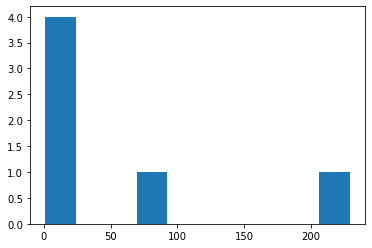

In [76]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

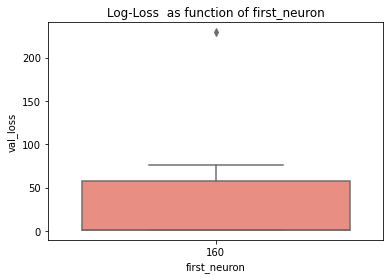

In [77]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

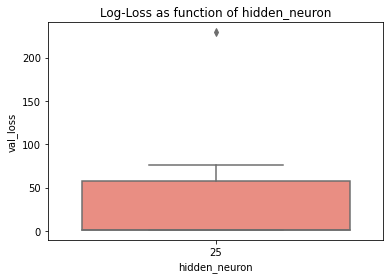

In [78]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

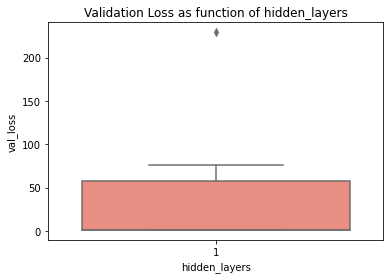

In [79]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

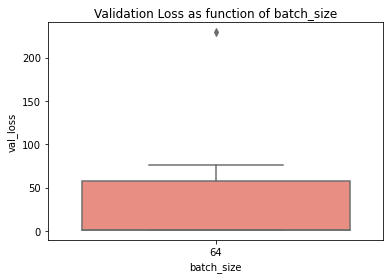

In [80]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.5 kernel_initializer

Text(0.5, 1.0, 'Validation Loss as function of kernel_initializer')

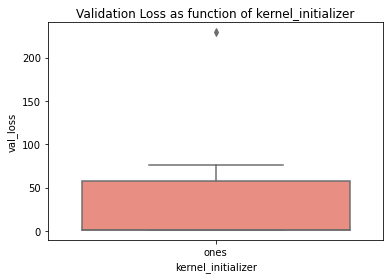

In [81]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 activation_layer

Text(0.5, 1.0, 'Validation Loss as function of activation_layer')

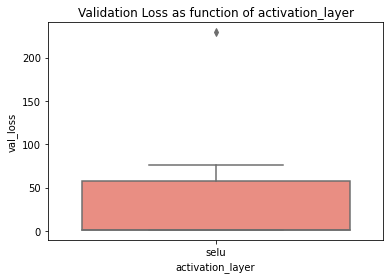

In [82]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 Optimizer

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

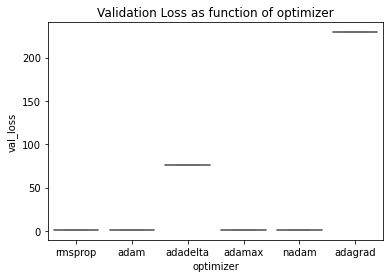

In [92]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

In [4]:
df2=df[df['optimizer']!='adagrad']
df2=df2[df2['optimizer']!='adadelta']

Text(0.5, 1.0, 'CI Validation Loss as function of optimizer')

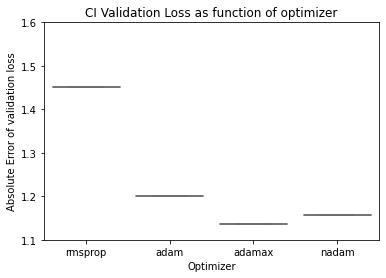

In [5]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df2.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('Optimizer')
ax.set_title('CI Validation Loss as function of optimizer') #ta


Text(0.5, 1.0, 'Validation Loss as function of optimizer')

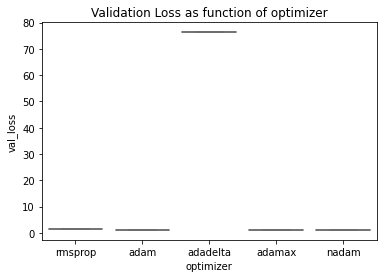

In [94]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df2.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

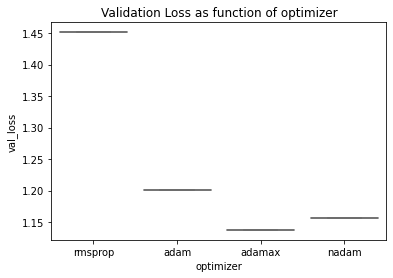

In [96]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df2.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

In [90]:
df2=df[df['optimizer']!='adagrad']

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

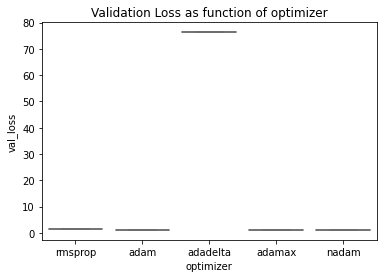

In [91]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df2.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')